# IMPORT LIBRARIES

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score, cohen_kappa_score

from sklearn.model_selection import GroupKFold
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, make_scorer

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from collections import defaultdict

# SET AND RESET ROWS AND COLS

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

# READ FILES

In [2]:
df_all = pd.read_csv("correctness_all_data.csv")
df_typical = pd.read_csv("correctness_neurotypical_data.csv")
df_divergent = pd.read_csv("correctness_neurodivergent_data.csv")
df_d1 = pd.read_csv("correctness_d1_data.csv")
df_d2 = pd.read_csv("correctness_d2_data.csv")
df_d3 = pd.read_csv("correctness_d3_data.csv")
df_d4 = pd.read_csv("correctness_d4_data.csv")
df_d5 = pd.read_csv("correctness_d5_data.csv")
df_d6 = pd.read_csv("correctness_d6_data.csv")
df_d7_d8 = pd.read_csv("correctness_d7_d8_data.csv")

In [3]:
num_instance = len(df_all)
num_instance

6746

In [4]:
num_participants = df_all['Participant'].nunique()
num_participants

338

In [5]:
df_all

Participant  Question  Correct  Paragraph  Question_RT  \
0     593890eac6aa16000101f037         1        1          1    -0.708886   
1     596e1af7a09655000197d4bb         1        1          1    -0.544851   
2     5af835d8e19f8c00019e6dc0         1        1          1     0.085448   
3     5b07b71c68eff50001d1c859         1        1          1    -0.855959   
4     5bd7971b0aac450001f951aa         1        1          1    -0.067665   
...                        ...       ...      ...        ...          ...   
6741  6295270587394aac7ce600db        10        1         30    -0.612038   
6742  63038702fea51556c37c36cf        10        0         30    -0.305793   
6743  63d17cf704d2d7053d56b962        10        1         30    -0.319792   
6744  63d3fa78d12b38b131ef6b76        10        1         30    -0.430556   
6745  63e53dc0bb780ac38cdcf77e        10        1         30    -0.663998   

         Gazes  AOIGazes  OffScreenGazesPix  OffScreenGazesProp  \
0    -0.119902 -0.504823           0.137953            0.404284   
1    -0.554031 -0.753242           0.037180            0.079620   
2     0.081056 -0.510166          -0.043439            0.229185   
3    -0.790271 -0.625026          -0.402191           -0.500398   
4    -0.239556 -0.373936          -0.462655           -0.423792   
...        ...       ...                ...                 ...   
6741 -0.736580 -0.809336          -0.079717           -0.183029   
6742 -0.560167 -0.873444           0.706314            0.531961   
6743 -0.007918  0.550288          -0.575521           -0.573356   
6744 -0.173593 -0.336540          -0.329634           -0.332594   
6745  2.397435  3.670210          -0.583583           -0.642666   

      cluster_num_clusters  ...        IN       JJS        MD        VB  \
0                -0.534860  ... -0.783168 -0.160128 -0.436436 -0.604858   
1                -0.181841  ... -0.783168 -0.160128 -0.436436 -0.604858   
2                 0.500662  ... -0.783168 -0.160128 -0.436436 -0.604858   
3                -0.472101  ... -0.783168 -0.160128 -0.436436 -0.604858   
4                -0.283825  ... -0.783168 -0.160128 -0.436436 -0.604858   
...                    ...  ...       ...       ...       ...       ...   
6741             -0.056323  ... -0.783168 -0.160128 -0.436436 -0.604858   
6742             -0.542705  ... -0.783168 -0.160128 -0.436436 -0.604858   
6743             -0.126927  ... -0.783168 -0.160128 -0.436436 -0.604858   
6744              0.806612  ... -0.783168 -0.160128 -0.436436 -0.604858   
6745              1.826444  ... -0.783168 -0.160128 -0.436436 -0.604858   

            RB       VBZ       RBS       JJR       WRB       RBR  
0    -1.020686 -0.527046 -0.160128 -0.229416 -0.333333 -0.160128  
1    -1.020686 -0.527046 -0.160128 -0.229416 -0.333333 -0.160128  
2    -1.020686 -0.527046 -0.160128 -0.229416 -0.333333 -0.160128  
3    -1.020686 -0.527046 -0.160128 -0.229416 -0.333333 -0.160128  
4    -1.020686 -0.527046 -0.160128 -0.229416 -0.333333 -0.160128  
...        ...       ...       ...       ...       ...       ...  
6741  0.680458 -0.527046 -0.160128 -0.229416  3.000000 -0.160128  
6742  0.680458 -0.527046 -0.160128 -0.229416  3.000000 -0.160128  
6743  0.680458 -0.527046 -0.160128 -0.229416  3.000000 -0.160128  
6744  0.680458 -0.527046 -0.160128 -0.229416  3.000000 -0.160128  
6745  0.680458 -0.527046 -0.160128 -0.229416  3.000000 -0.160128  

[6746 rows x 41 columns]

# ANALYSIS

## REMOVE NULL VALUES

In [24]:
# check for null values

def remove_null(df):
#     print(df.isnull().sum())
    
    # Drop rows with null values
    df_no_null = df.dropna()
    
#     print(df_no_null.isnull().sum())
    
    return df_no_null
    
df_all_clean = remove_null(df_all)
df_typical_clean = remove_null(df_typical)
df_divergent_clean = remove_null(df_divergent)
df_d1_clean = remove_null(df_d1)
df_d2_clean = remove_null(df_d2)
df_d3_clean = remove_null(df_d3)
df_d4_clean = remove_null(df_d4)
df_d5_clean = remove_null(df_d5)
df_d6_clean = remove_null(df_d6)
df_d7_d8_clean = remove_null(df_d7_d8)


In [25]:
# #save files after removing null values
# df_all_clean.to_csv("correctness_all_clean.csv", index=False)
# df_typical_clean.to_csv("correctness_typical_clean.csv", index=False)
# df_divergent_clean.to_csv("correctness_divergent_clean.csv", index=False)
# df_d1_clean.to_csv("correctness_d1_clean.csv", index=False)
# df_d2_clean.to_csv("correctness_d2_clean.csv", index=False)
# df_d3_clean.to_csv("correctness_d3_clean.csv", index=False)
# df_d4_clean.to_csv("correctness_d4_clean.csv", index=False)
# df_d5_clean.to_csv("correctness_d5_clean.csv", index=False)
# df_d6_clean.to_csv("correctness_d6_clean.csv", index=False)
# df_d7_d8_clean.to_csv("correctness_d7_d8_clean.csv", index=False)


## Read files and calculate number of participants, instances and base rate¶

In [4]:
df_all_clean = pd.read_csv("correctness_all_clean.csv")
df_typical_clean = pd.read_csv("correctness_typical_clean.csv")
df_divergent_clean = pd.read_csv("correctness_divergent_clean.csv")
df_d1_clean = pd.read_csv("correctness_d1_clean.csv")
df_d2_clean = pd.read_csv("correctness_d2_clean.csv")
df_d3_clean = pd.read_csv("correctness_d3_clean.csv")
df_d4_clean = pd.read_csv("correctness_d4_clean.csv")
df_d5_clean = pd.read_csv("correctness_d5_clean.csv")
df_d6_clean = pd.read_csv("correctness_d6_clean.csv")
df_d7_d8_clean = pd.read_csv("correctness_d7_d8_clean.csv")

In [3]:
# List of DataFrames
dataframes = [
    ('df_all_clean', df_all_clean),
    ('df_typical_clean', df_typical_clean),
    ('df_divergent_clean', df_divergent_clean),
    ('df_d1_clean', df_d1_clean),
    ('df_d2_clean', df_d2_clean),
    ('df_d3_clean', df_d3_clean),
    ('df_d4_clean', df_d4_clean),
    ('df_d5_clean', df_d5_clean),
    ('df_d6_clean', df_d6_clean),
    ('df_d7_d8_clean', df_d7_d8_clean)
]

def calculate_statistics(df):
    num_participants = df['Participant'].nunique()
    num_instances = len(df) 
    base_rate = df['Correct'].mean()
    return num_participants, num_instances, base_rate

for i, (name, df) in enumerate(dataframes, start=1):
    num_participants, num_instances, base_rate = calculate_statistics(df)
    print(f"{name}:")
    print(f"  Number of participants = {num_participants}")
    print(f"  Number of instances = {num_instances}")
    print(f"  Base Rate: {base_rate:.2f}")

df_all_clean:
  Number of participants = 338
  Number of instances = 6309
  Base Rate: 0.79
df_typical_clean:
  Number of participants = 171
  Number of instances = 3204
  Base Rate: 0.79
df_divergent_clean:
  Number of participants = 167
  Number of instances = 3105
  Base Rate: 0.79
df_d1_clean:
  Number of participants = 70
  Number of instances = 1327
  Base Rate: 0.79
df_d2_clean:
  Number of participants = 61
  Number of instances = 1169
  Base Rate: 0.80
df_d3_clean:
  Number of participants = 13
  Number of instances = 247
  Base Rate: 0.84
df_d4_clean:
  Number of participants = 13
  Number of instances = 241
  Base Rate: 0.73
df_d5_clean:
  Number of participants = 84
  Number of instances = 1574
  Base Rate: 0.81
df_d6_clean:
  Number of participants = 37
  Number of instances = 647
  Base Rate: 0.80
df_d7_d8_clean:
  Number of participants = 33
  Number of instances = 610
  Base Rate: 0.76


## LIST OF FEATURE COMBINATIONS

In [ ]:
#NLP
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR"
]

#Gaze + fixation
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]
#Gaze + fixation + NLP
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]
#Gaze + fixation + question response time
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]
#Gaze + fixation +question response time + NLP
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

## FUNCTION FOR MODELING

In [14]:

def train_and_evaluate(df, features):
    X = df[features]
    y = df['Correct']
    
    # Define classifiers and parameter grids
    classifiers = {
        'Chance': DummyClassifier(strategy="stratified"),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "SVM": SVC(random_state=42, probability=True), 
        "XGBoost": xgb.XGBClassifier(random_state=42)
    }

    param_grid_RF = {
        'criterion': ['entropy', 'gini'],
        'max_depth': [10, 20],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [50, 100, 200],
    }

    param_grid_SVM = {
        'C': [0.1, 1, 10],
        'kernel': ['linear']
    }

    param_grid_XGB = {
        'colsample_bytree': [0.8, 1.0],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [10, 20],
        'min_child_weight': [1, 3, 5],
        'n_estimators': [50, 100, 200],
        'subsample': [0.8, 1.0],
    }

    param_grids = {
        'Random Forest': param_grid_RF,
        'SVM': param_grid_SVM,
        'XGBoost': param_grid_XGB
    }

    precision_dict = {}
    recall_dict = {}
    auroc_score_barplot = {name: [] for name in classifiers}
    
    # Fit PCA to determine the number of components that explain 95% of the variance
    pca = PCA().fit(X)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumulative_variance >= 0.95) + 1

    # Define the number of folds for cross-validation
    n_splits = 5
    gkf = GroupKFold(n_splits=n_splits)

    # Loop through the classifiers
    for name, clf in classifiers.items():
        accuracy_scores = []
        weighted_f1_scores = []
        precision_scores = []
        recall_scores = []
        kappa_scores = []
        auroc_scores = []
        confusion_matrices = []
        prediction_rates = []

        # Perform cross-validation
        for train_index, test_index in gkf.split(X, y, groups=df['Participant']):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Apply PCA on the training data
            pca = PCA(n_components=n_components)
            X_train_pca = pca.fit_transform(X_train)
            X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

            # Perform oversampling on minority class
            smote = SMOTE()
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

            # Apply the transformation to the test data
            X_test_pca = pca.transform(X_test)
            X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

            if name != "Chance":
                grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring='roc_auc', n_jobs=-1)
                grid.fit(X_train_resampled, y_train_resampled)
                best_clf = grid.best_estimator_
                best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
                y_pred = best_clf.predict(X_test_pca_df)
                y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1]
            else:
                best_clf = clf.fit(X_train, y_train)
                y_pred = best_clf.predict(X_test)
                y_pred_proba = best_clf.predict_proba(X_test)[:, 1]

            accuracy = accuracy_score(y_test, y_pred)
            weighted_f1 = f1_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
            recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
            kappa = cohen_kappa_score(y_test, y_pred)
            auroc = roc_auc_score(y_test, y_pred_proba)
            confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
            prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

            accuracy_scores.append(accuracy)
            weighted_f1_scores.append(weighted_f1)
            precision_scores.append(precision)
            recall_scores.append(recall)
            kappa_scores.append(kappa)
            auroc_scores.append(auroc)
            confusion_matrices.append(confusion_matrix)
            prediction_rates.append(prediction_rate)

            auroc_score_barplot[name].append(auroc)

        avg_accuracy = np.mean(accuracy_scores)
        avg_weighted_f1 = np.mean(weighted_f1_scores)
        avg_precision = np.mean(precision_scores)
        avg_recall = np.mean(recall_scores)
        avg_kappa = np.mean(kappa_scores)
        avg_auroc = np.mean(auroc_scores)
        avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
        avg_prediction_rate = np.mean(prediction_rates)

        print(f"{name} Results:")
        print(f"Avg Accuracy: {avg_accuracy:.2f}")
        print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
        print(f"Avg Precision_1: {avg_precision:.2f}")
        print(f"Avg Recall_1: {avg_recall:.2f}")
        print(f"Avg Kappa: {avg_kappa:.2f}")
        print(f"Avg AUROC: {avg_auroc:.2f}")
        print("Avg Confusion Matrix:")
        print(avg_confusion_matrix)
        print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

        precision_dict[name] = avg_precision
        recall_dict[name] = avg_recall
        kappa_dict[name] = avg_kappa

    return precision_dict, recall_dict, auroc_score_barplot, classifiers

def plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers, n_splits=5):
    colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

    fig, ax = plt.subplots(2, 1, figsize=(10, 12))

    ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
    ax[0].set_title('Precision Scores by Classifier')
    ax[0].set_xlabel('Classifier')
    ax[0].set_ylabel('Precision Score')
    ax[0].set_ylim([0, 1])

    ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
    ax[1].set_title('Recall Scores by Classifier')
    ax[1].set_xlabel('Classifier')
    ax[1].set_ylabel('Recall Score')
    ax[1].set_ylim([0, 1])

    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(figsize=(11, 7))
    bar_width = 0.15  
    gap_width = 0.05 

    bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

    for idx, name in enumerate(classifiers):
        scores = auroc_score_barplot[name]
        avg_score = np.mean(scores)
        for fold_idx, score in enumerate(scores):
            bar_pos = bar_positions[idx] + (fold_idx * bar_width)
            ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
                   color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
        ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
    ax.set_xlabel('Classifiers', fontsize=15)
    ax.set_ylabel('AUROC Score', fontsize=15)
    ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers', fontsize=17)

    ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
    ax.set_xticklabels(classifiers.keys())

    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.legend(loc='lower right', fontsize=13)

    plt.tight_layout()
    plt.show()


## MODELING ALL PARTICIPANTS

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.76
Avg Weighted F1 Score: 0.75
Avg Precision_1: 0.85
Avg Recall_1: 0.87
Avg AUROC: 0.45
Avg Confusion Matrix:
[[ 1.4  6.6]
 [ 5.  36.4]]
Avg Prediction Rate: 0.86

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.77
Avg Weighted F1 Score: 0.79
Avg Precision_1: 0.91
Avg Recall_1: 0.81
Avg AUROC: 0.83
Avg Confusion Matrix:
[[ 4.6  3.4]
 [ 7.4 34. ]]
Avg Prediction Rate: 0.75

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

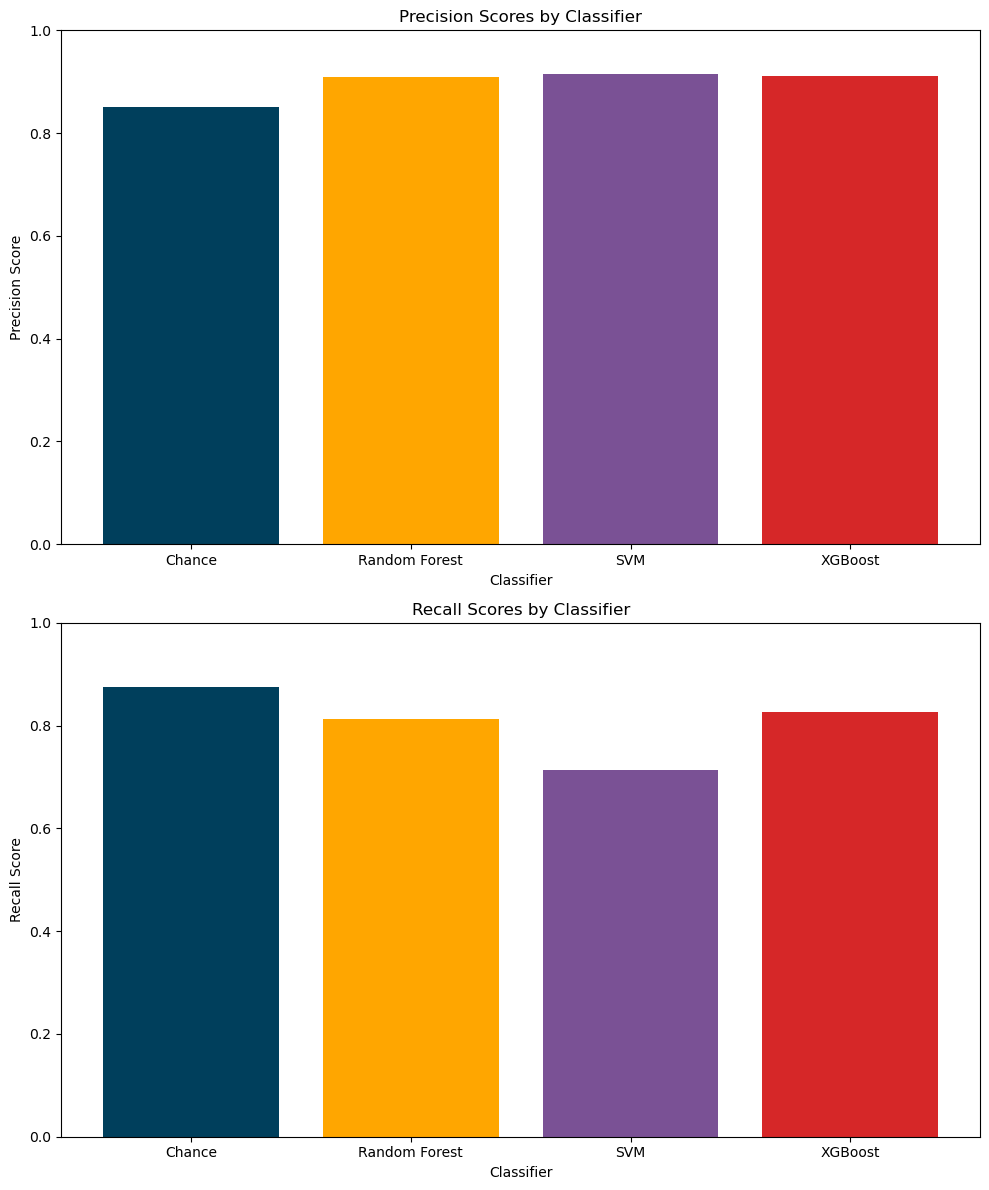

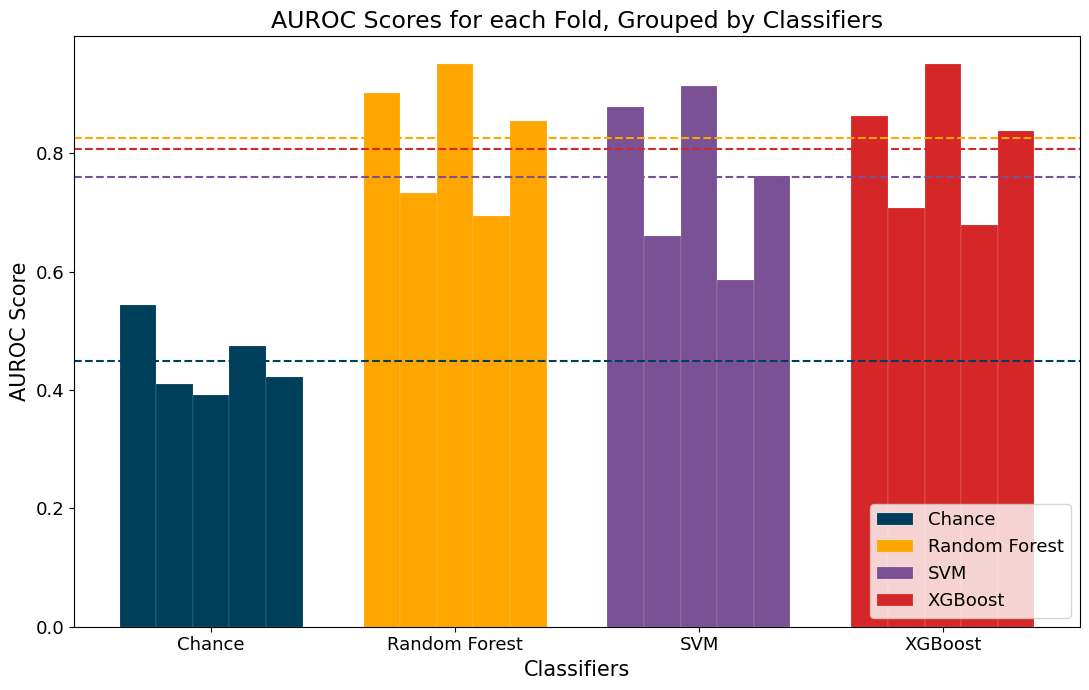

In [15]:
df = df_all_clean
features = ["sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
            "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
            "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
            "WRB", "RBR"]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

Chance Results:
Avg Accuracy: 0.75
Avg Weighted F1 Score: 0.75
Avg Precision_1: 0.85
Avg Recall_1: 0.85
Avg AUROC: 0.59
Avg Confusion Matrix:
[[ 1.6  6.4]
 [ 6.4 35. ]]
Avg Prediction Rate: 0.84

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.69
Avg Weighted F1 Score: 0.71
Avg Precision_1: 0.86
Avg Recall_1: 0.76
Avg AUROC: 0.59
Avg Confusion Matrix:
[[ 2.6  5.4]
 [ 9.8 31.6]]
Avg Prediction Rate: 0.74

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

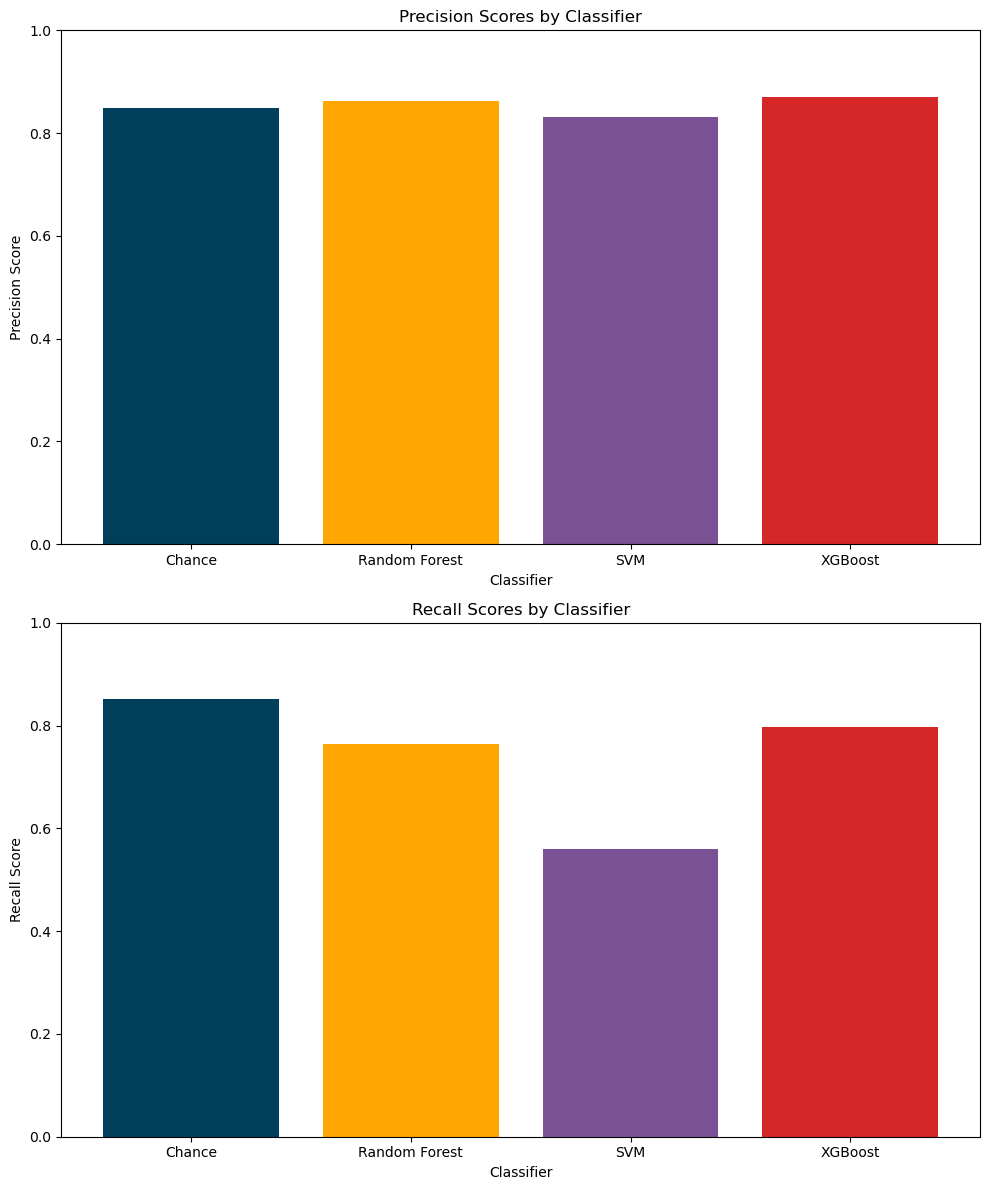

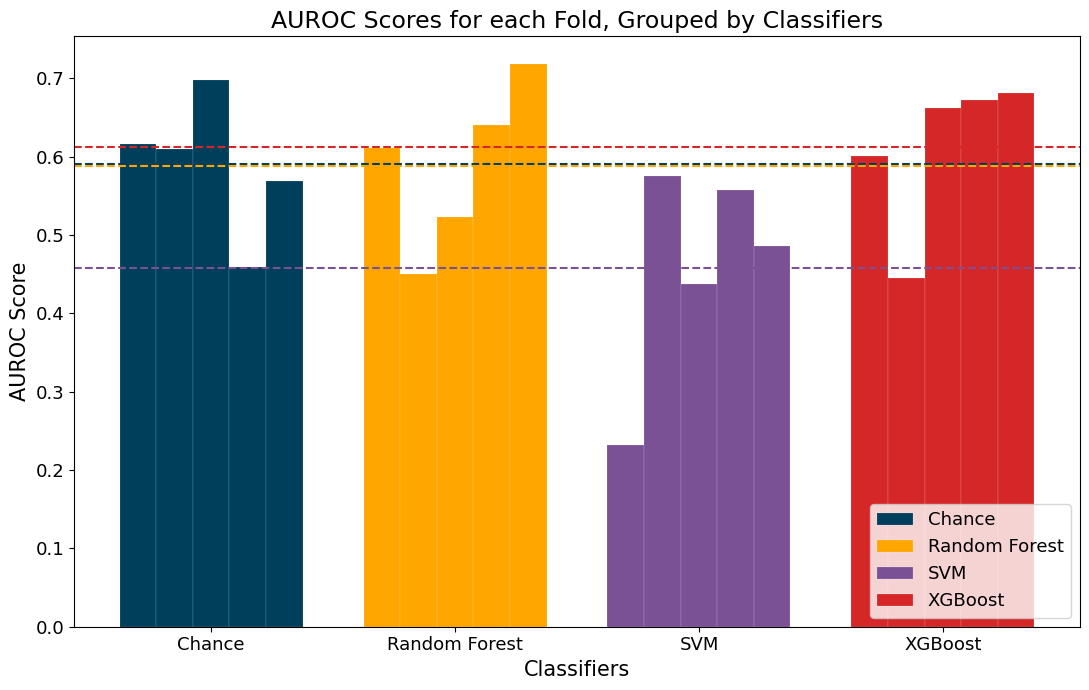

In [16]:
df = df_all_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

Chance Results:
Avg Accuracy: 0.71
Avg Weighted F1 Score: 0.71
Avg Precision_1: 0.83
Avg Recall_1: 0.81
Avg AUROC: 0.45
Avg Confusion Matrix:
[[ 1.2  6.8]
 [ 7.6 33.8]]
Avg Prediction Rate: 0.82

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.76
Avg Weighted F1 Score: 0.78
Avg Precision_1: 0.90
Avg Recall_1: 0.82
Avg AUROC: 0.82
Avg Confusion Matrix:
[[ 4.   4. ]
 [ 7.6 33.8]]
Avg Prediction Rate: 0.77

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

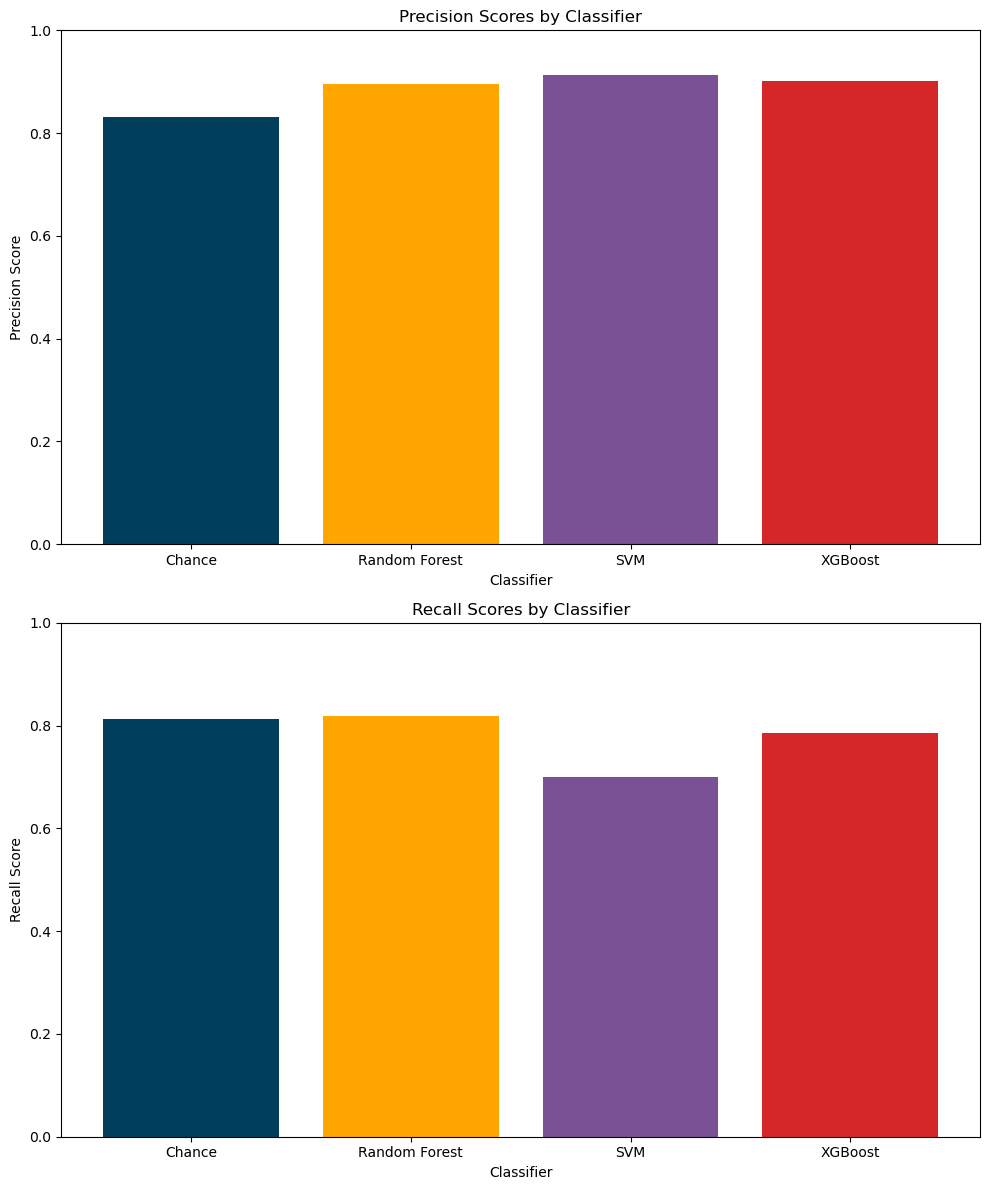

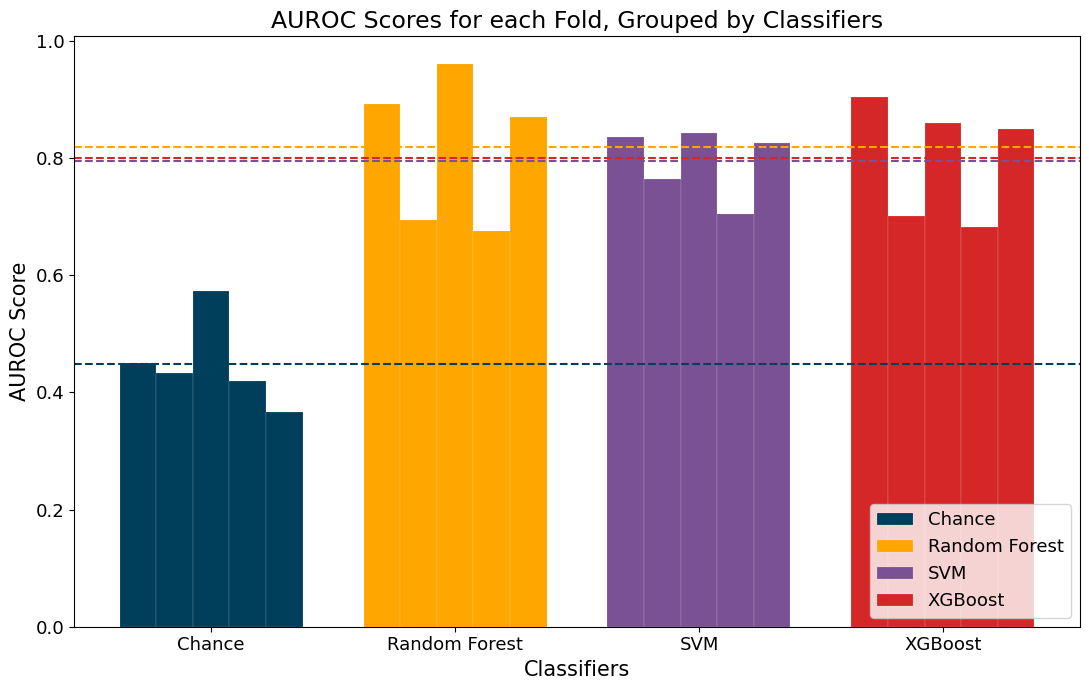

In [17]:
df = df_all_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME

Chance Results:
Avg Accuracy: 0.73
Avg Weighted F1 Score: 0.73
Avg Precision_1: 0.85
Avg Recall_1: 0.84
Avg AUROC: 0.49
Avg Confusion Matrix:
[[ 1.4  6.6]
 [ 6.4 35. ]]
Avg Prediction Rate: 0.84

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.74
Avg Weighted F1 Score: 0.74
Avg Precision_1: 0.86
Avg Recall_1: 0.84
Avg AUROC: 0.65
Avg Confusion Matrix:
[[ 2.   6. ]
 [ 6.2 35.2]]
Avg Prediction Rate: 0.82

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

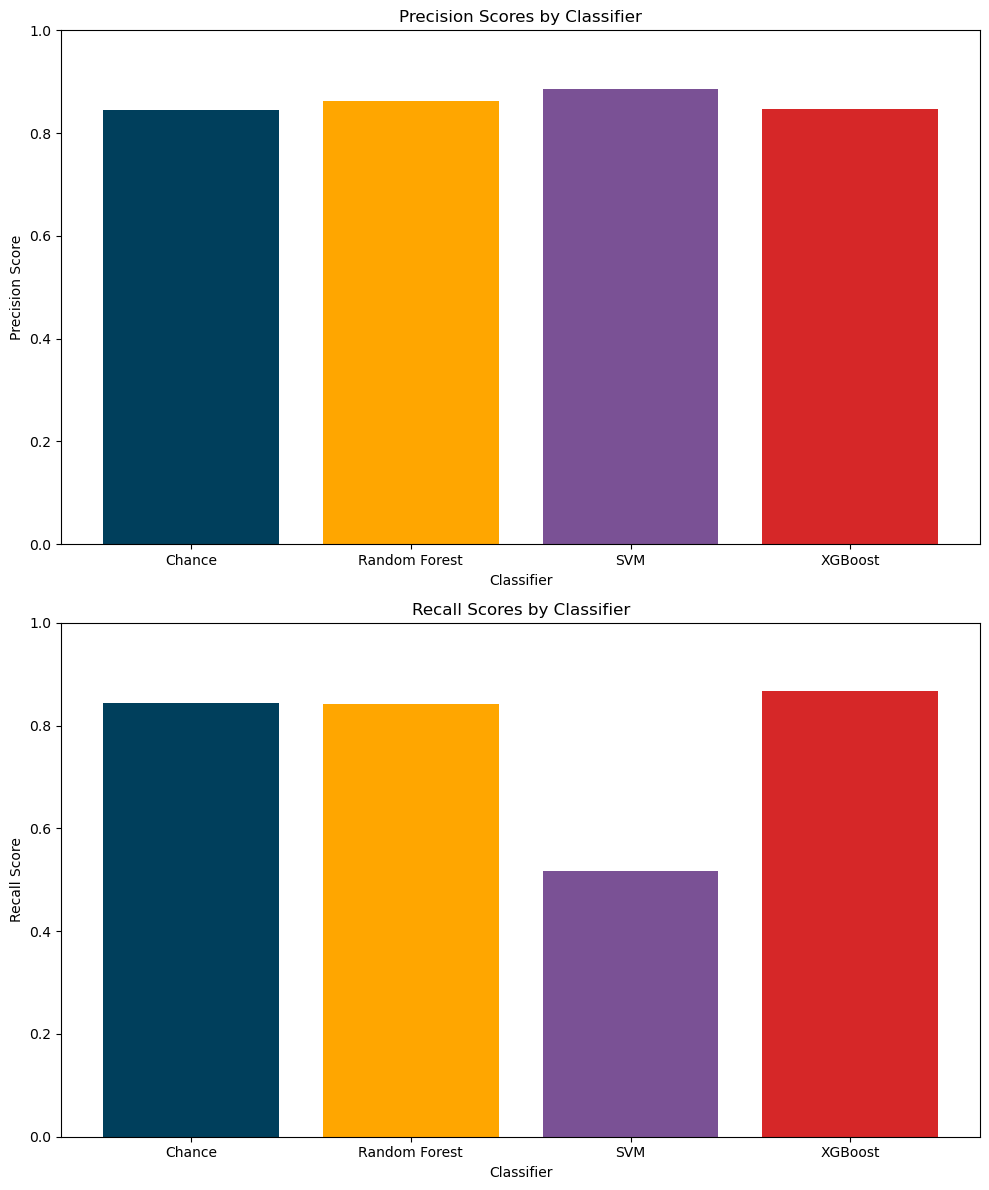

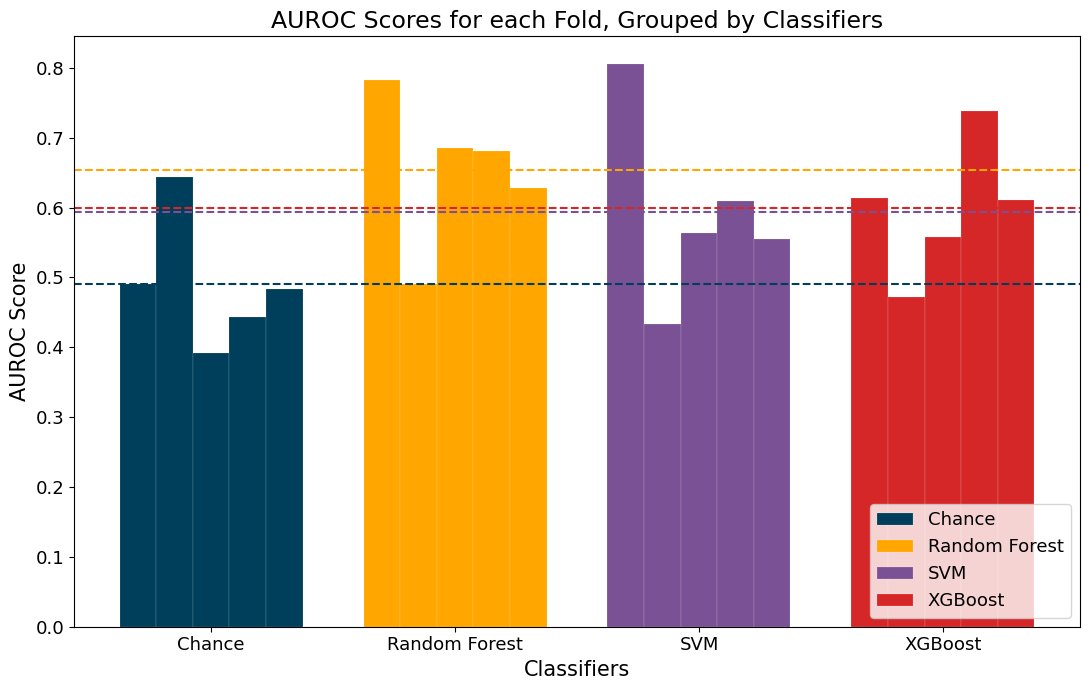

In [18]:
df = df_all_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME + NLP

Chance Results:
Avg Accuracy: 0.72
Avg Weighted F1 Score: 0.73
Avg Precision_1: 0.85
Avg Recall_1: 0.81
Avg AUROC: 0.56
Avg Confusion Matrix:
[[ 2.   6. ]
 [ 8.  33.4]]
Avg Prediction Rate: 0.79

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.76
Avg Weighted F1 Score: 0.76
Avg Precision_1: 0.88
Avg Recall_1: 0.85
Avg AUROC: 0.79
Avg Confusion Matrix:
[[ 2.8  5.2]
 [ 6.4 35. ]]
Avg Prediction Rate: 0.81

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

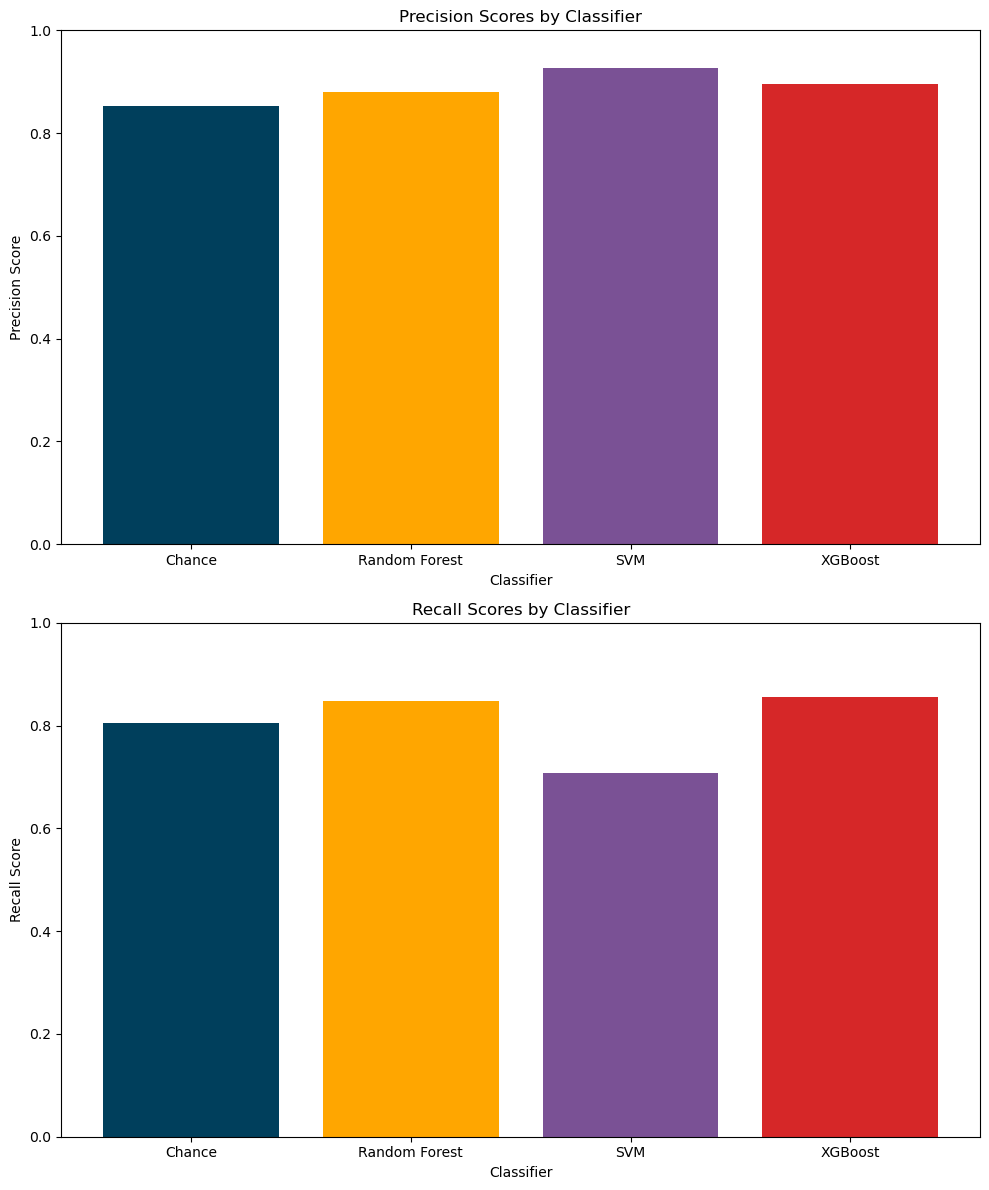

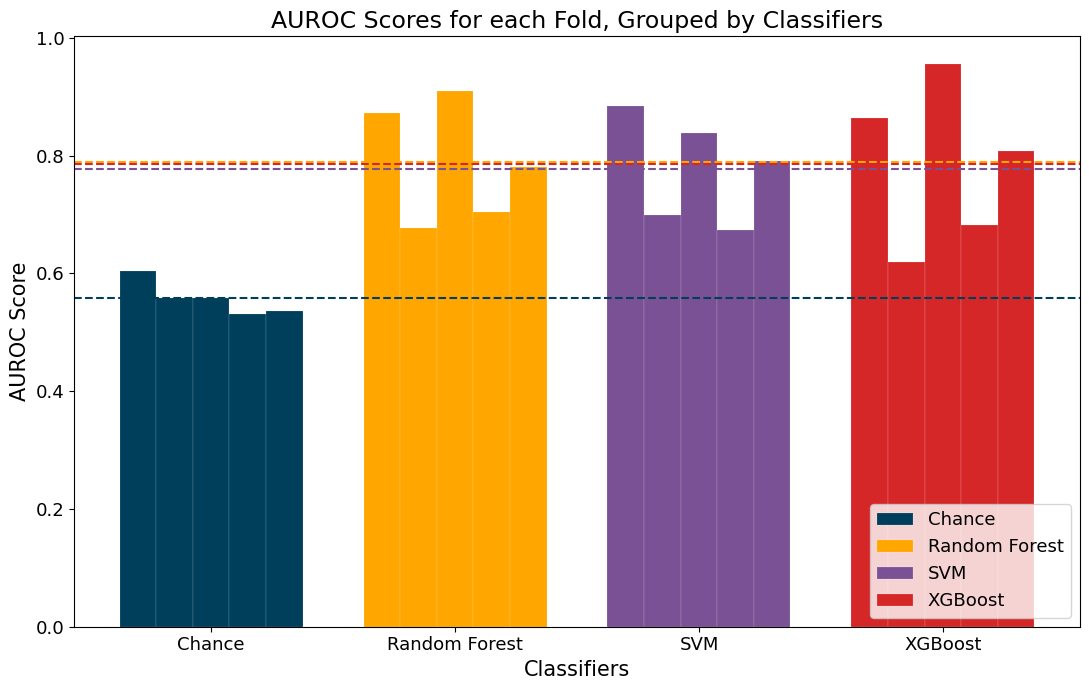

In [19]:
df = df_all_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_all_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

## MODELING NEUROTYPICAL PARTICIPANTS

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.72
Avg Weighted F1 Score: 0.71
Avg Precision_1: 0.83
Avg Recall_1: 0.83
Avg AUROC: 0.44
Avg Confusion Matrix:
[[ 0.8  7.2]
 [ 6.6 34.8]]
Avg Prediction Rate: 0.85

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.79
Avg Weighted F1 Score: 0.81
Avg Precision_1: 0.91
Avg Recall_1: 0.84
Avg AUROC: 0.82
Avg Confusion Matrix:
[[ 4.6  3.4]
 [ 6.6 34.8]]
Avg Prediction Rate: 0.77

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

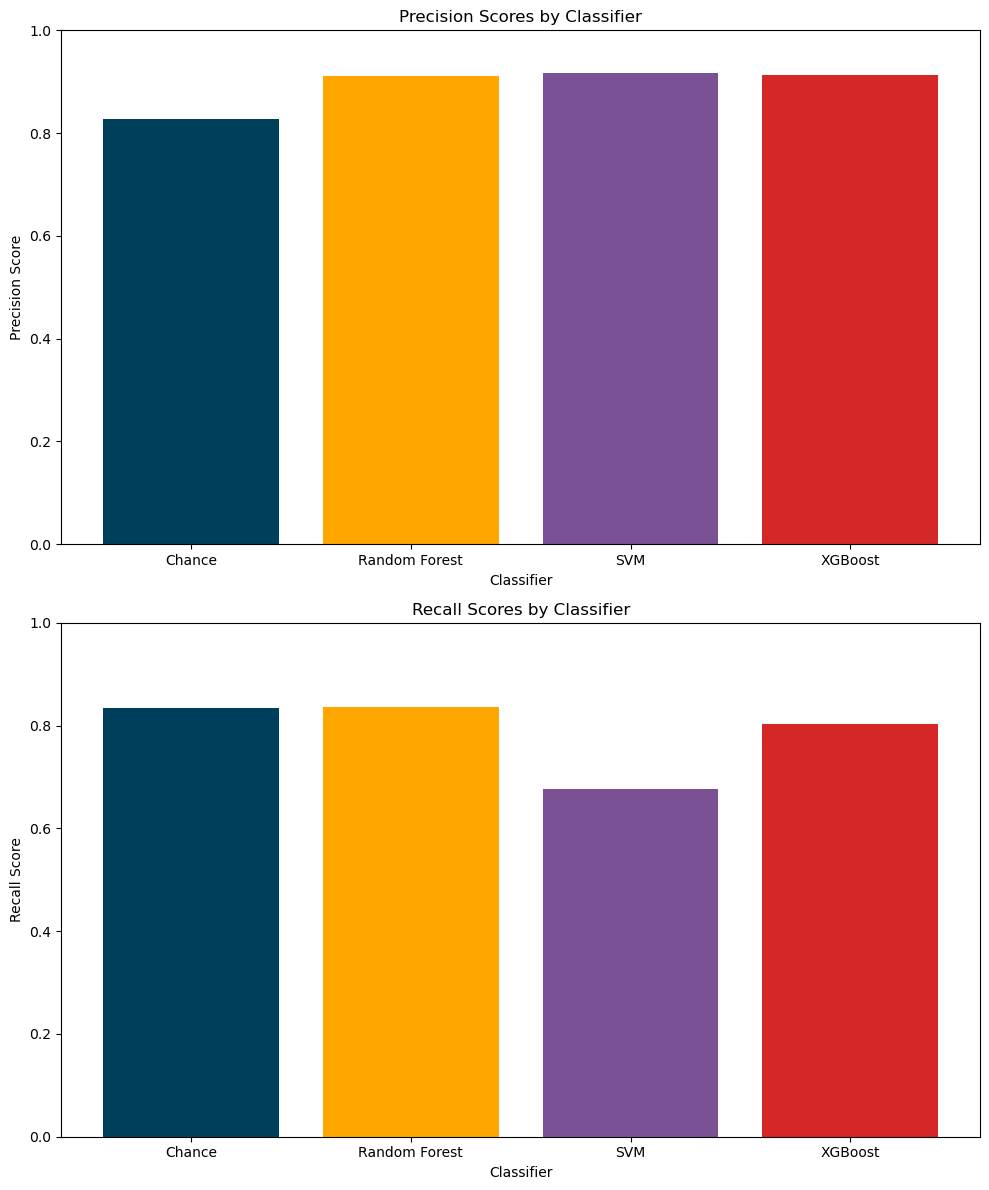

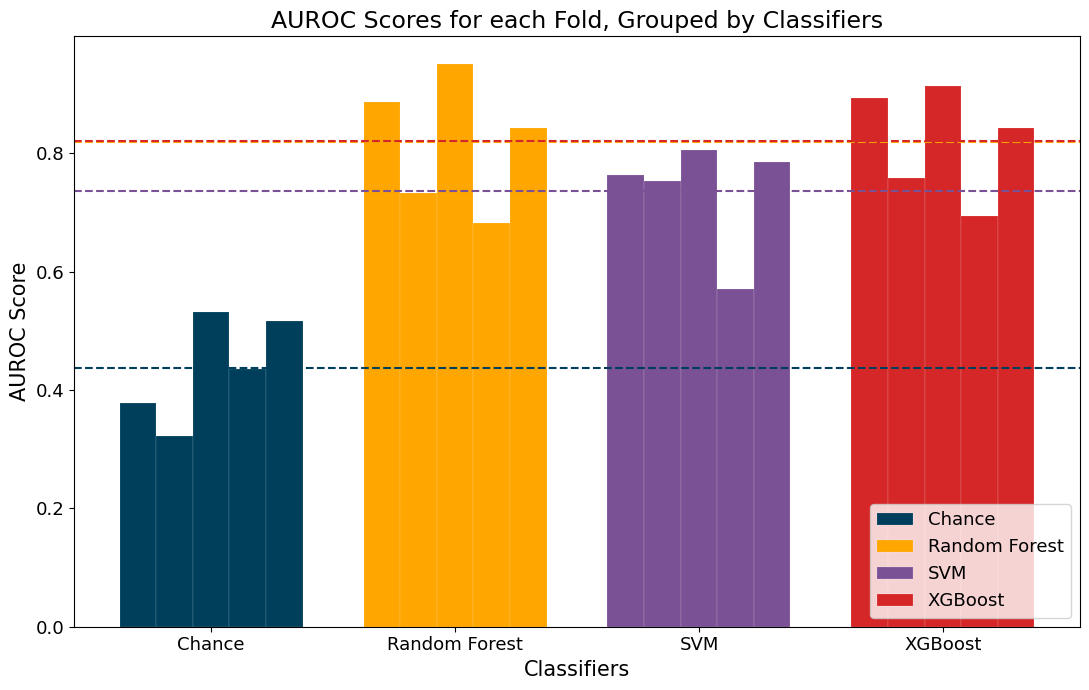

In [20]:
df = df_typical_clean
features = ["sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
            "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
            "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
            "WRB", "RBR"]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_typical_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

Chance Results:
Avg Accuracy: 0.72
Avg Weighted F1 Score: 0.73
Avg Precision_1: 0.85
Avg Recall_1: 0.81
Avg AUROC: 0.49
Avg Confusion Matrix:
[[ 2.   6. ]
 [ 7.8 33.6]]
Avg Prediction Rate: 0.80

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.71
Avg Weighted F1 Score: 0.73
Avg Precision_1: 0.85
Avg Recall_1: 0.81
Avg AUROC: 0.63
Avg Confusion Matrix:
[[ 2.   6. ]
 [ 8.  33.4]]
Avg Prediction Rate: 0.79

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

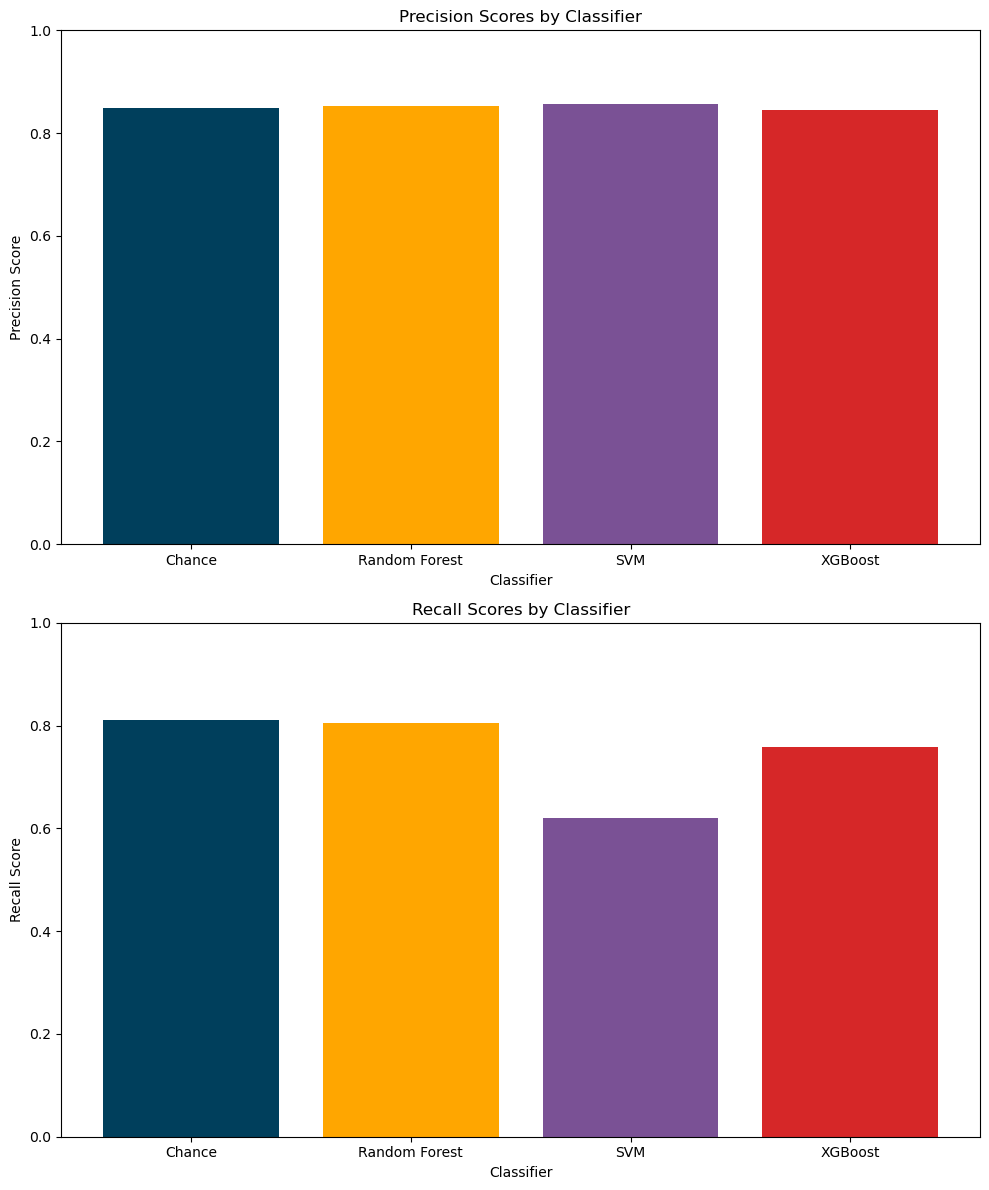

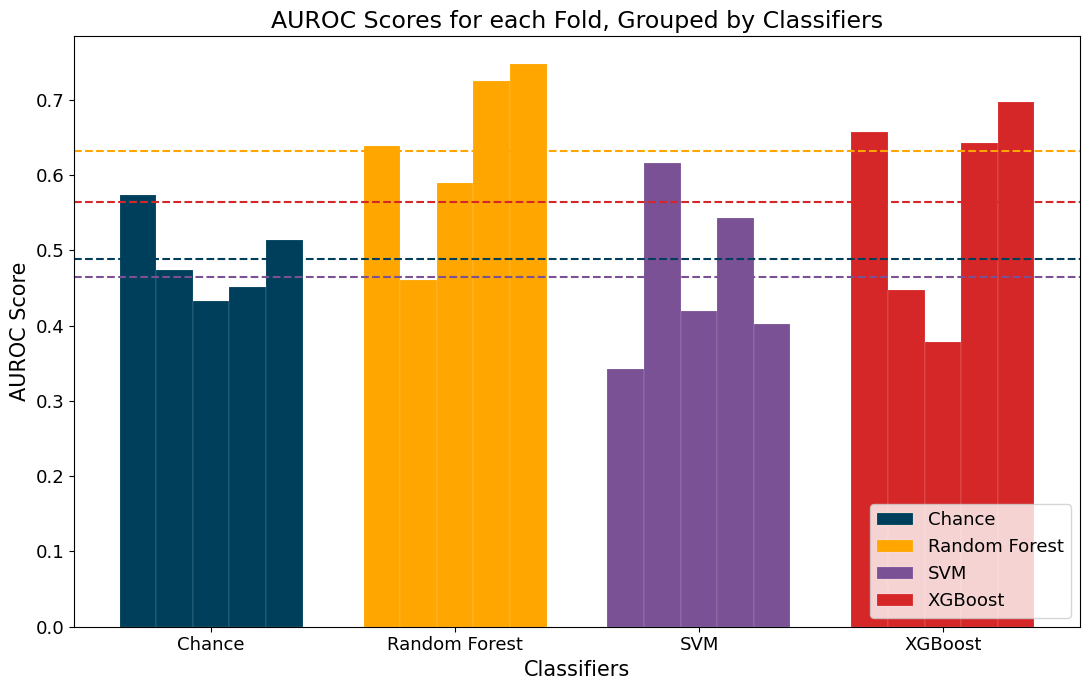

In [21]:
df = df_typical_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_typical_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

Chance Results:
Avg Accuracy: 0.73
Avg Weighted F1 Score: 0.72
Avg Precision_1: 0.83
Avg Recall_1: 0.84
Avg AUROC: 0.52
Avg Confusion Matrix:
[[ 1.   7. ]
 [ 6.6 34.8]]
Avg Prediction Rate: 0.85

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.76
Avg Weighted F1 Score: 0.77
Avg Precision_1: 0.90
Avg Recall_1: 0.81
Avg AUROC: 0.82
Avg Confusion Matrix:
[[ 4.2  3.8]
 [ 8.  33.4]]
Avg Prediction Rate: 0.76

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

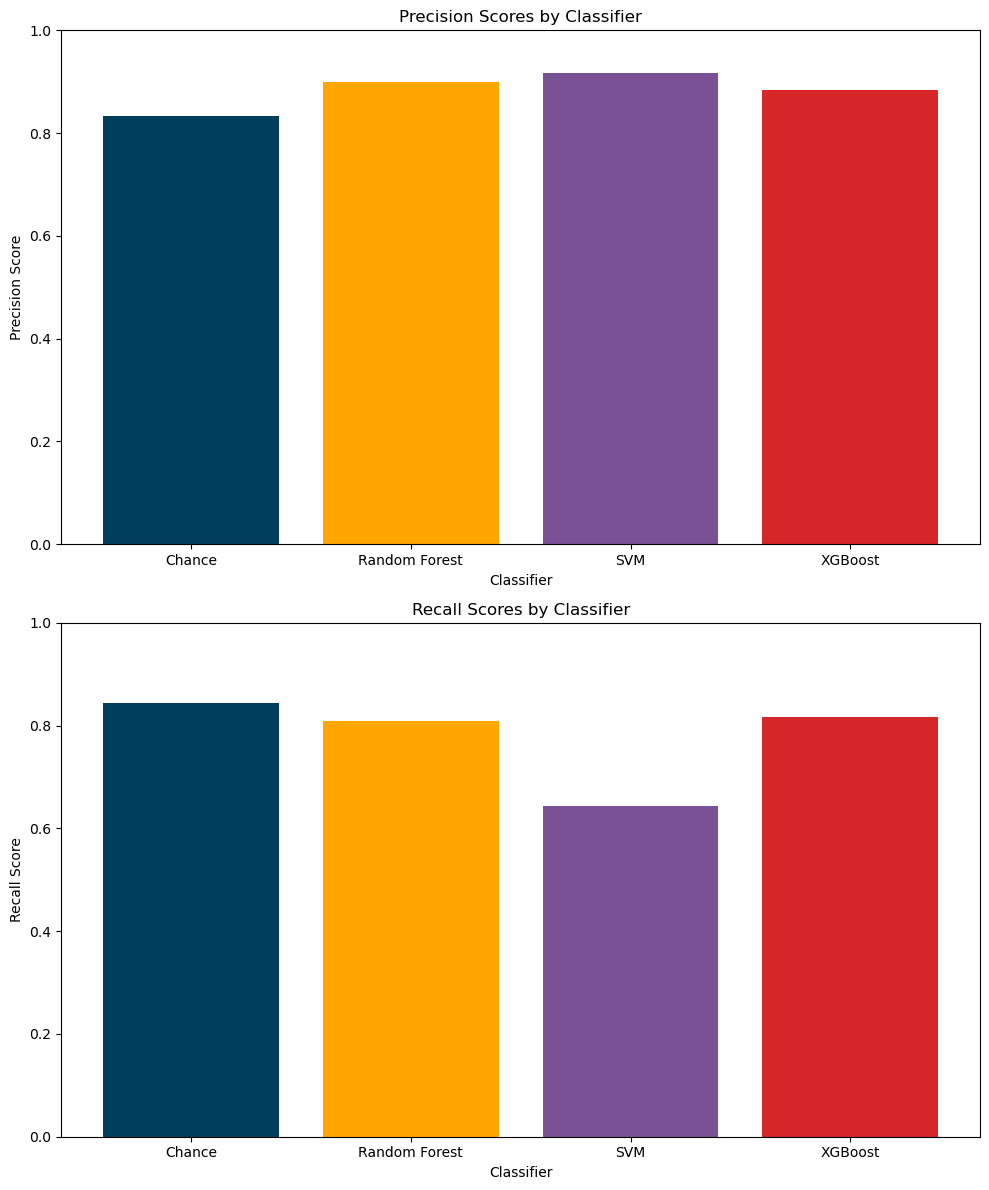

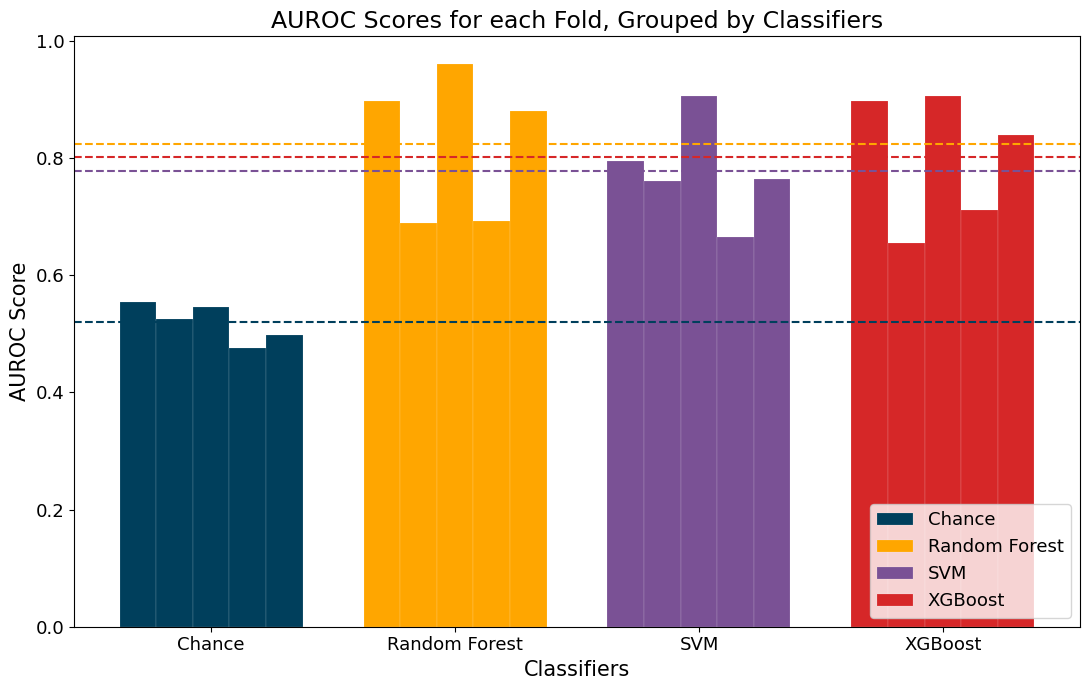

In [22]:
df = df_typical_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_typical_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME

Chance Results:
Avg Accuracy: 0.71
Avg Weighted F1 Score: 0.73
Avg Precision_1: 0.85
Avg Recall_1: 0.80
Avg AUROC: 0.50
Avg Confusion Matrix:
[[ 2.2  5.8]
 [ 8.4 33. ]]
Avg Prediction Rate: 0.79

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.74
Avg Weighted F1 Score: 0.73
Avg Precision_1: 0.85
Avg Recall_1: 0.85
Avg AUROC: 0.62
Avg Confusion Matrix:
[[ 1.4  6.6]
 [ 5.6 35.8]]
Avg Prediction Rate: 0.84

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

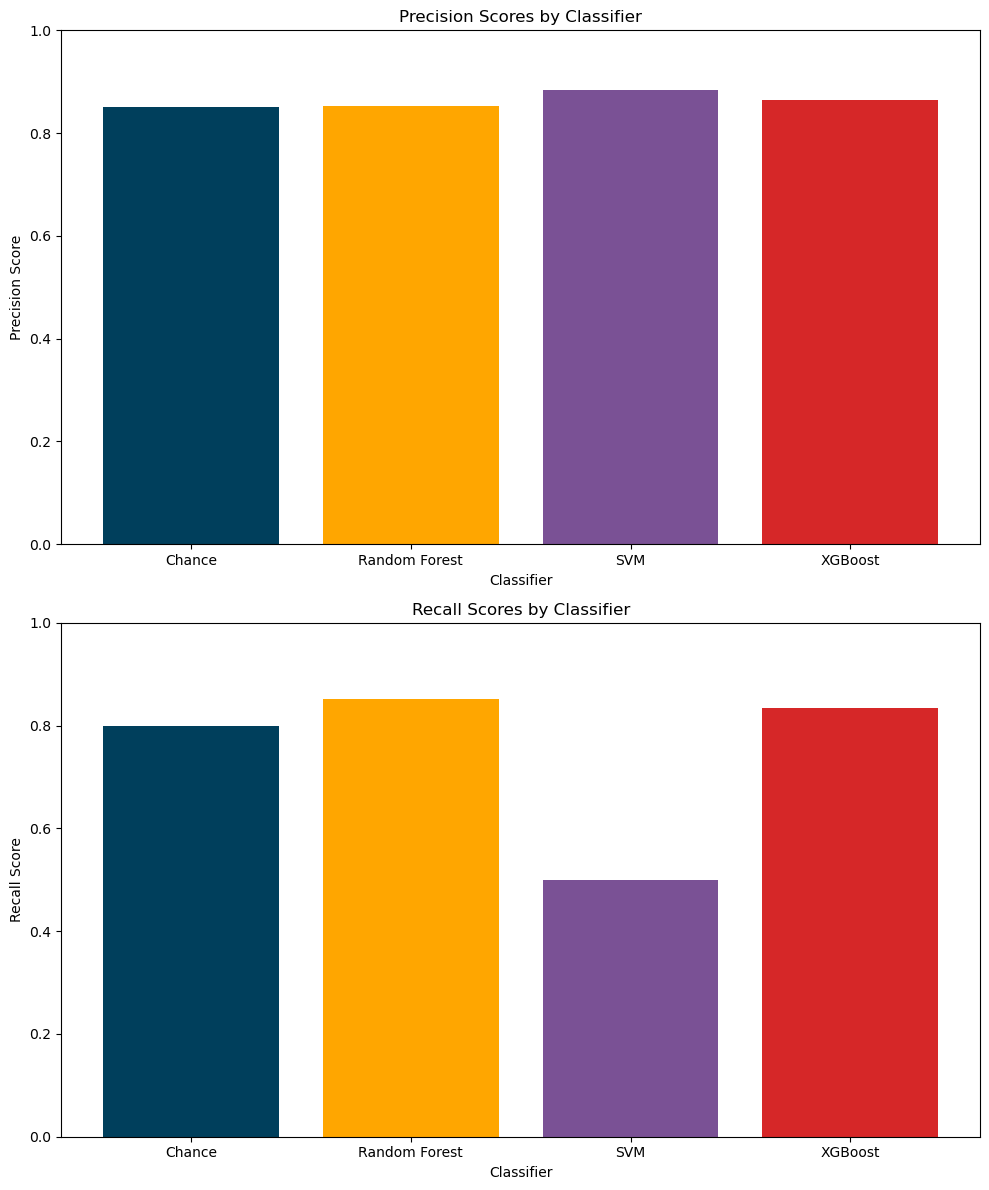

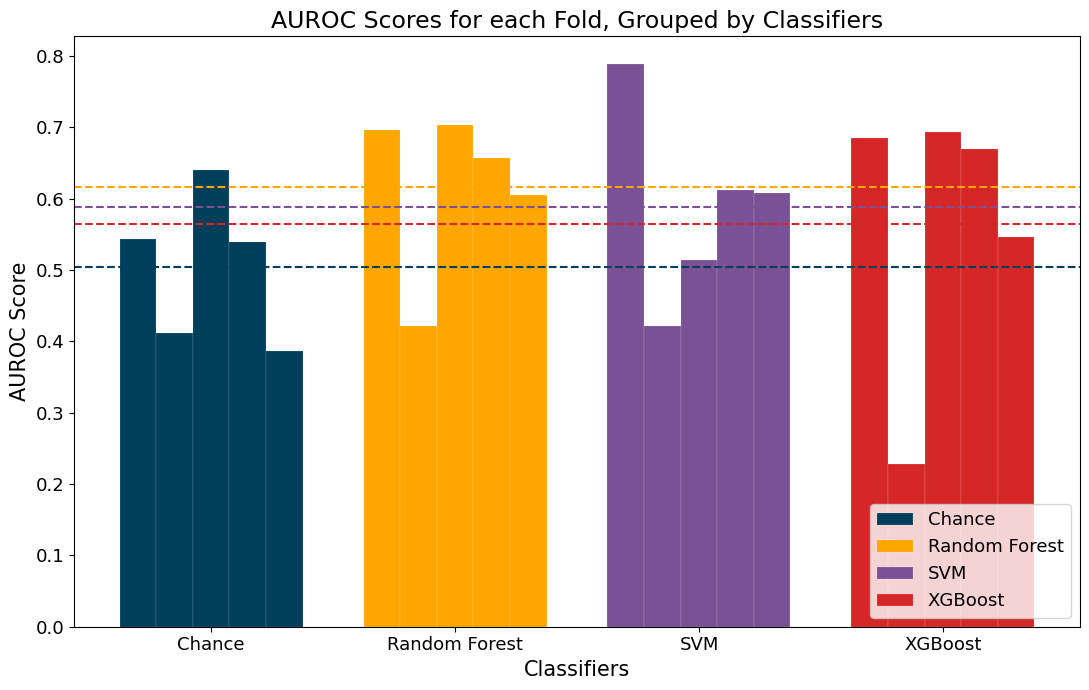

In [23]:
df = df_typical_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_typical_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME + NLP

Chance Results:
Avg Accuracy: 0.72
Avg Weighted F1 Score: 0.72
Avg Precision_1: 0.84
Avg Recall_1: 0.81
Avg AUROC: 0.45
Avg Confusion Matrix:
[[ 1.4  6.6]
 [ 7.6 33.8]]
Avg Prediction Rate: 0.82

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.77
Avg Weighted F1 Score: 0.78
Avg Precision_1: 0.89
Avg Recall_1: 0.85
Avg AUROC: 0.79
Avg Confusion Matrix:
[[ 3.2  4.8]
 [ 6.6 34.8]]
Avg Prediction Rate: 0.81

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

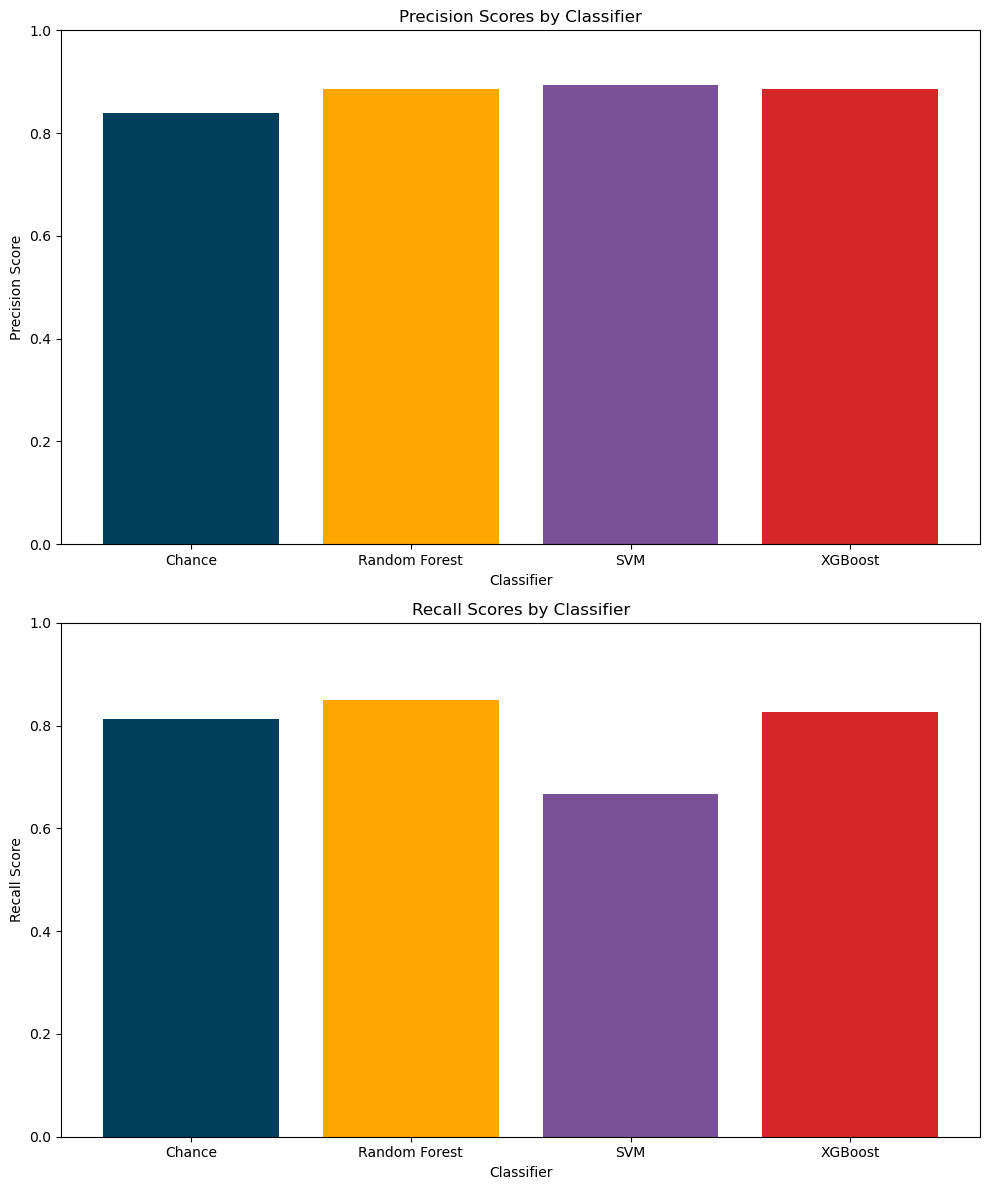

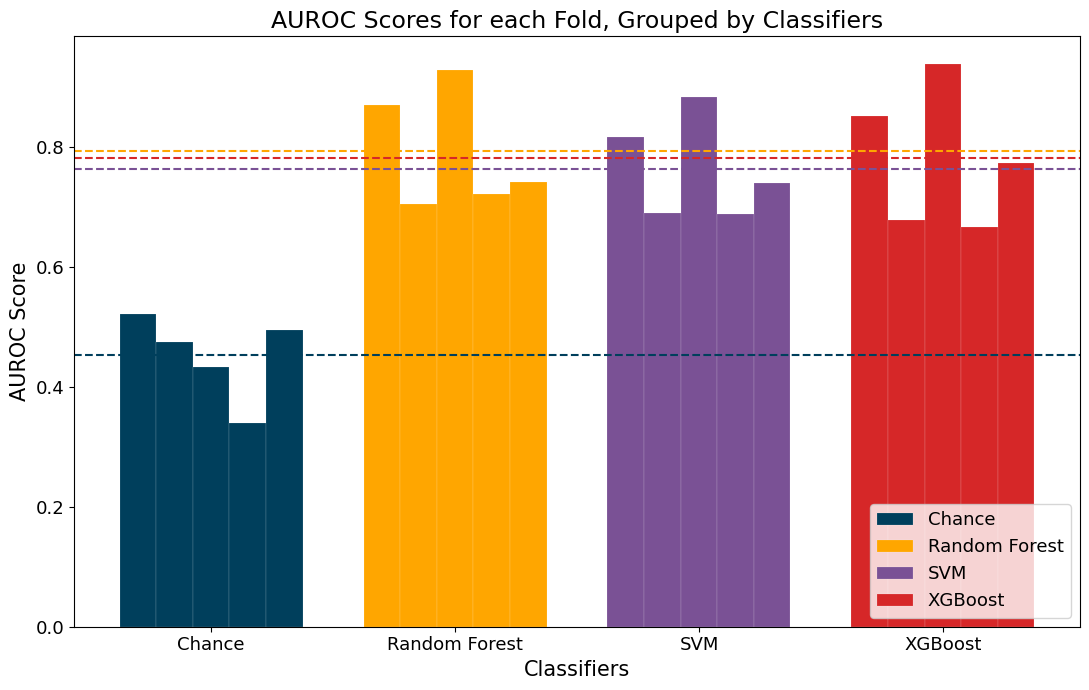

In [24]:
df = df_typical_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_typical_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

## MODELING NEURODIVERGENT PARTICIPANTS

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.74
Avg Weighted F1 Score: 0.75
Avg Precision_1: 0.86
Avg Recall_1: 0.82
Avg AUROC: 0.52
Avg Confusion Matrix:
[[ 2.4  5.6]
 [ 7.4 34. ]]
Avg Prediction Rate: 0.80

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.77
Avg Weighted F1 Score: 0.79
Avg Precision_1: 0.91
Avg Recall_1: 0.81
Avg AUROC: 0.82
Avg Confusion Matrix:
[[ 4.6  3.4]
 [ 7.4 34. ]]
Avg Prediction Rate: 0.75

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

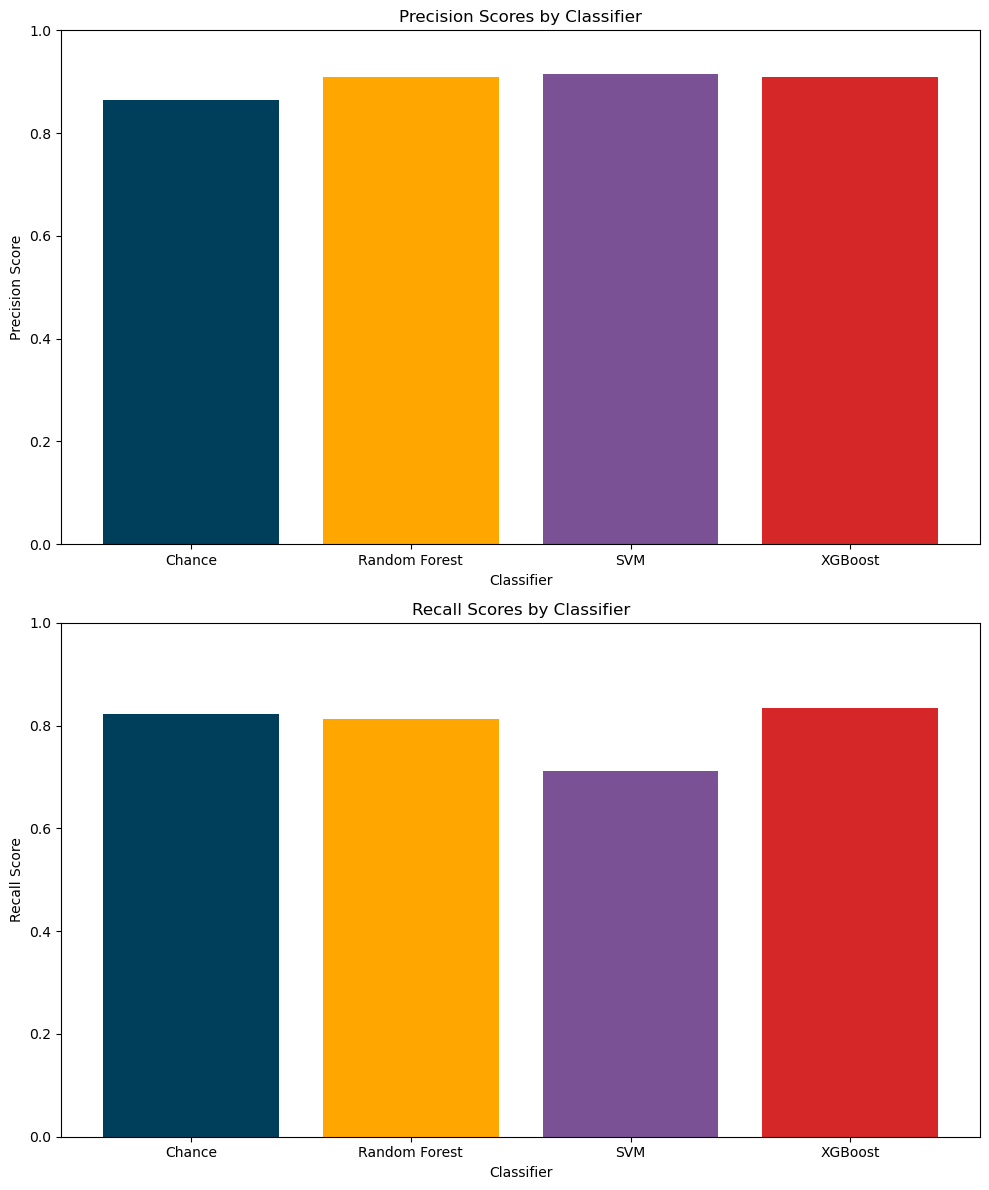

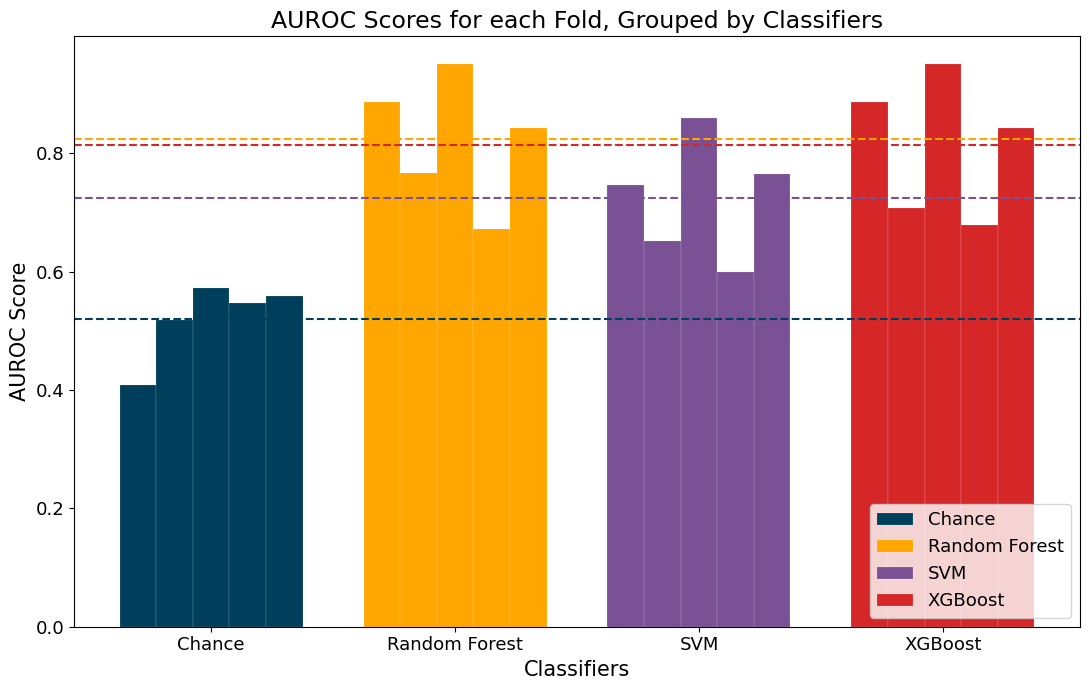

In [25]:
df = df_divergent_clean
features = ["sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
            "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
            "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
            "WRB", "RBR"]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d3_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

Chance Results:
Avg Accuracy: 0.75
Avg Weighted F1 Score: 0.75
Avg Precision_1: 0.84
Avg Recall_1: 0.86
Avg AUROC: 0.45
Avg Confusion Matrix:
[[ 1.4  6.6]
 [ 5.8 35.6]]
Avg Prediction Rate: 0.85

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.70
Avg Weighted F1 Score: 0.72
Avg Precision_1: 0.87
Avg Recall_1: 0.78
Avg AUROC: 0.62
Avg Confusion Matrix:
[[ 2.6  5.4]
 [ 8.8 32.6]]
Avg Prediction Rate: 0.76

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

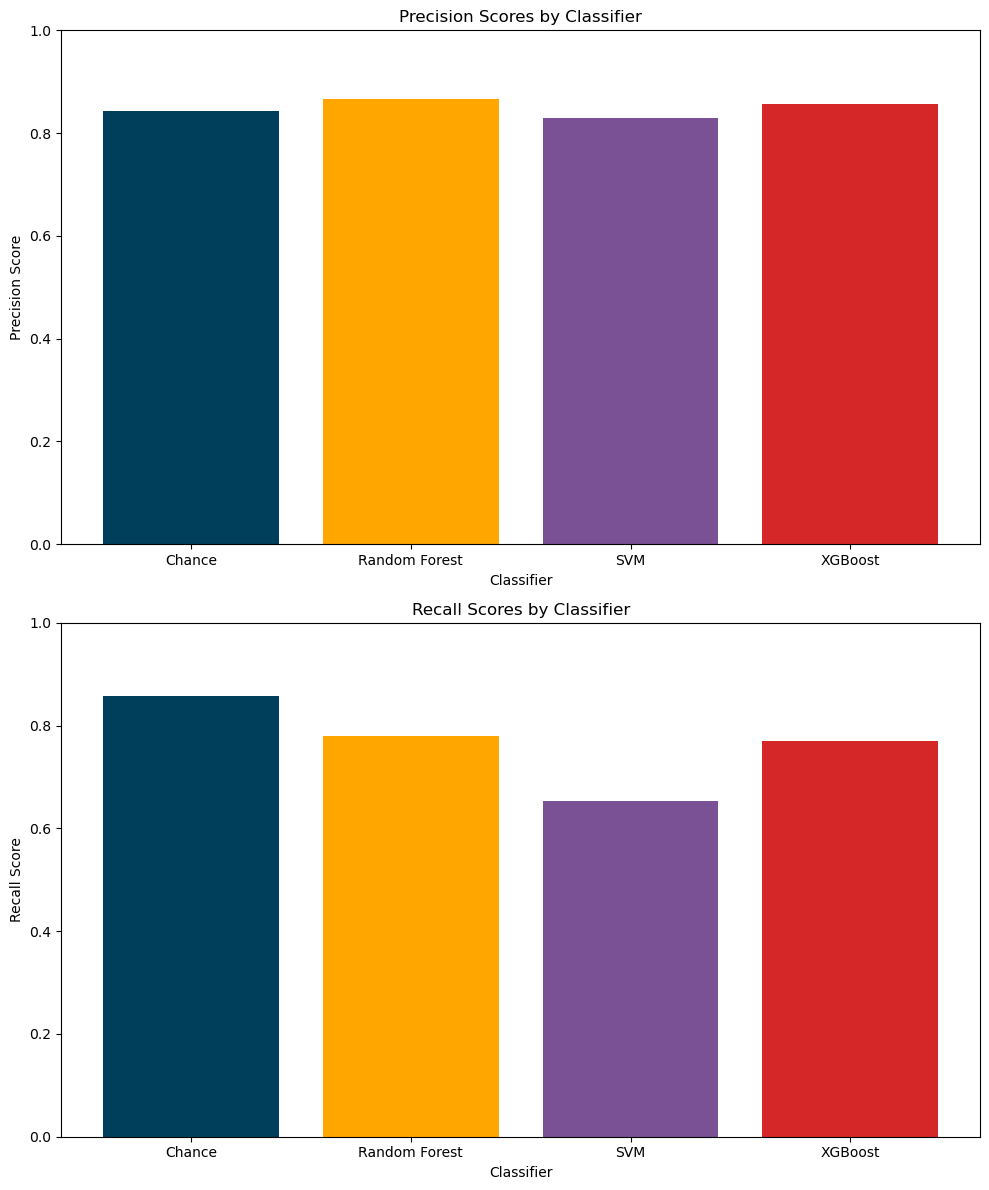

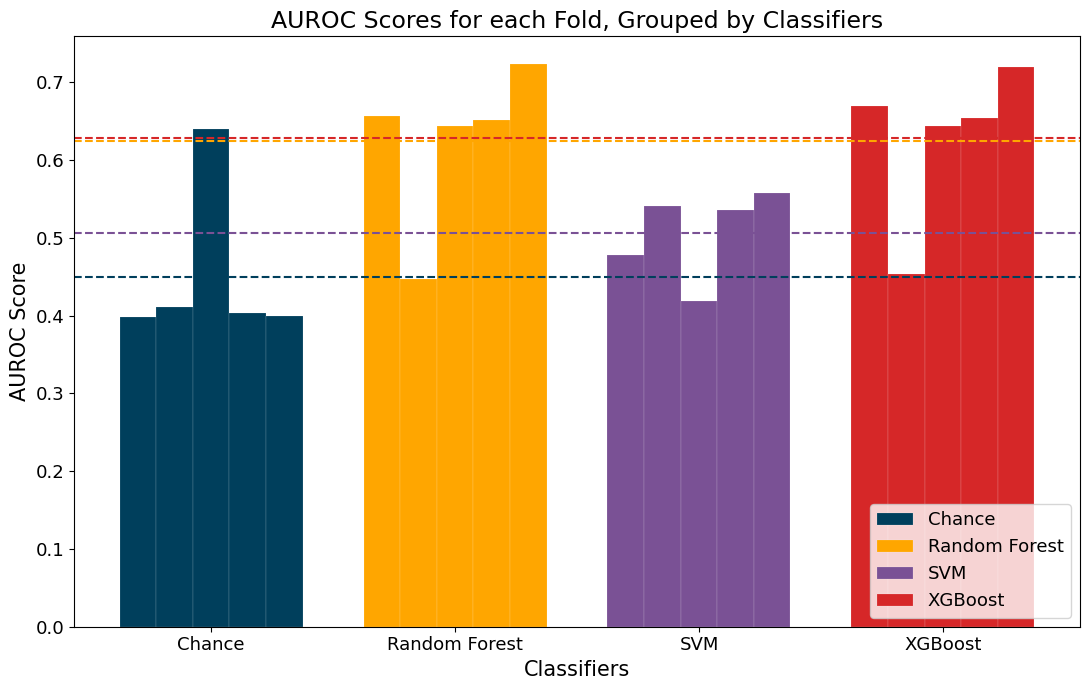

In [26]:
df = df_divergent_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_divergent_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

Chance Results:
Avg Accuracy: 0.71
Avg Weighted F1 Score: 0.70
Avg Precision_1: 0.82
Avg Recall_1: 0.83
Avg AUROC: 0.57
Avg Confusion Matrix:
[[ 0.6  7.4]
 [ 7.2 34.2]]
Avg Prediction Rate: 0.84

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.75
Avg Weighted F1 Score: 0.77
Avg Precision_1: 0.90
Avg Recall_1: 0.81
Avg AUROC: 0.81
Avg Confusion Matrix:
[[ 4.   4. ]
 [ 7.8 33.6]]
Avg Prediction Rate: 0.76

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

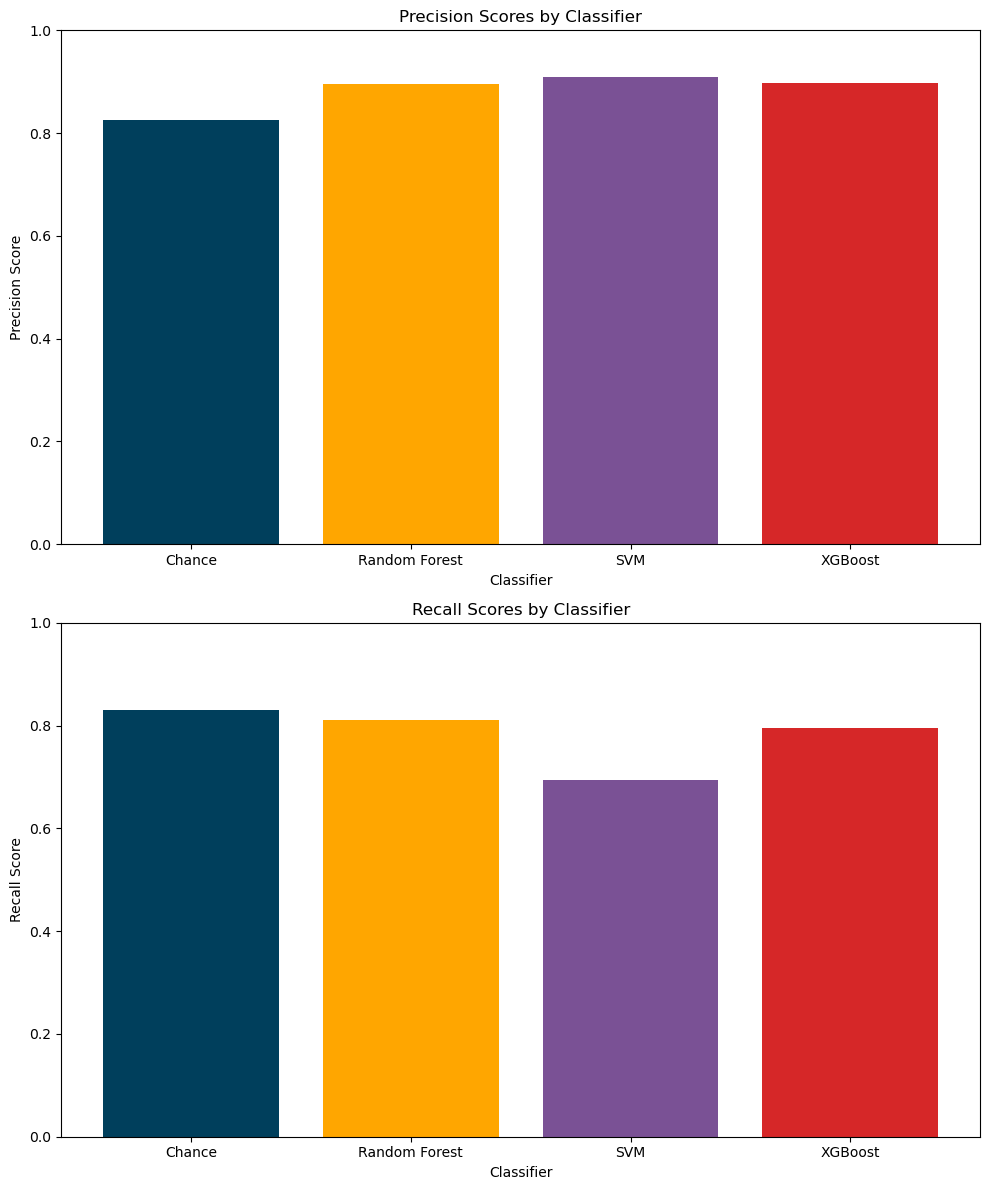

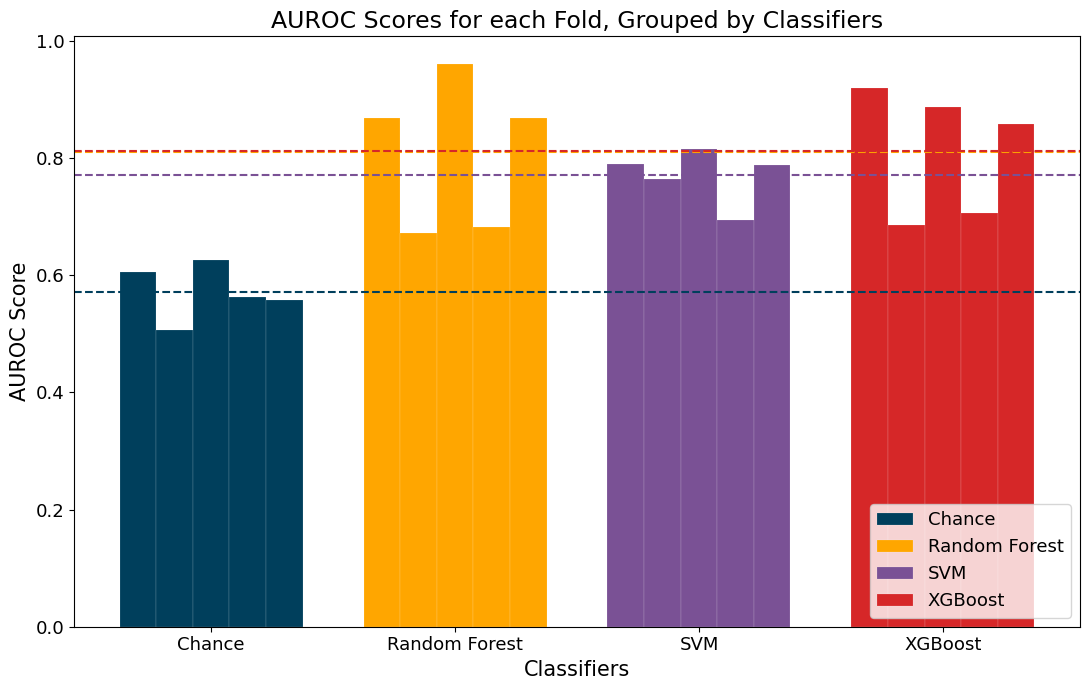

In [27]:
df = df_divergent_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_divergent_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME

Chance Results:
Avg Accuracy: 0.75
Avg Weighted F1 Score: 0.74
Avg Precision_1: 0.84
Avg Recall_1: 0.86
Avg AUROC: 0.51
Avg Confusion Matrix:
[[ 1.2  6.8]
 [ 5.6 35.8]]
Avg Prediction Rate: 0.86

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.75
Avg Weighted F1 Score: 0.74
Avg Precision_1: 0.86
Avg Recall_1: 0.86
Avg AUROC: 0.64
Avg Confusion Matrix:
[[ 1.6  6.4]
 [ 5.4 36. ]]
Avg Prediction Rate: 0.84

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

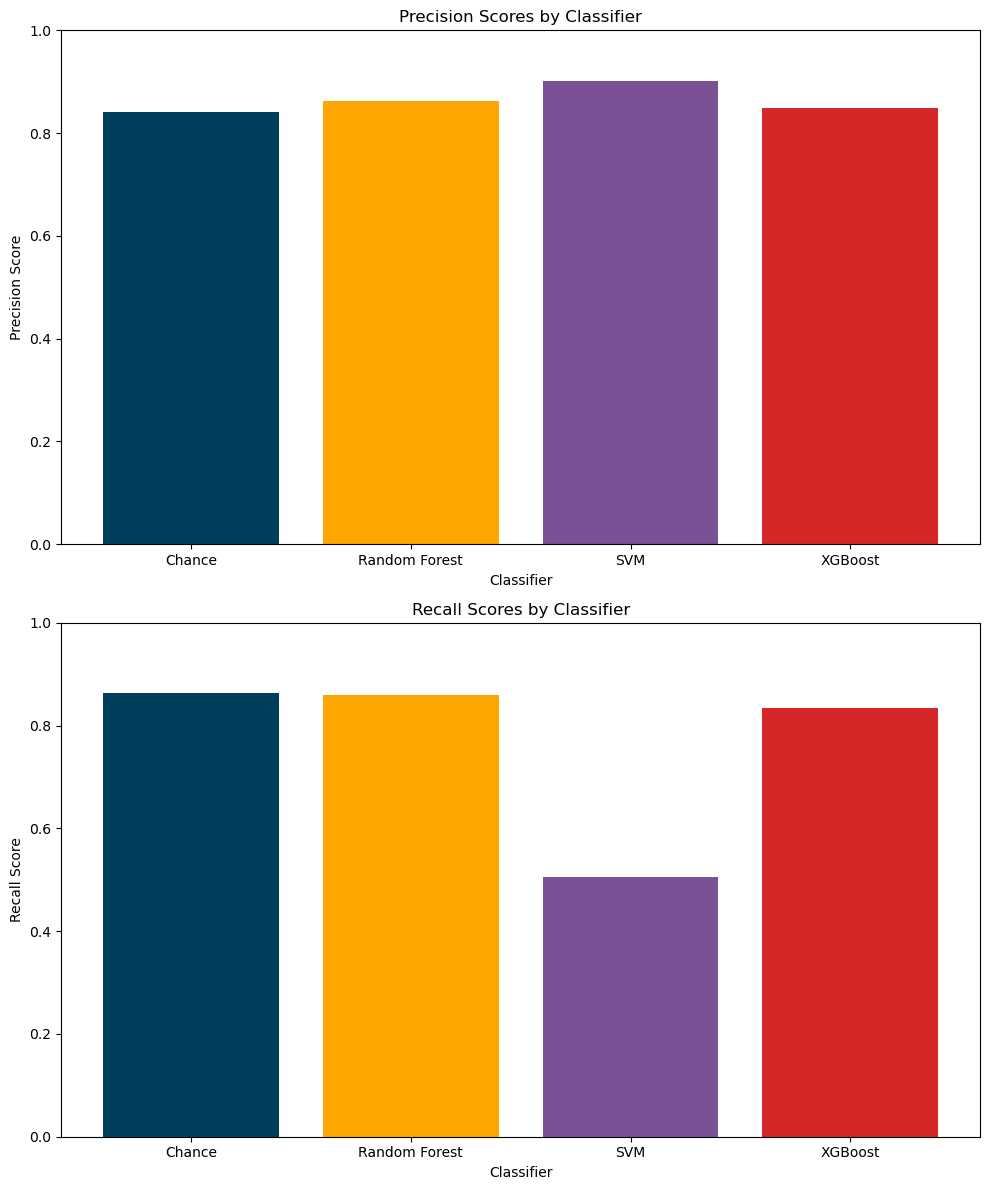

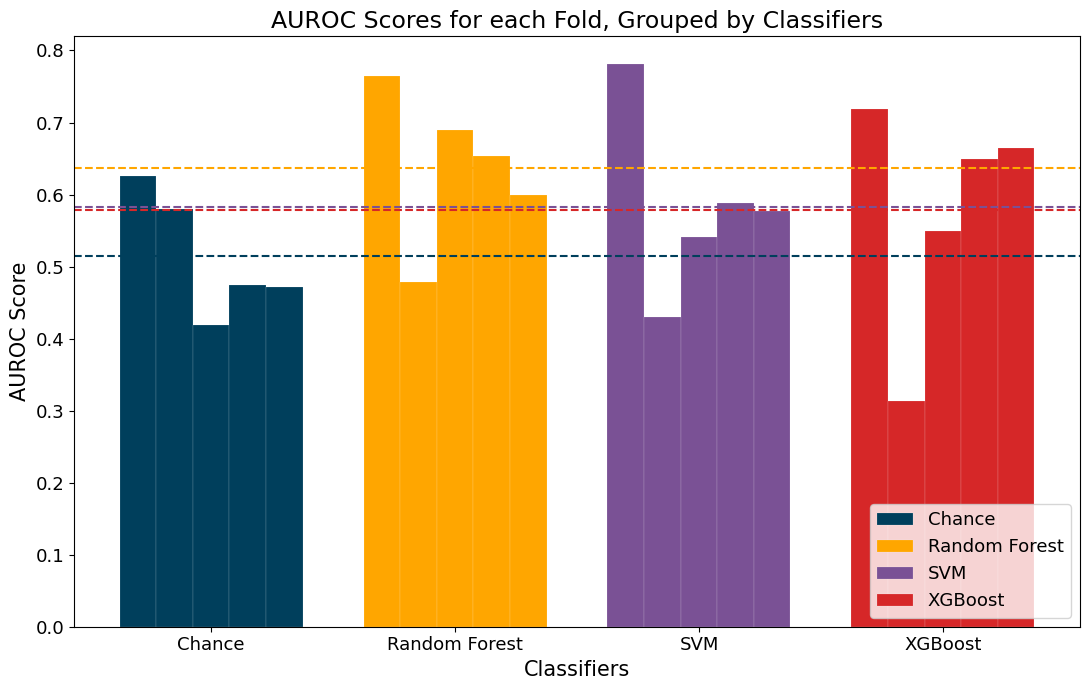

In [28]:
df = df_divergent_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_divergent_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME + NLP

Chance Results:
Avg Accuracy: 0.71
Avg Weighted F1 Score: 0.71
Avg Precision_1: 0.83
Avg Recall_1: 0.83
Avg AUROC: 0.51
Avg Confusion Matrix:
[[ 0.8  7.2]
 [ 7.2 34.2]]
Avg Prediction Rate: 0.84

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.76
Avg Weighted F1 Score: 0.77
Avg Precision_1: 0.88
Avg Recall_1: 0.84
Avg AUROC: 0.76
Avg Confusion Matrix:
[[ 3.2  4.8]
 [ 7.  34.4]]
Avg Prediction Rate: 0.80

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

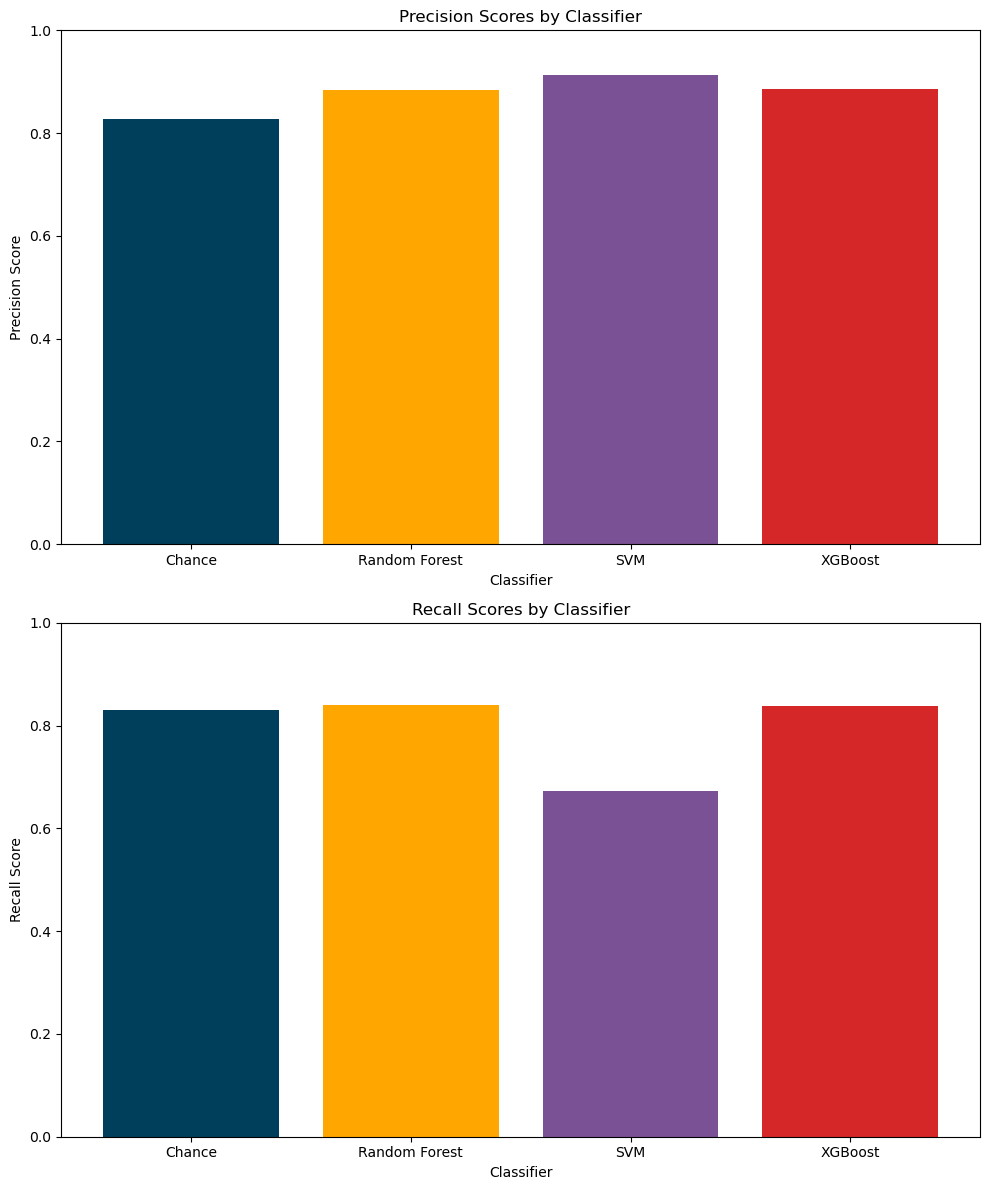

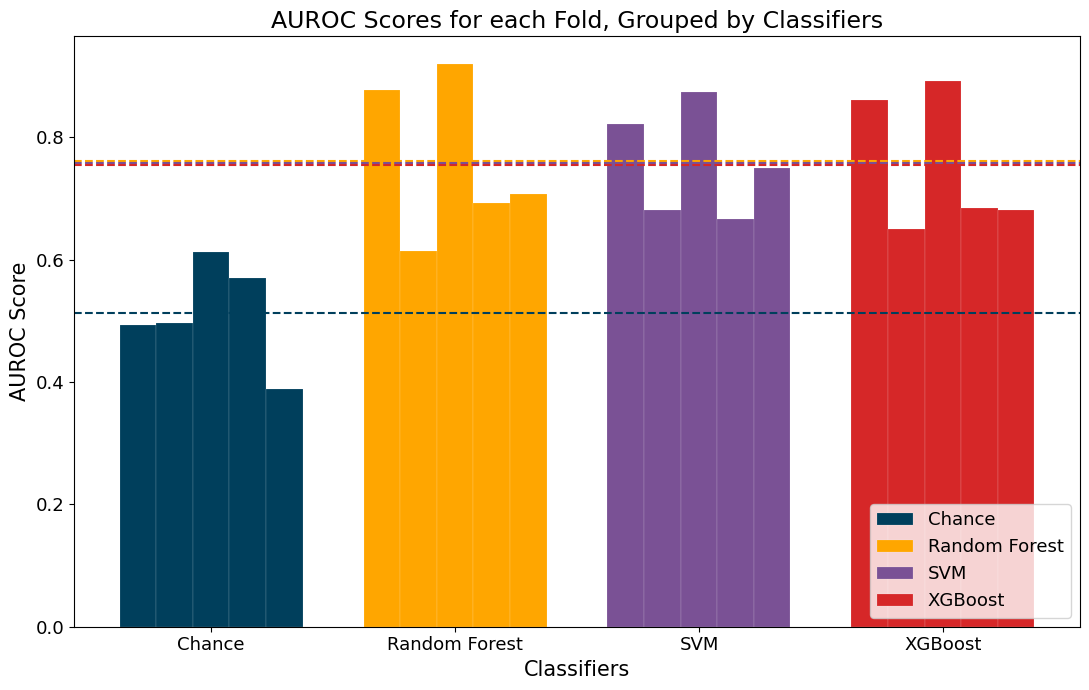

In [29]:
df = df_divergent_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_divergent_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

## MODELING ADD or ADHD

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.75
Avg Weighted F1 Score: 0.74
Avg Precision_1: 0.84
Avg Recall_1: 0.87
Avg AUROC: 0.59
Avg Confusion Matrix:
[[ 1.   7. ]
 [ 5.4 36. ]]
Avg Prediction Rate: 0.87

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.75
Avg Weighted F1 Score: 0.78
Avg Precision_1: 0.92
Avg Recall_1: 0.78
Avg AUROC: 0.82
Avg Confusion Matrix:
[[ 5.   3. ]
 [ 8.8 32.6]]
Avg Prediction Rate: 0.72

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

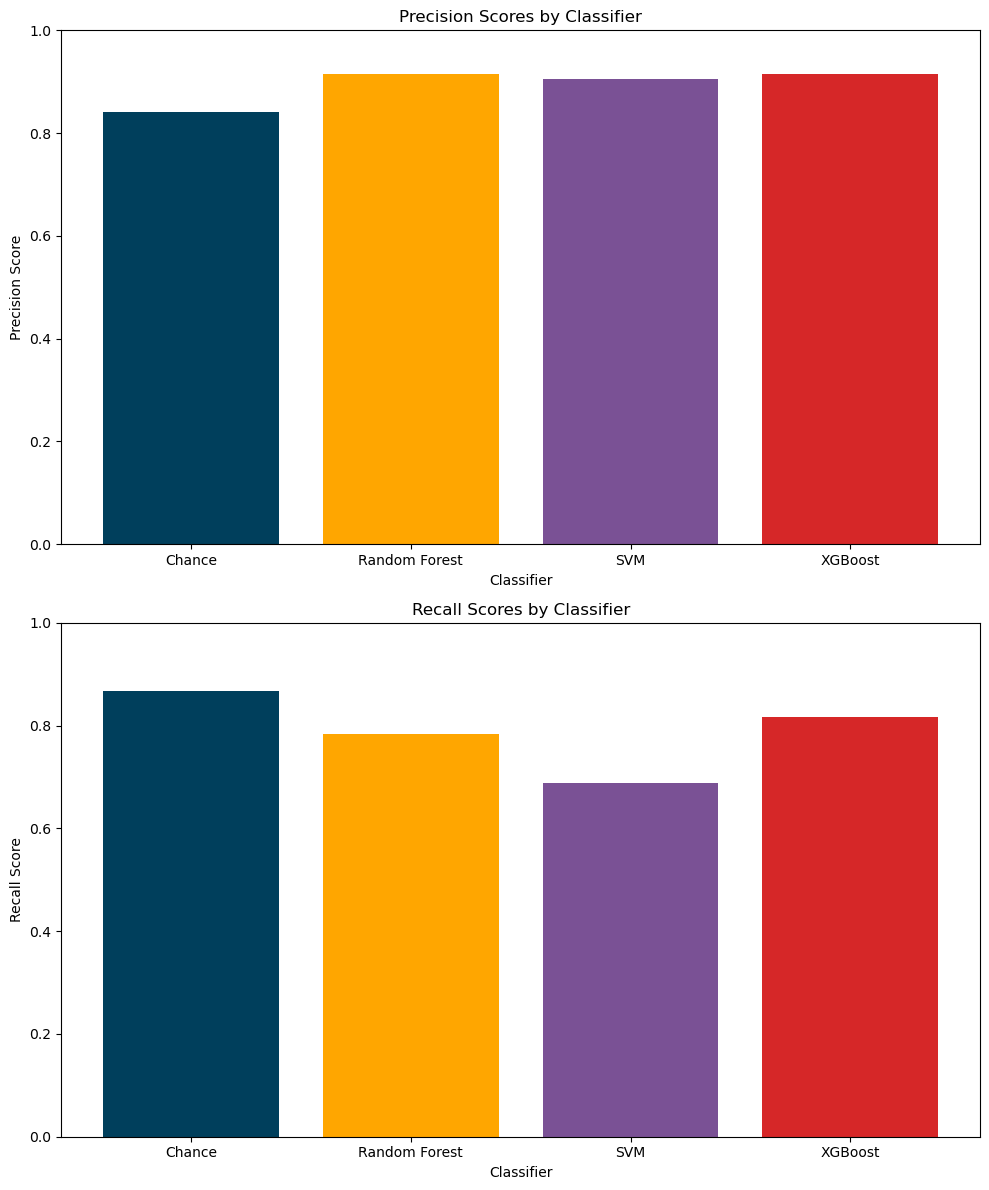

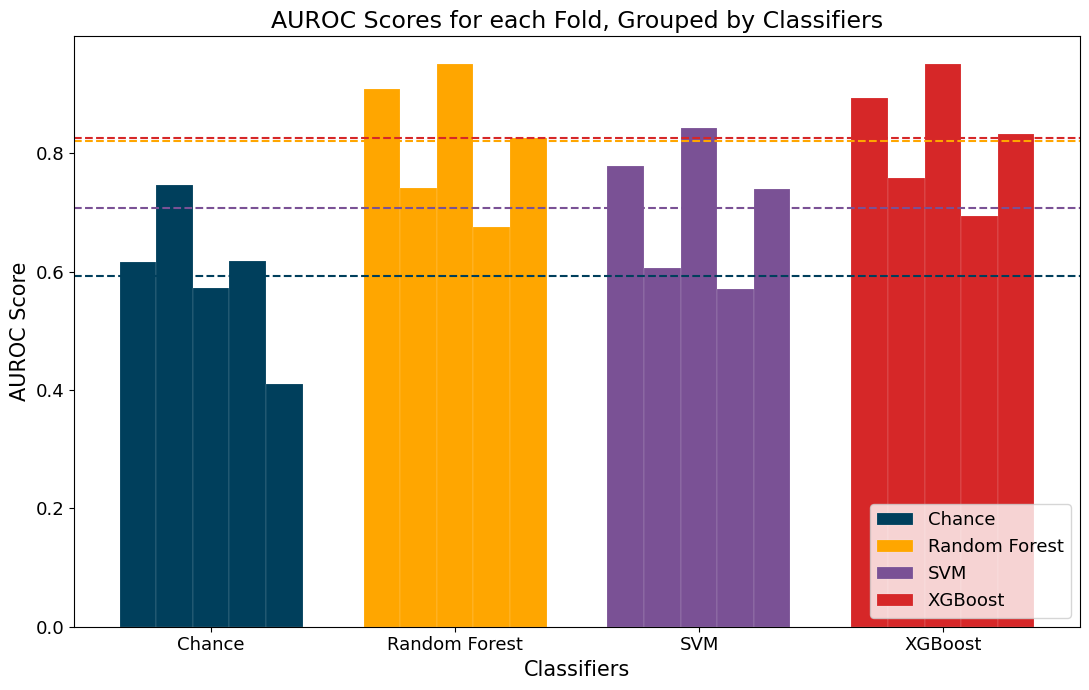

In [13]:
df = df_d1_clean
features = ["sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
            "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
            "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
            "WRB", "RBR"]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d1_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

In [ ]:
df = df_d1_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d1_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

In [ ]:
df = df_d1_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d1_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME

In [ ]:
df = df_d1_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d1_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME + NLP

In [ ]:
df = df_d1_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d1_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

## MODELING Autism, Asperger’s, or ASD

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.75
Avg Weighted F1 Score: 0.74
Avg Precision_1: 0.84
Avg Recall_1: 0.87
Avg AUROC: 0.59
Avg Confusion Matrix:
[[ 1.   7. ]
 [ 5.4 36. ]]
Avg Prediction Rate: 0.87

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.75
Avg Weighted F1 Score: 0.78
Avg Precision_1: 0.92
Avg Recall_1: 0.78
Avg AUROC: 0.82
Avg Confusion Matrix:
[[ 5.   3. ]
 [ 8.8 32.6]]
Avg Prediction Rate: 0.72

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

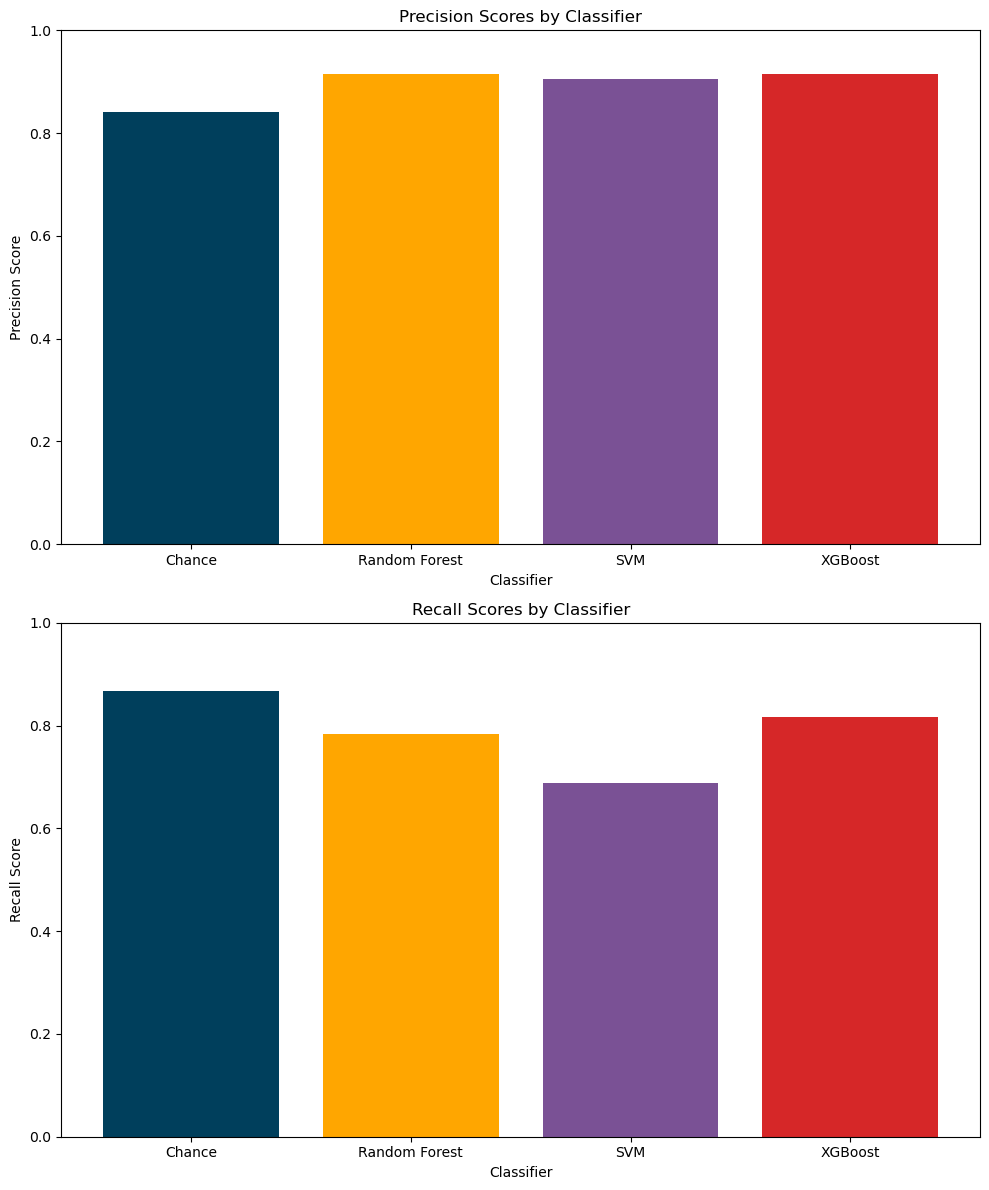

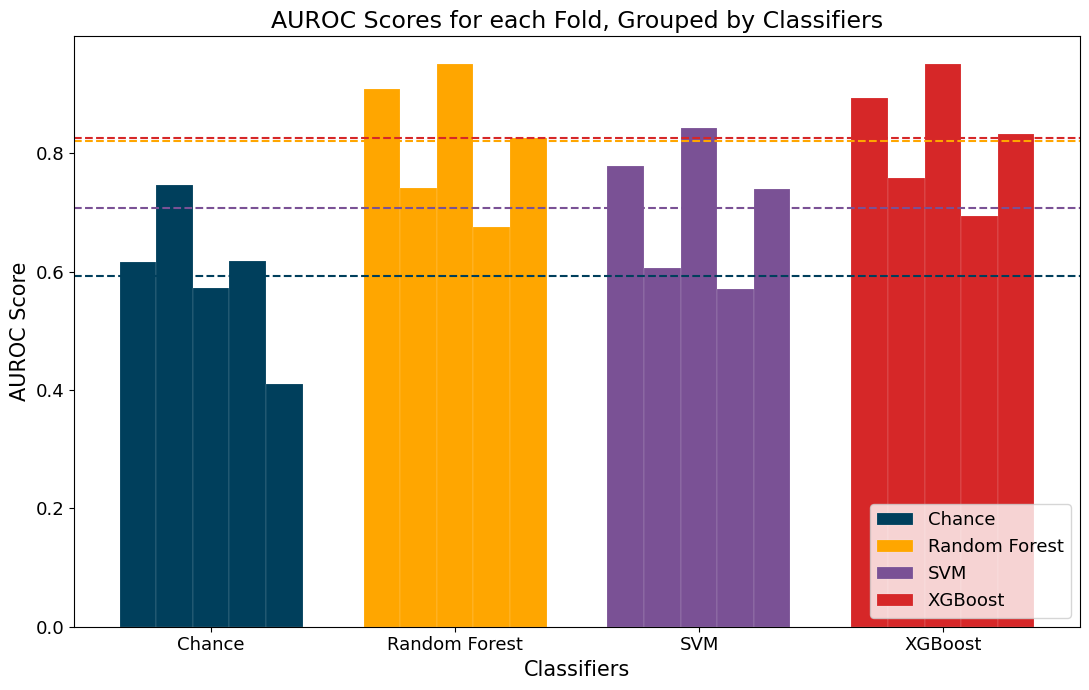

In [13]:
df = df_d2_clean
features = ["sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
            "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
            "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
            "WRB", "RBR"]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d2_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

In [ ]:
df = df_d2_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d2_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

In [ ]:
df = df_d2_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d2_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME

In [ ]:
df = df_d2_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d2_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME + NLP

In [ ]:
df = df_d2_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d2_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

## MODELING Dyslexia, Dyspraxia, Dyscalculia, Dysgraphia

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.74
Avg Weighted F1 Score: 0.73
Avg Precision_1: 0.84
Avg Recall_1: 0.87
Avg AUROC: 0.48
Avg Confusion Matrix:
[[ 0.8  7.2]
 [ 5.4 36. ]]
Avg Prediction Rate: 0.87

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.75
Avg Weighted F1 Score: 0.78
Avg Precision_1: 0.92
Avg Recall_1: 0.78
Avg AUROC: 0.81
Avg Confusion Matrix:
[[ 5.   3. ]
 [ 9.  32.4]]
Avg Prediction Rate: 0.72

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

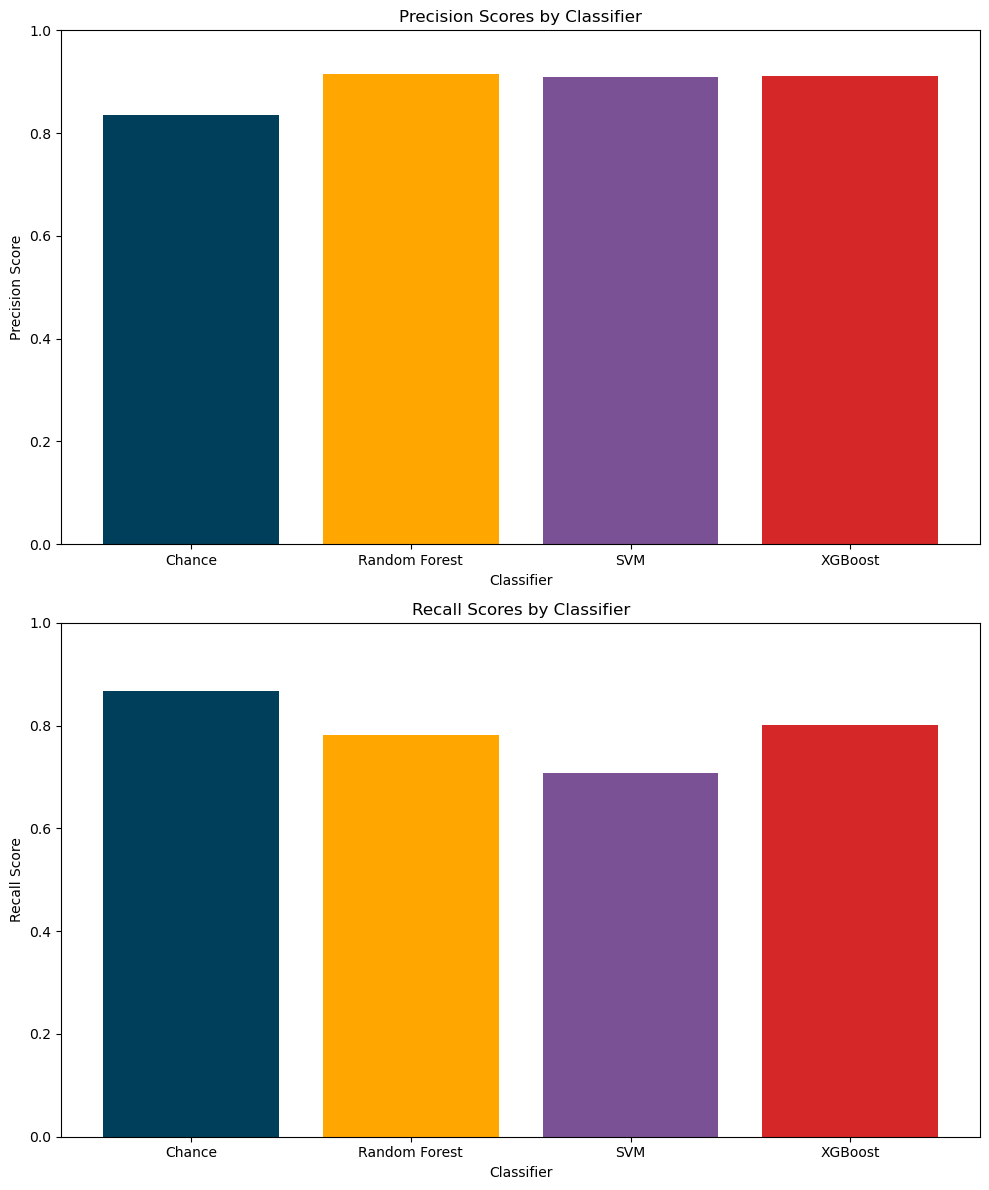

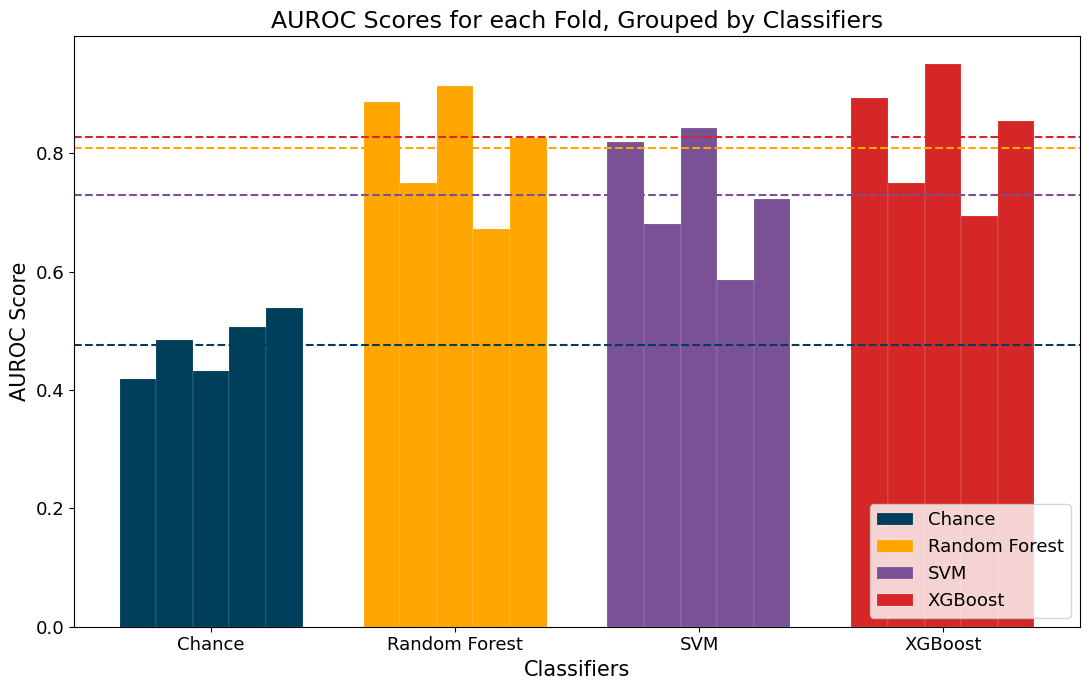

In [30]:
df = df_d3_clean
features = ["sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
            "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
            "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
            "WRB", "RBR"]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d3_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

Chance Results:
Avg Accuracy: 0.73
Avg Weighted F1 Score: 0.74
Avg Precision_1: 0.85
Avg Recall_1: 0.82
Avg AUROC: 0.54
Avg Confusion Matrix:
[[ 2.   6. ]
 [ 7.6 33.8]]
Avg Prediction Rate: 0.81

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.70
Avg Weighted F1 Score: 0.71
Avg Precision_1: 0.84
Avg Recall_1: 0.80
Avg AUROC: 0.59
Avg Confusion Matrix:
[[ 1.4  6.6]
 [ 8.  33.4]]
Avg Prediction Rate: 0.80

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

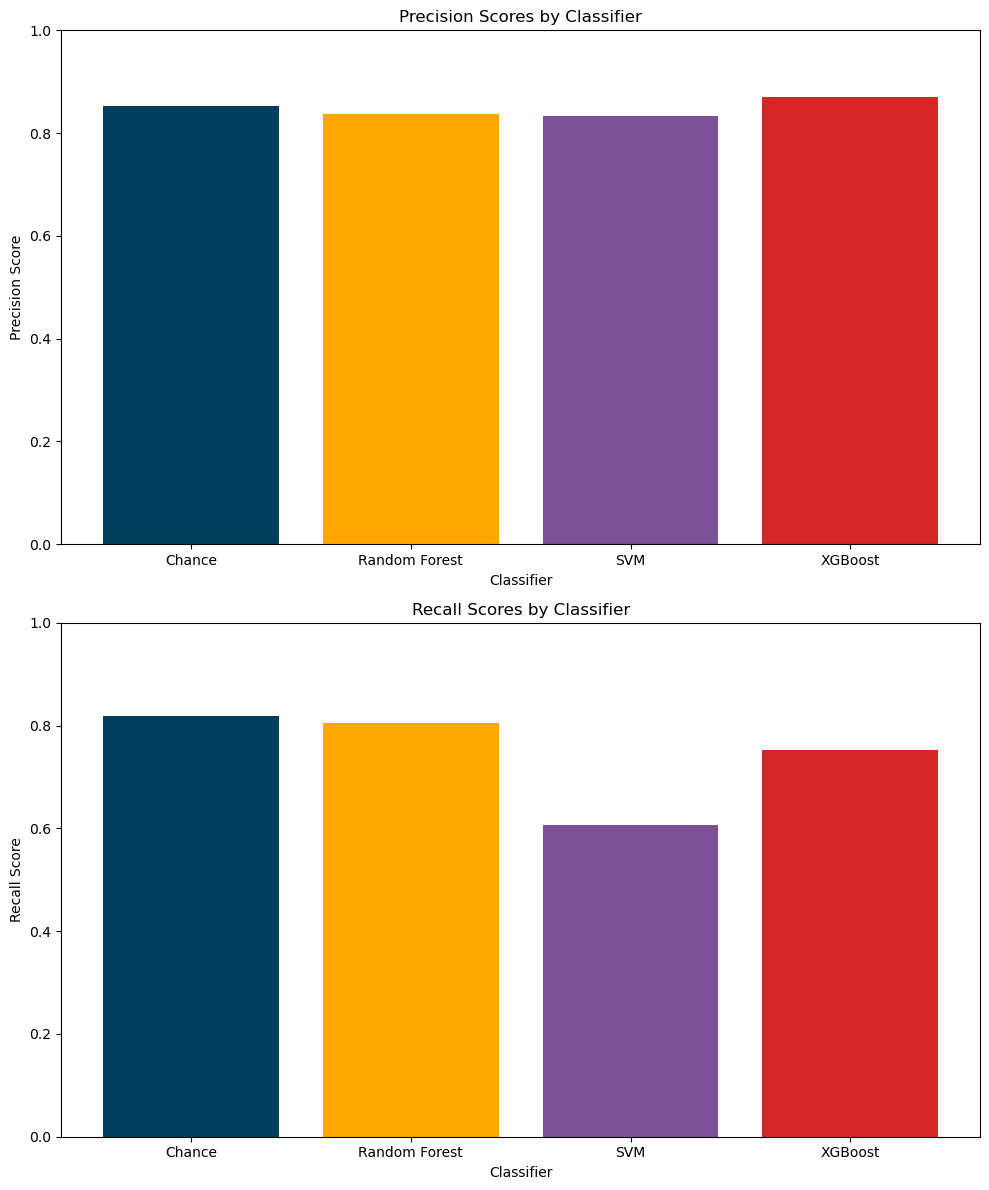

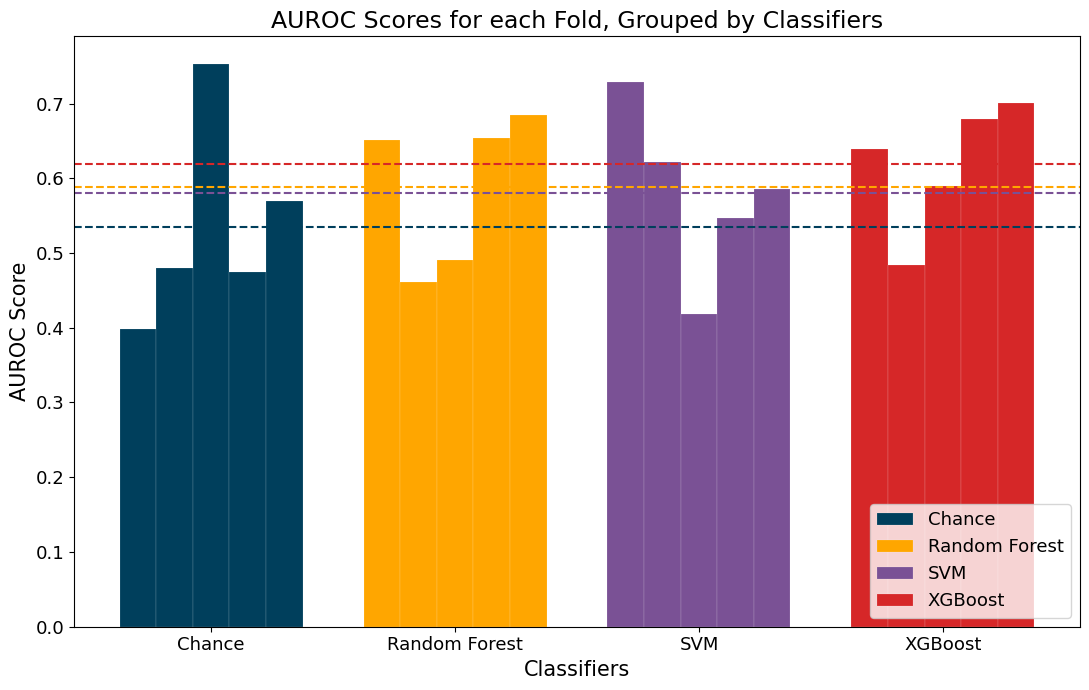

In [31]:
df = df_d3_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d3_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

Chance Results:
Avg Accuracy: 0.73
Avg Weighted F1 Score: 0.73
Avg Precision_1: 0.84
Avg Recall_1: 0.85
Avg AUROC: 0.61
Avg Confusion Matrix:
[[ 1.2  6.8]
 [ 6.2 35.2]]
Avg Prediction Rate: 0.85

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.76
Avg Weighted F1 Score: 0.77
Avg Precision_1: 0.89
Avg Recall_1: 0.81
Avg AUROC: 0.80
Avg Confusion Matrix:
[[ 3.8  4.2]
 [ 7.6 33.8]]
Avg Prediction Rate: 0.77

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

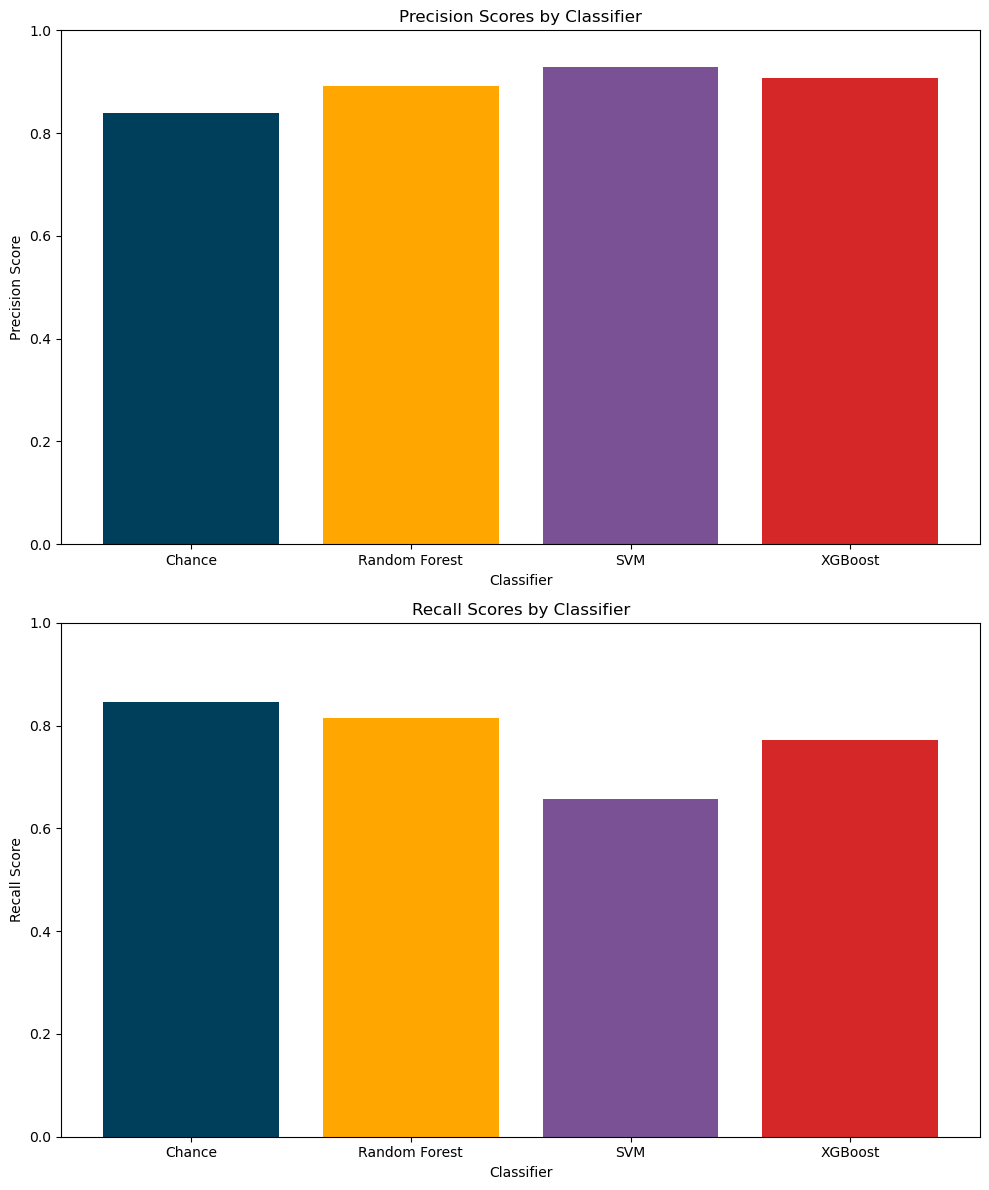

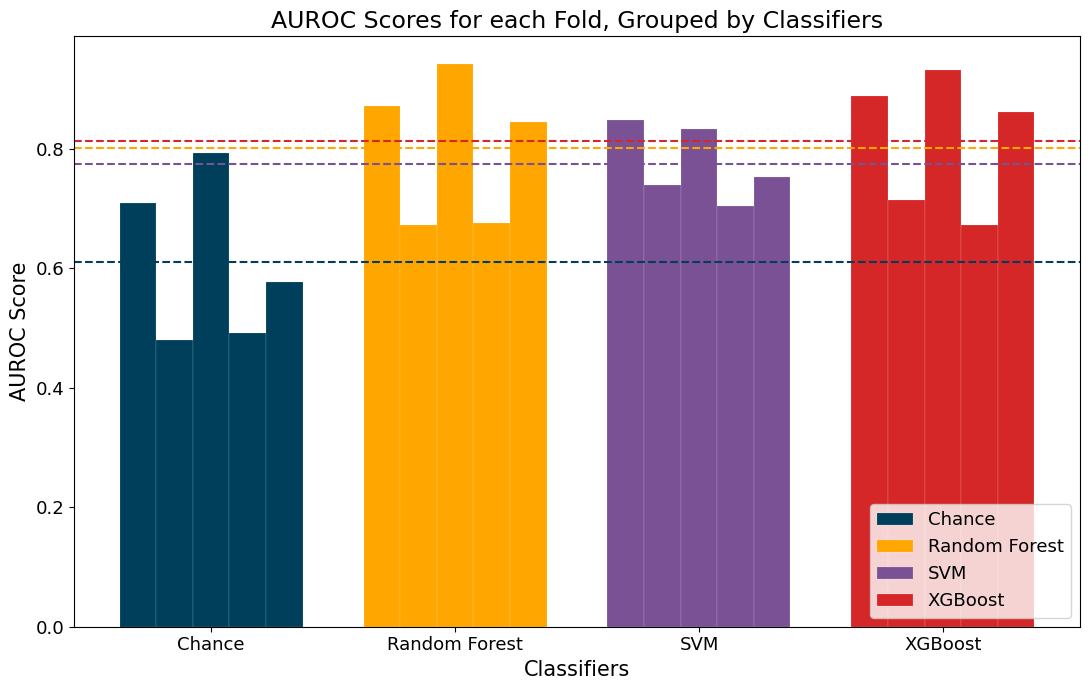

In [32]:
df = df_d3_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d3_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME

Chance Results:
Avg Accuracy: 0.73
Avg Weighted F1 Score: 0.73
Avg Precision_1: 0.83
Avg Recall_1: 0.85
Avg AUROC: 0.51
Avg Confusion Matrix:
[[ 1.   7. ]
 [ 6.2 35.2]]
Avg Prediction Rate: 0.85

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.73
Avg Weighted F1 Score: 0.72
Avg Precision_1: 0.83
Avg Recall_1: 0.86
Avg AUROC: 0.55
Avg Confusion Matrix:
[[ 0.8  7.2]
 [ 5.4 36. ]]
Avg Prediction Rate: 0.86

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

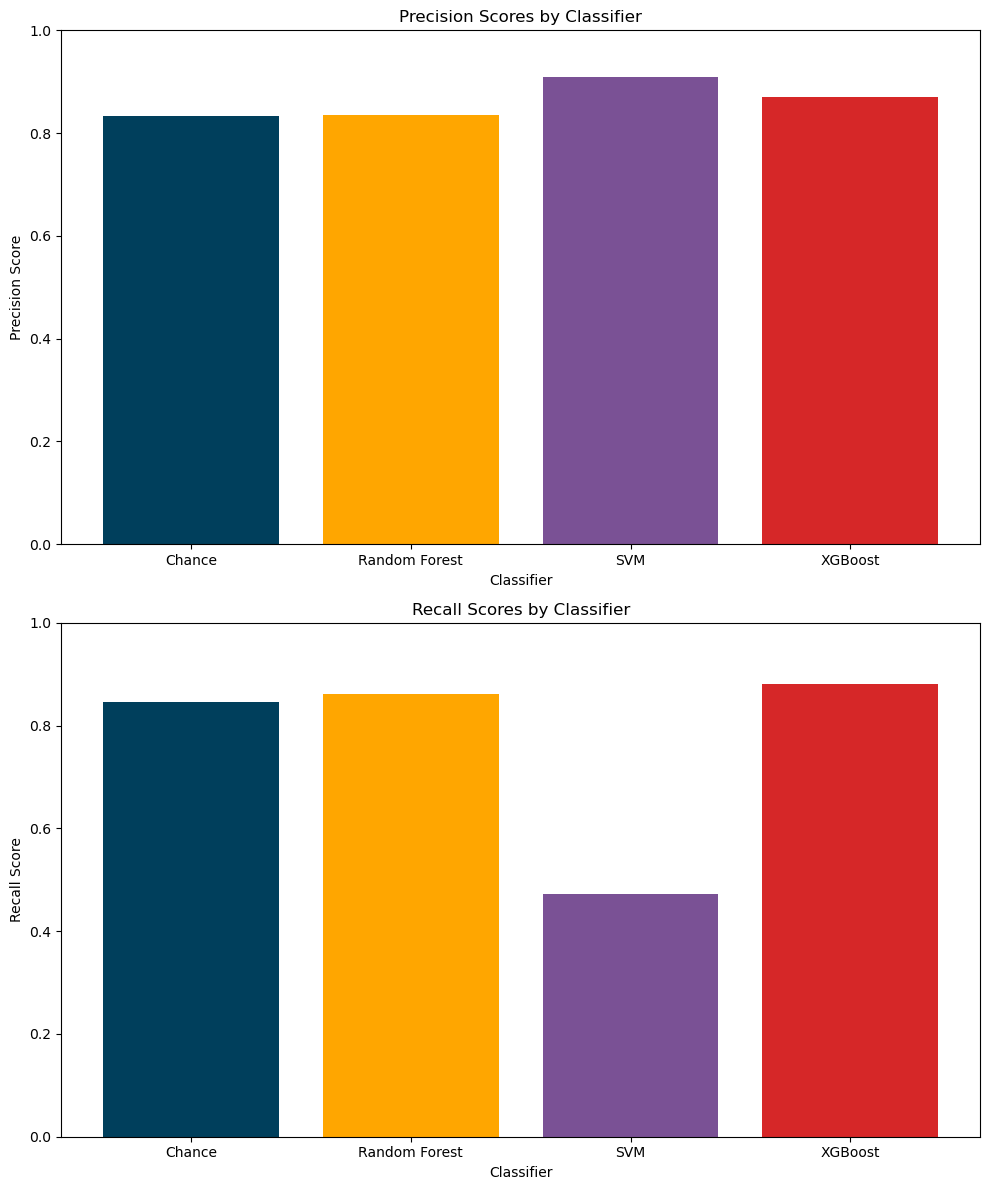

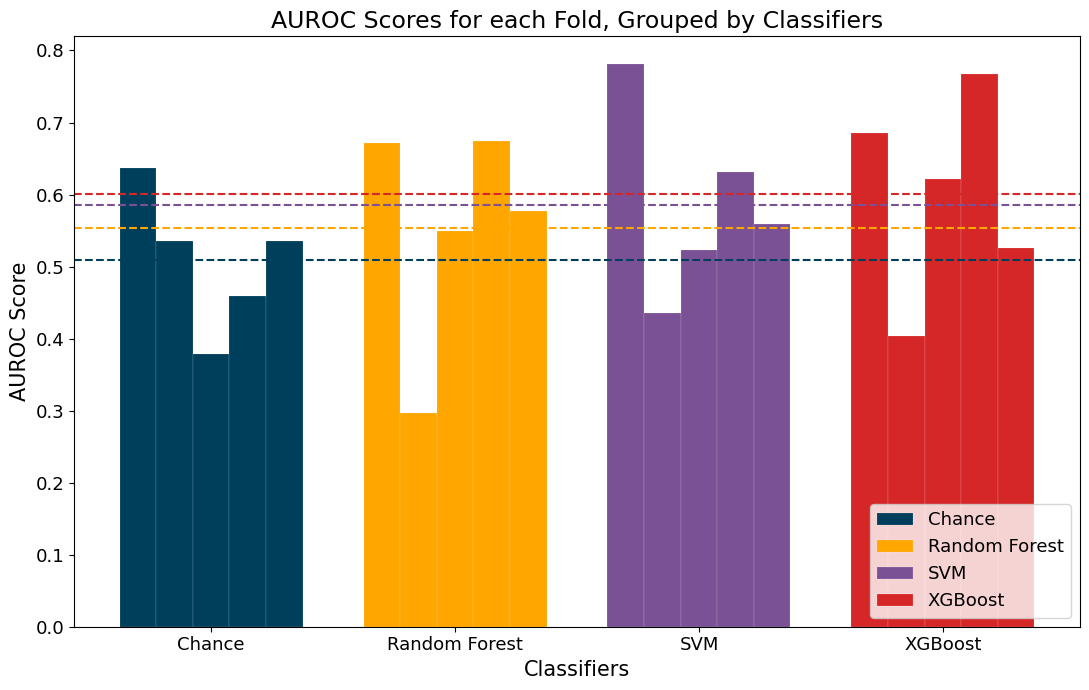

In [33]:
df = df_d3_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d3_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME + NLP

Chance Results:
Avg Accuracy: 0.73
Avg Weighted F1 Score: 0.74
Avg Precision_1: 0.85
Avg Recall_1: 0.83
Avg AUROC: 0.53
Avg Confusion Matrix:
[[ 1.8  6.2]
 [ 7.2 34.2]]
Avg Prediction Rate: 0.82

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.77
Avg Weighted F1 Score: 0.77
Avg Precision_1: 0.89
Avg Recall_1: 0.85
Avg AUROC: 0.78
Avg Confusion Matrix:
[[ 3.2  4.8]
 [ 6.6 34.8]]
Avg Prediction Rate: 0.81

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

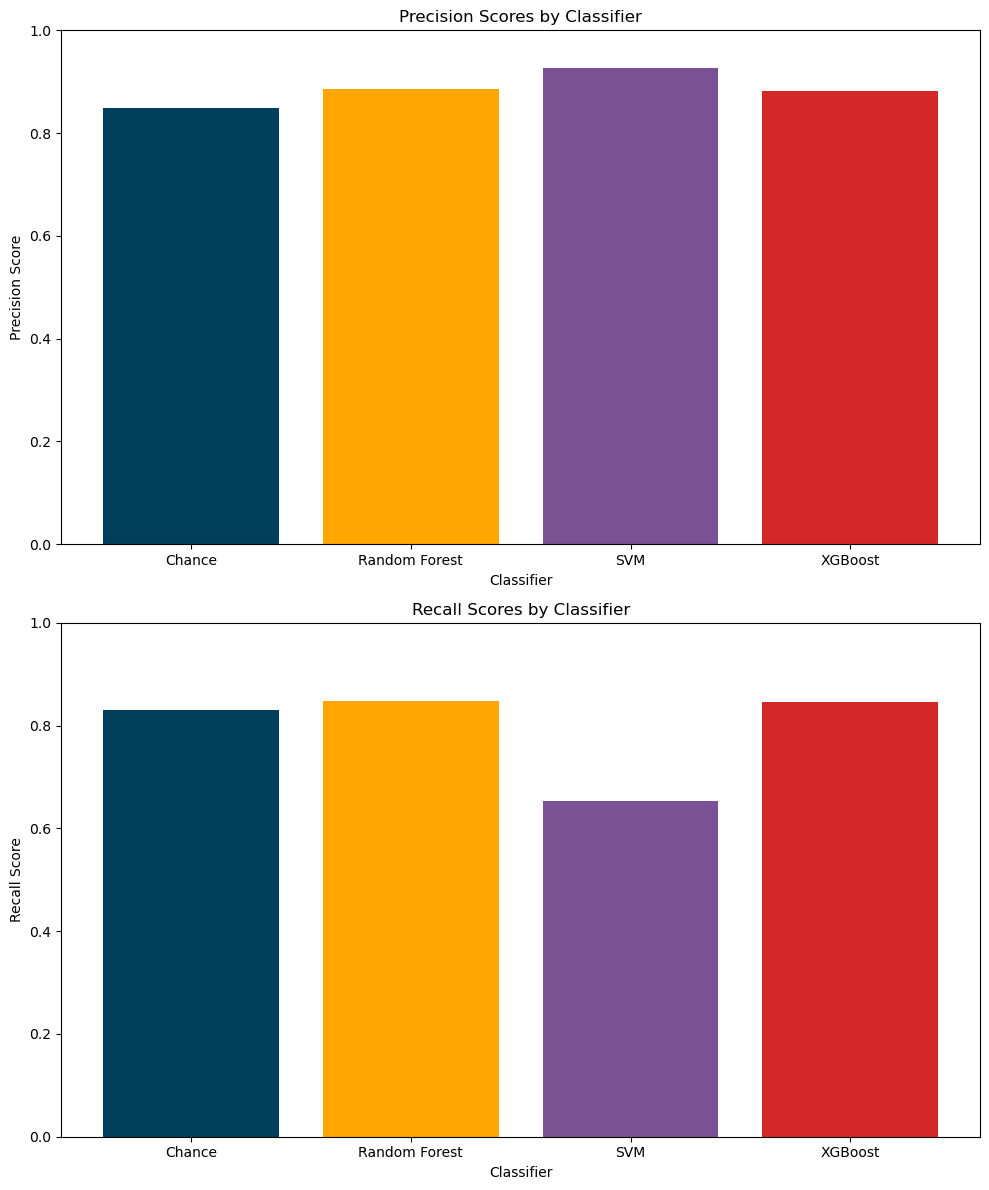

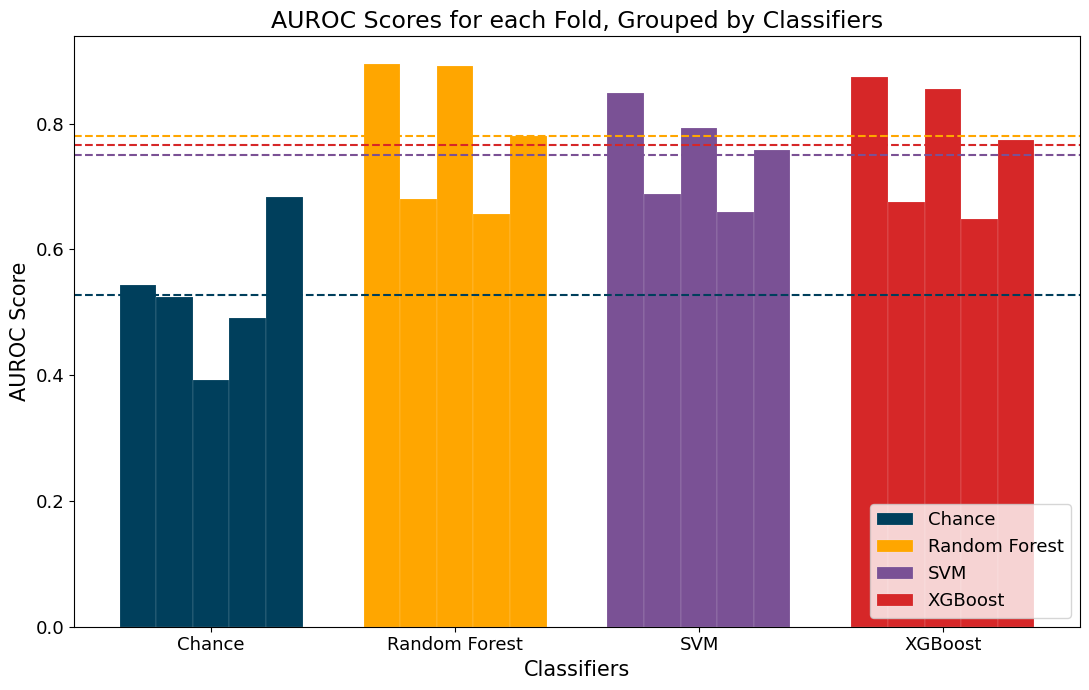

In [34]:
df = df_d3_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d3_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

## MODELING Any other language, reading, math, and nonverbal learning disorder

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.71
Avg Weighted F1 Score: 0.71
Avg Precision_1: 0.83
Avg Recall_1: 0.82
Avg AUROC: 0.51
Avg Confusion Matrix:
[[ 1.   7. ]
 [ 7.2 34.2]]
Avg Prediction Rate: 0.83

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.77
Avg Weighted F1 Score: 0.79
Avg Precision_1: 0.91
Avg Recall_1: 0.80
Avg AUROC: 0.82
Avg Confusion Matrix:
[[ 4.8  3.2]
 [ 8.  33.4]]
Avg Prediction Rate: 0.74

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

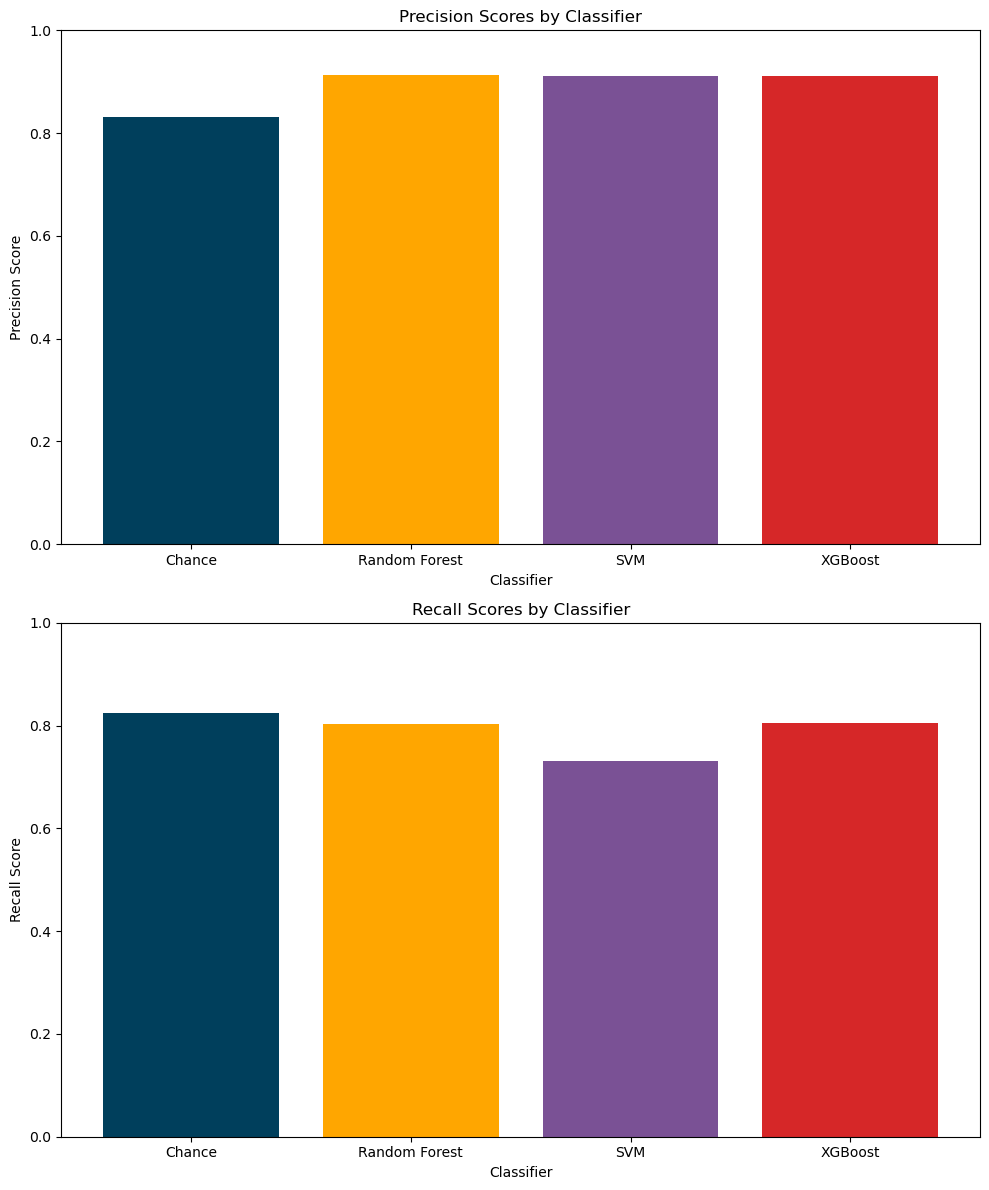

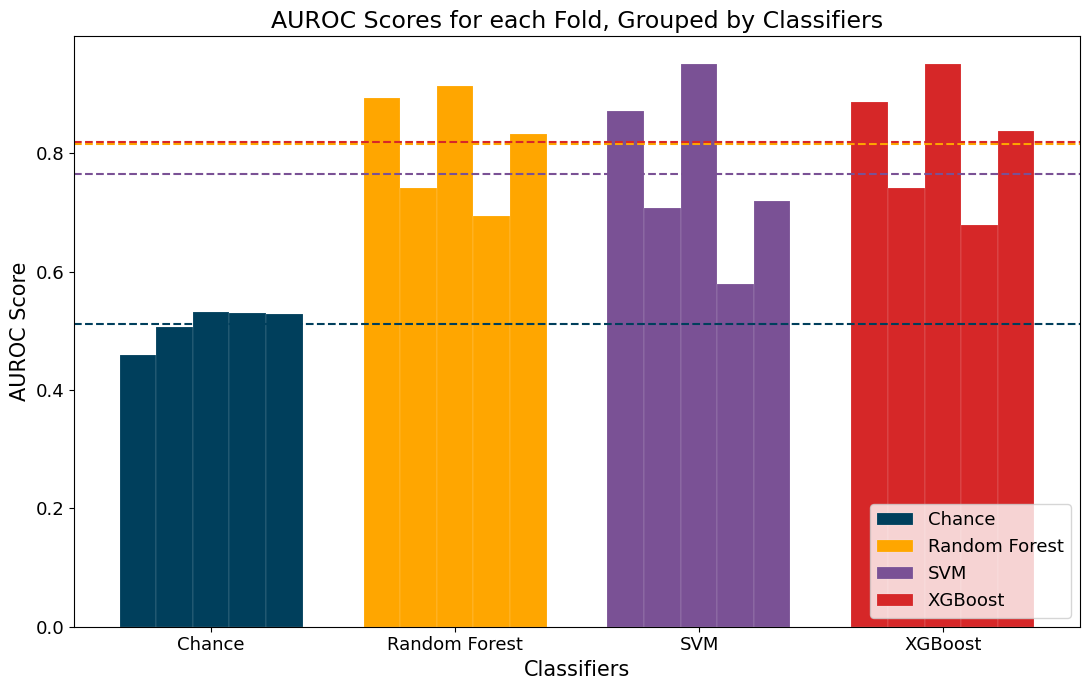

In [35]:
df = df_d4_clean
features = ["sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
            "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
            "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
            "WRB", "RBR"]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d4_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

Chance Results:
Avg Accuracy: 0.72
Avg Weighted F1 Score: 0.73
Avg Precision_1: 0.85
Avg Recall_1: 0.81
Avg AUROC: 0.51
Avg Confusion Matrix:
[[ 1.8  6.2]
 [ 7.6 33.8]]
Avg Prediction Rate: 0.80

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.72
Avg Weighted F1 Score: 0.73
Avg Precision_1: 0.86
Avg Recall_1: 0.81
Avg AUROC: 0.61
Avg Confusion Matrix:
[[ 2.2  5.8]
 [ 7.8 33.6]]
Avg Prediction Rate: 0.79

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

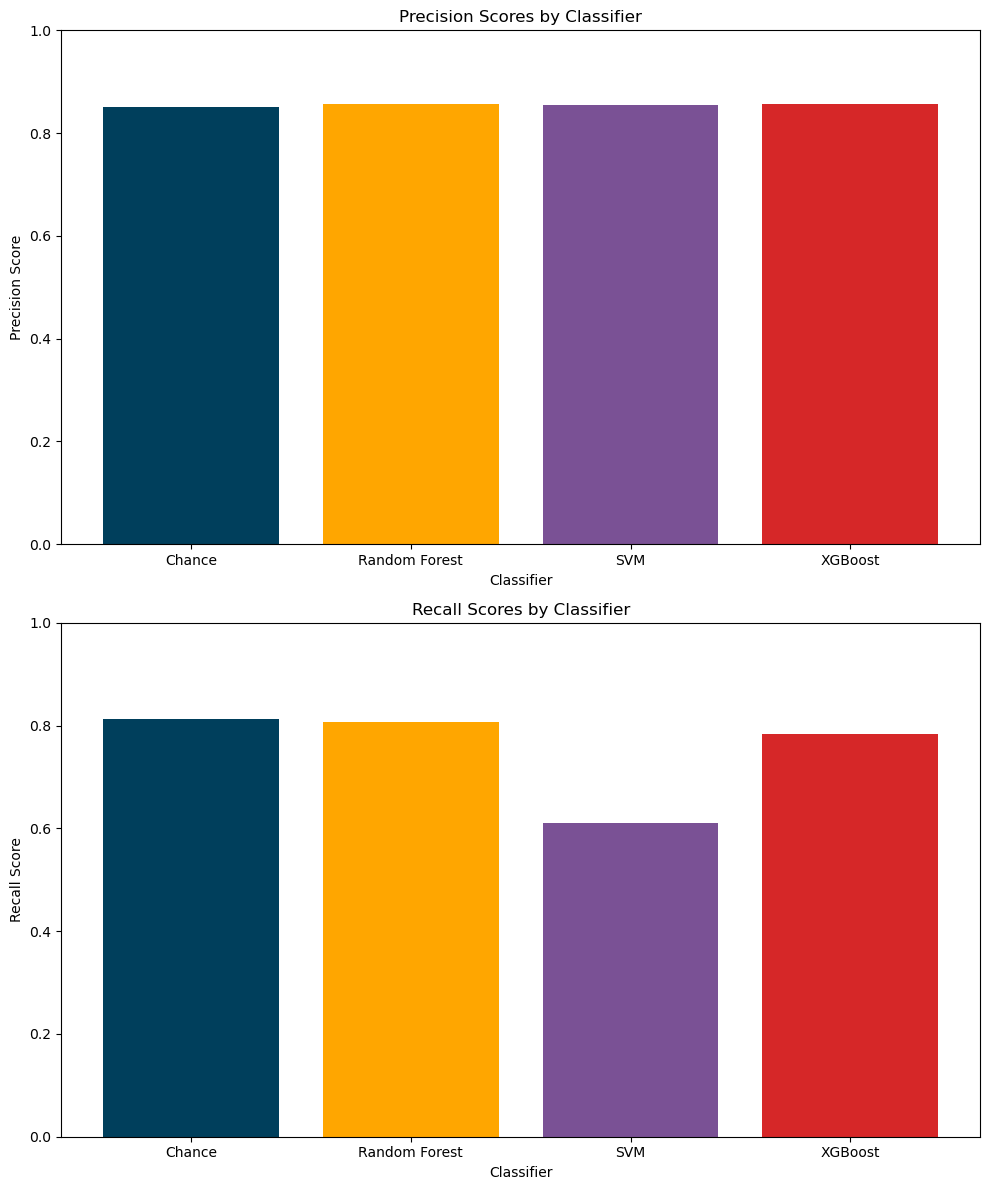

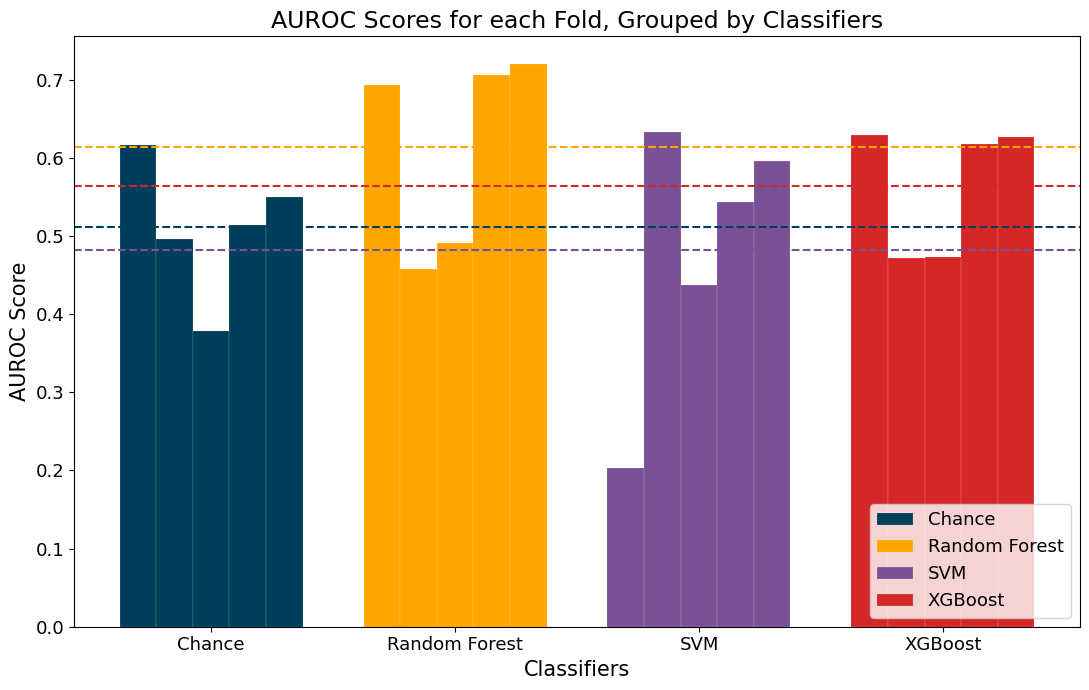

In [36]:
df = df_d4_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d4_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

Chance Results:
Avg Accuracy: 0.73
Avg Weighted F1 Score: 0.74
Avg Precision_1: 0.85
Avg Recall_1: 0.84
Avg AUROC: 0.55
Avg Confusion Matrix:
[[ 1.6  6.4]
 [ 6.6 34.8]]
Avg Prediction Rate: 0.83

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.77
Avg Weighted F1 Score: 0.78
Avg Precision_1: 0.90
Avg Recall_1: 0.81
Avg AUROC: 0.81
Avg Confusion Matrix:
[[ 4.4  3.6]
 [ 7.6 33.8]]
Avg Prediction Rate: 0.76

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

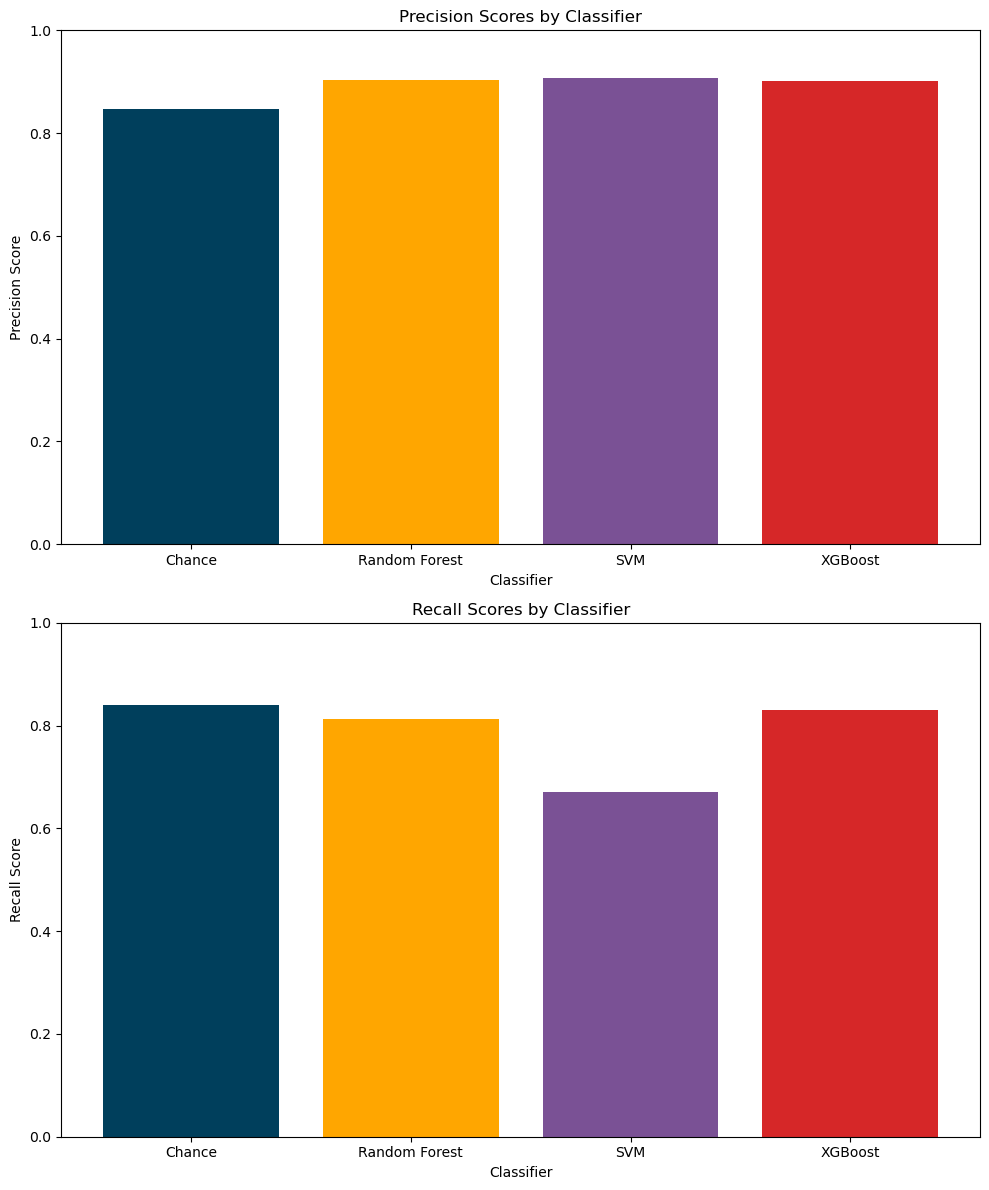

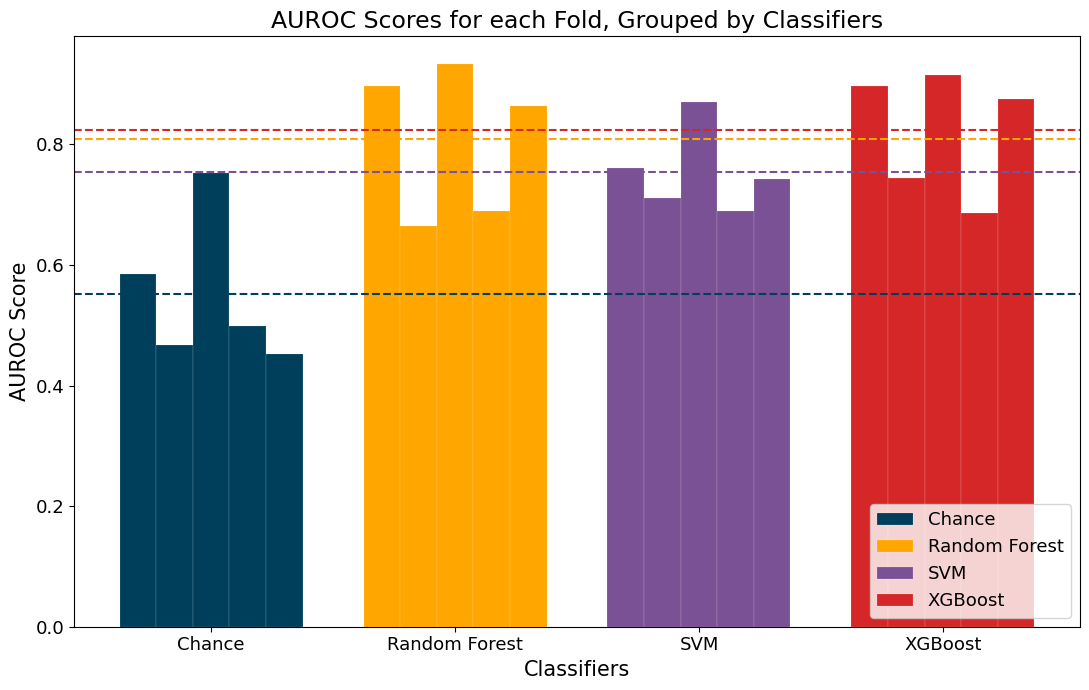

In [37]:
df = df_d4_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d4_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME

Chance Results:
Avg Accuracy: 0.69
Avg Weighted F1 Score: 0.71
Avg Precision_1: 0.84
Avg Recall_1: 0.78
Avg AUROC: 0.48
Avg Confusion Matrix:
[[ 1.8  6.2]
 [ 9.  32.4]]
Avg Prediction Rate: 0.78

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.76
Avg Weighted F1 Score: 0.75
Avg Precision_1: 0.86
Avg Recall_1: 0.86
Avg AUROC: 0.63
Avg Confusion Matrix:
[[ 1.8  6.2]
 [ 5.4 36. ]]
Avg Prediction Rate: 0.84

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

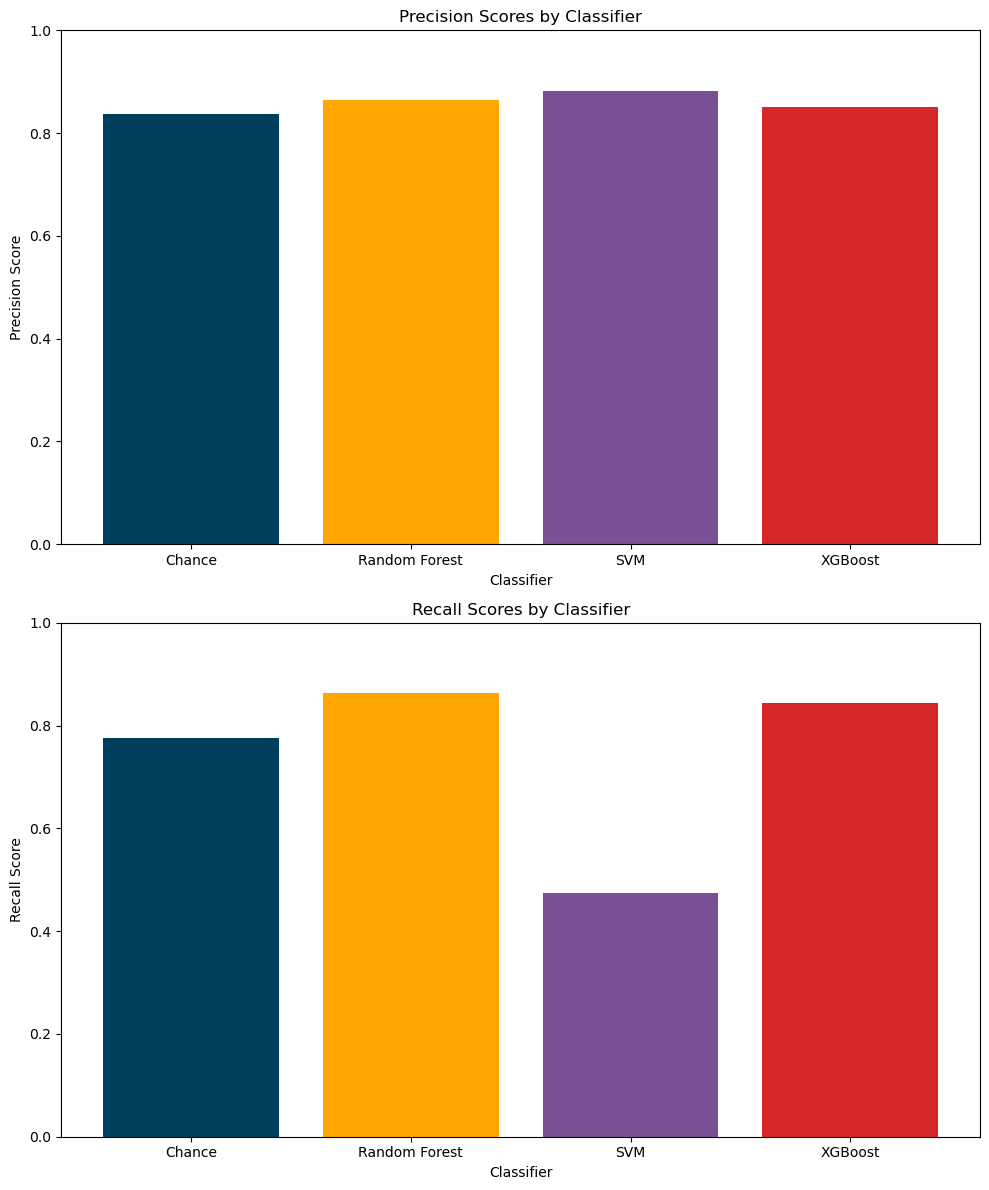

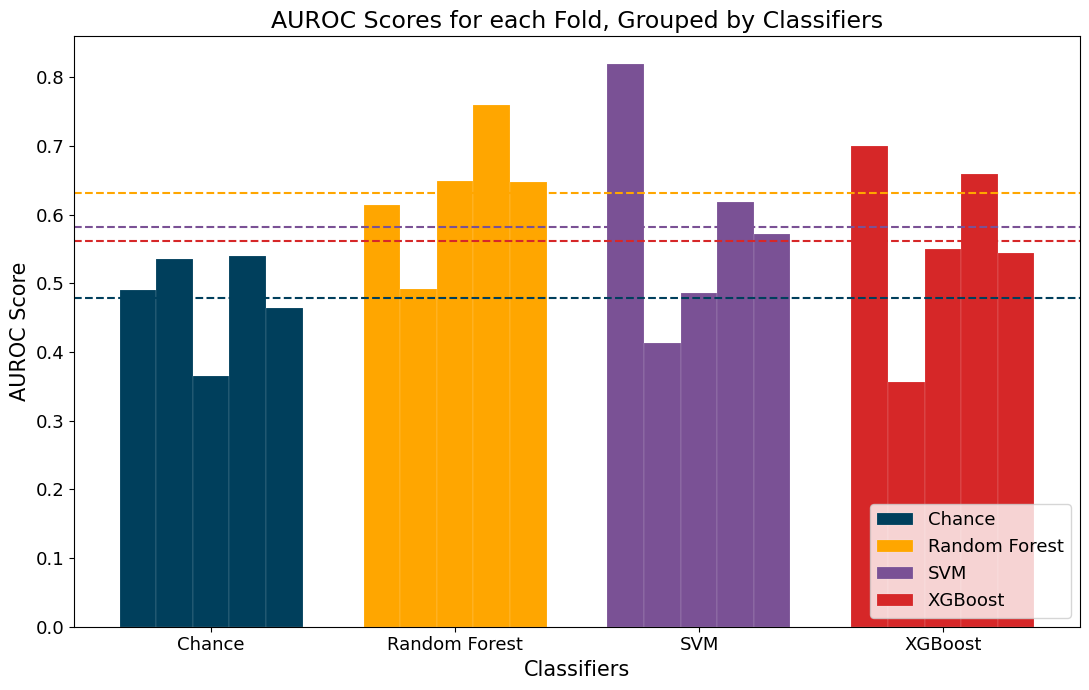

In [38]:
df = df_d4_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d4_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME + NLP

Chance Results:
Avg Accuracy: 0.73
Avg Weighted F1 Score: 0.72
Avg Precision_1: 0.83
Avg Recall_1: 0.86
Avg AUROC: 0.51
Avg Confusion Matrix:
[[ 0.8  7.2]
 [ 5.8 35.6]]
Avg Prediction Rate: 0.86

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.77
Avg Weighted F1 Score: 0.77
Avg Precision_1: 0.87
Avg Recall_1: 0.86
Avg AUROC: 0.79
Avg Confusion Matrix:
[[ 2.6  5.4]
 [ 6.  35.4]]
Avg Prediction Rate: 0.83

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

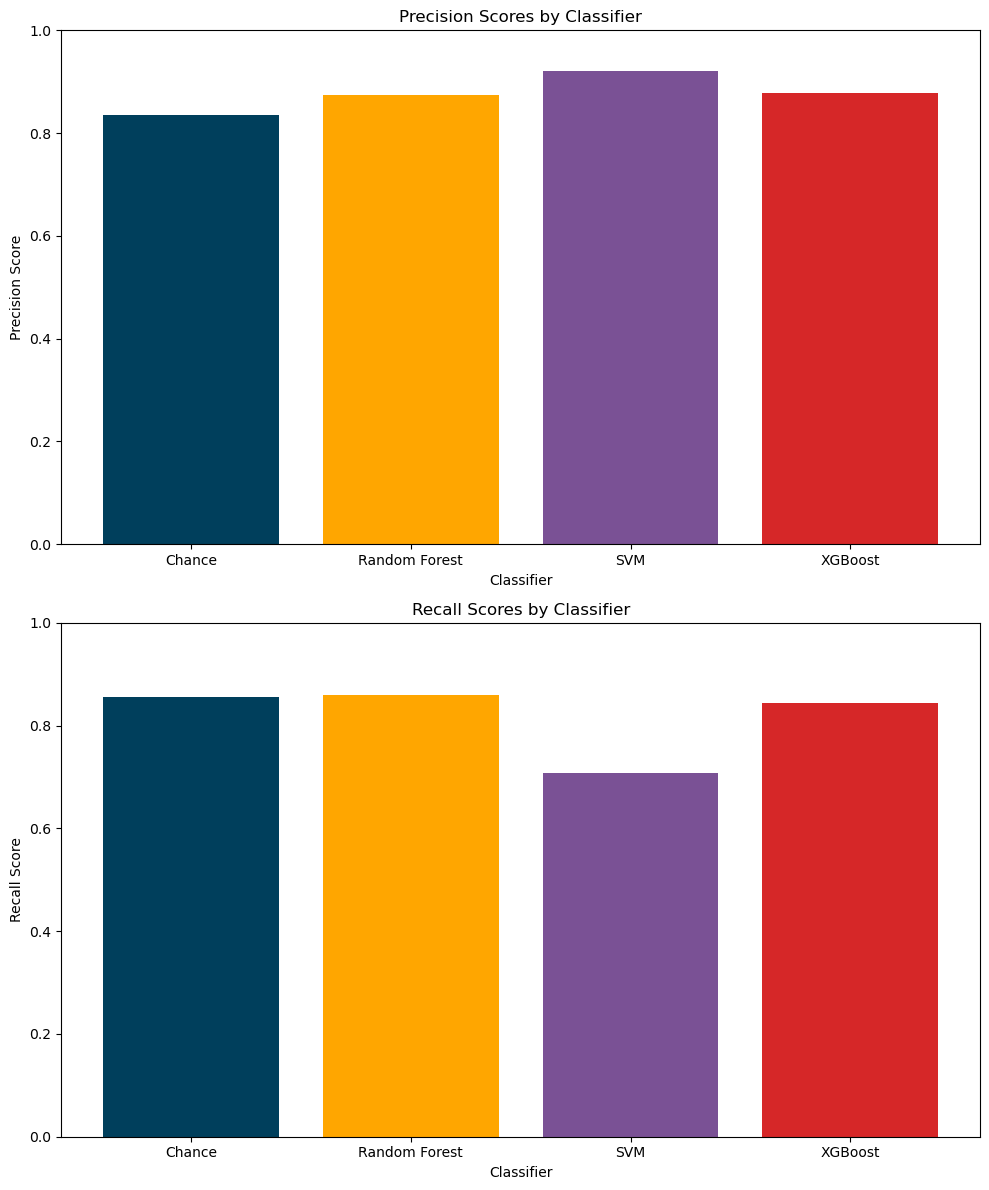

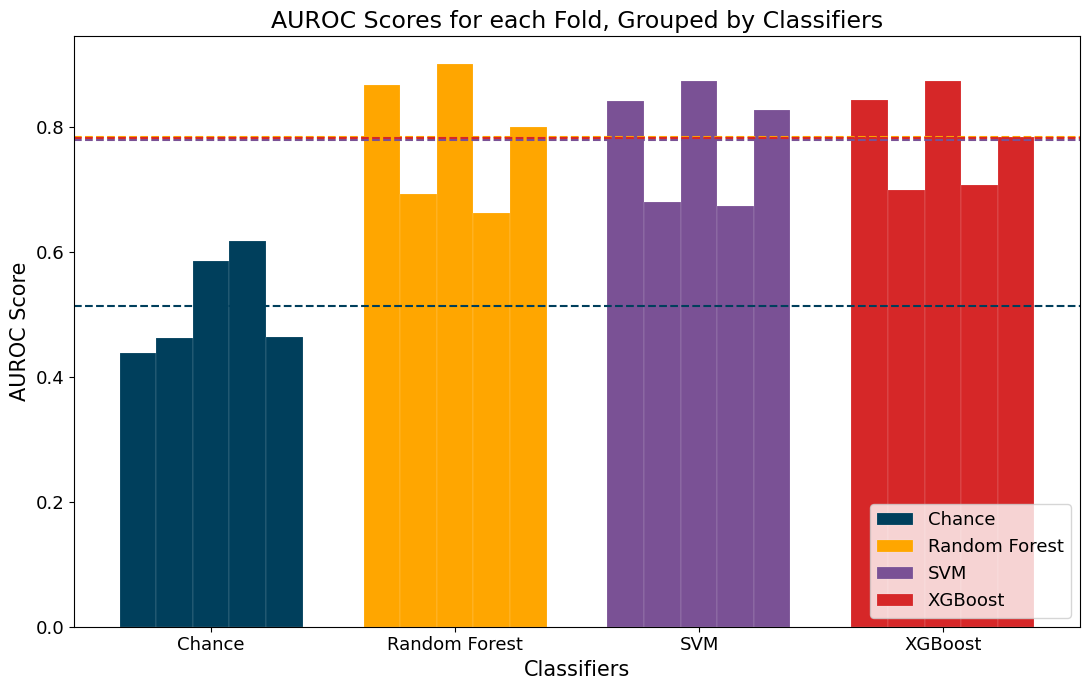

In [39]:
df = df_d4_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d4_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

## MODELING Generalized anxiety disorder

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.70
Avg Weighted F1 Score: 0.70
Avg Precision_1: 0.82
Avg Recall_1: 0.81
Avg AUROC: 0.50
Avg Confusion Matrix:
[[ 0.8  7.2]
 [ 7.4 34. ]]
Avg Prediction Rate: 0.83

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.75
Avg Weighted F1 Score: 0.78
Avg Precision_1: 0.92
Avg Recall_1: 0.78
Avg AUROC: 0.83
Avg Confusion Matrix:
[[ 5.   3. ]
 [ 9.  32.4]]
Avg Prediction Rate: 0.72

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

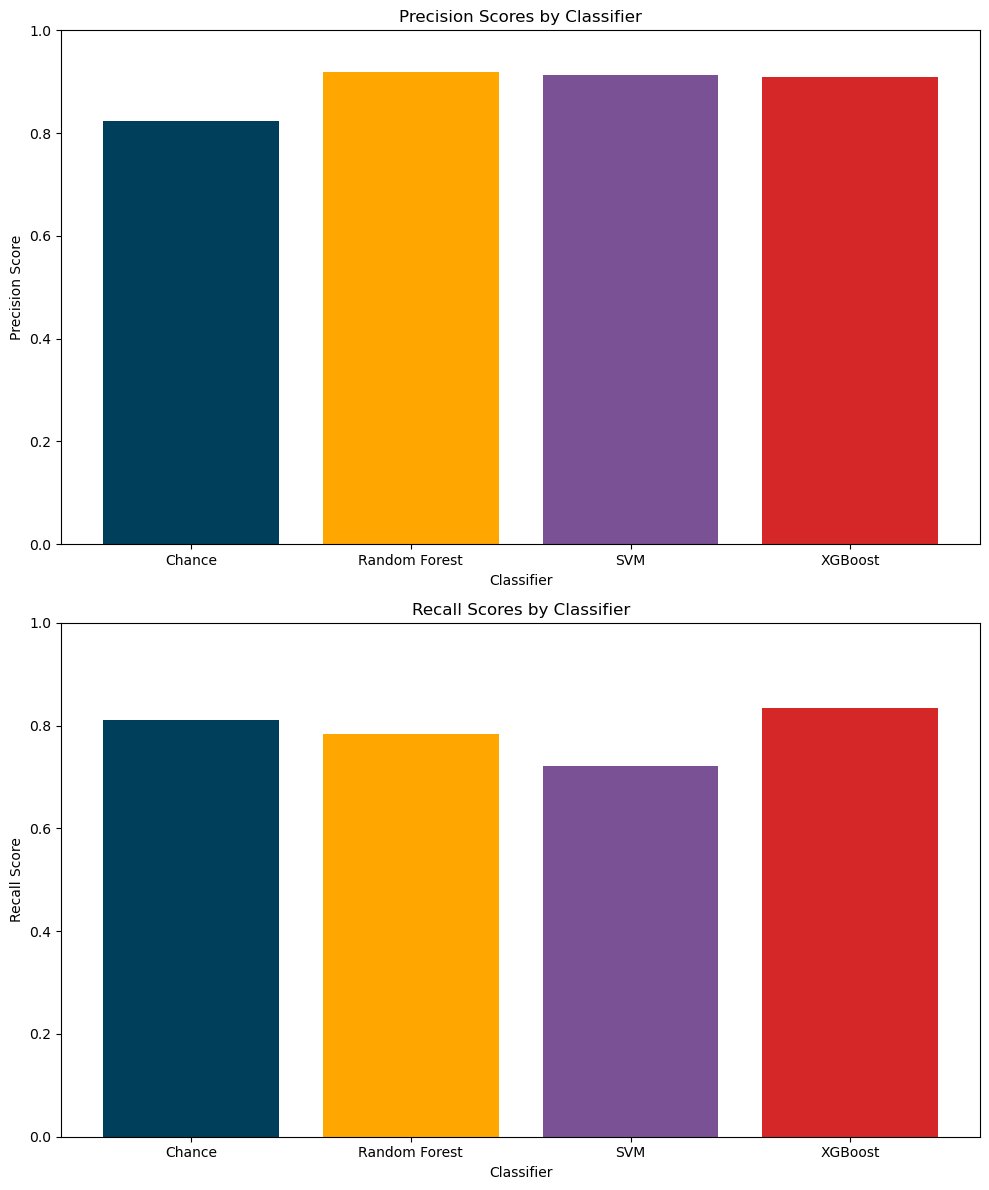

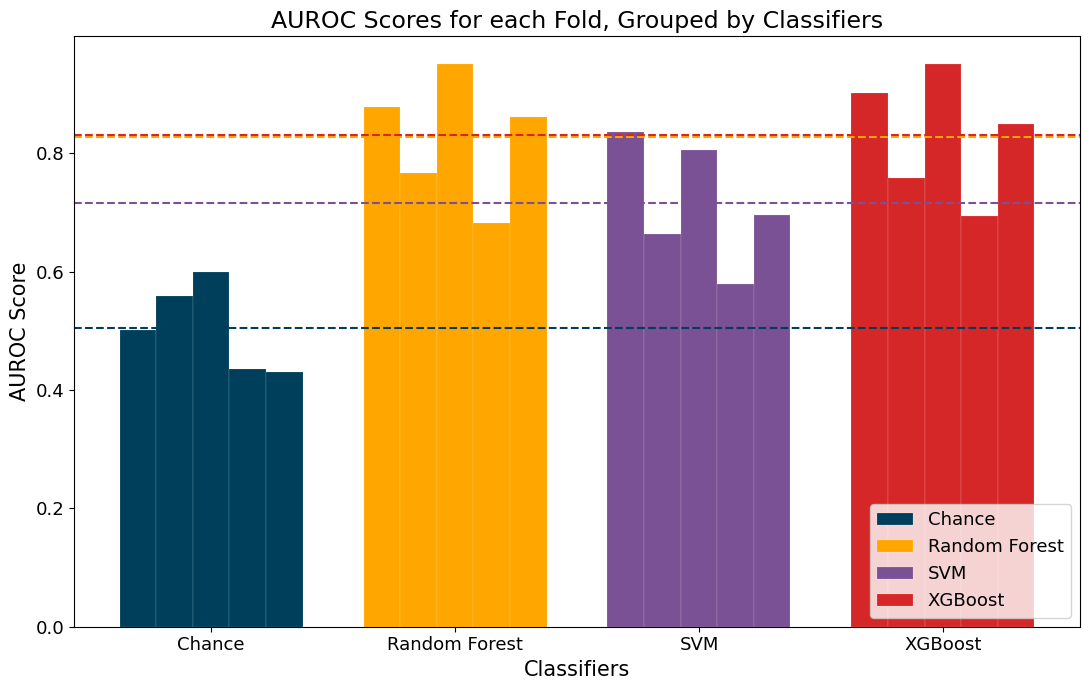

In [40]:
df = df_d5_clean
features = ["sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
            "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
            "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
            "WRB", "RBR"]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d5_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

Chance Results:
Avg Accuracy: 0.72
Avg Weighted F1 Score: 0.72
Avg Precision_1: 0.83
Avg Recall_1: 0.84
Avg AUROC: 0.48
Avg Confusion Matrix:
[[ 0.8  7.2]
 [ 6.8 34.6]]
Avg Prediction Rate: 0.84

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.69
Avg Weighted F1 Score: 0.72
Avg Precision_1: 0.85
Avg Recall_1: 0.78
Avg AUROC: 0.57
Avg Confusion Matrix:
[[ 2.4  5.6]
 [ 8.8 32.6]]
Avg Prediction Rate: 0.76

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

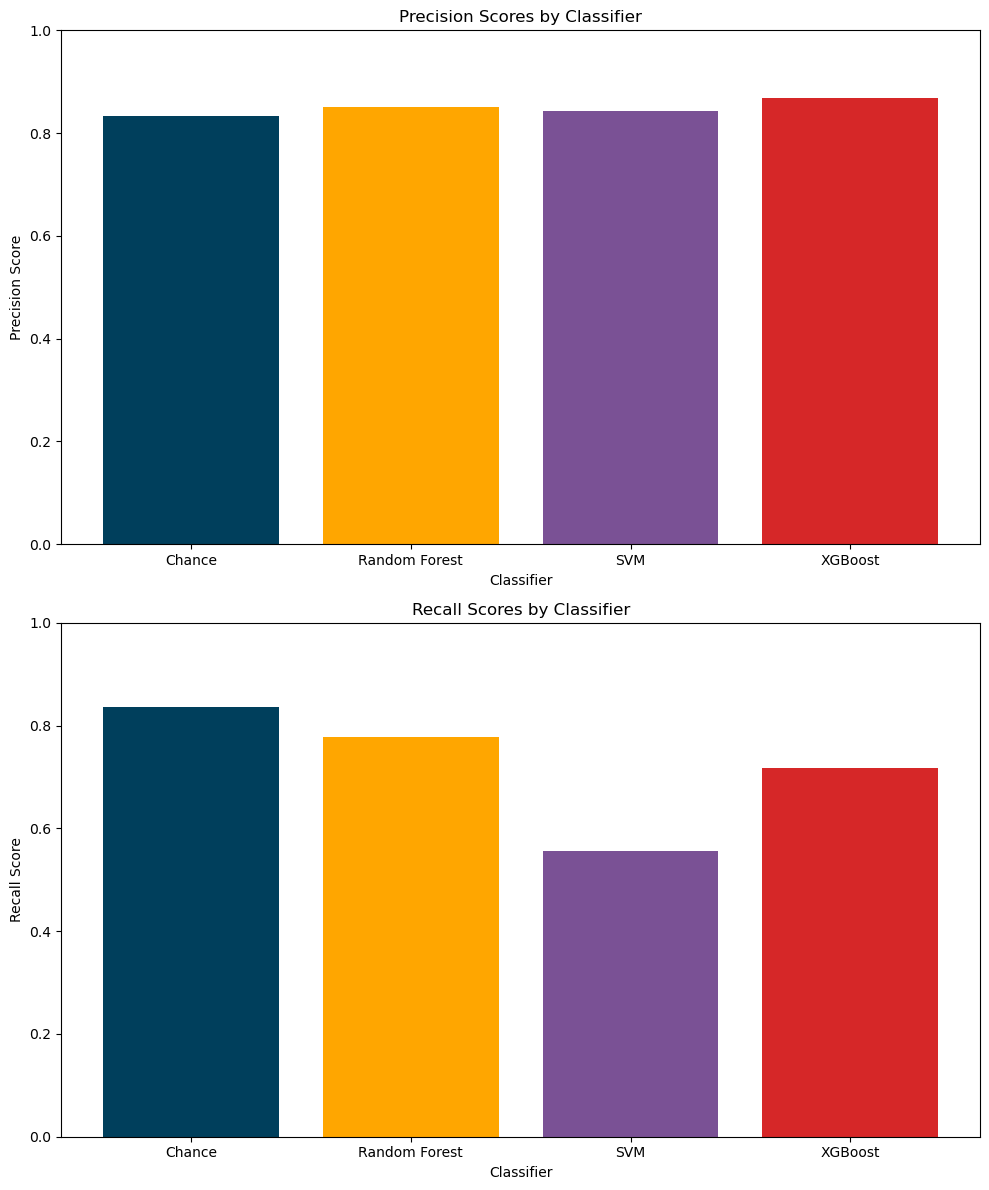

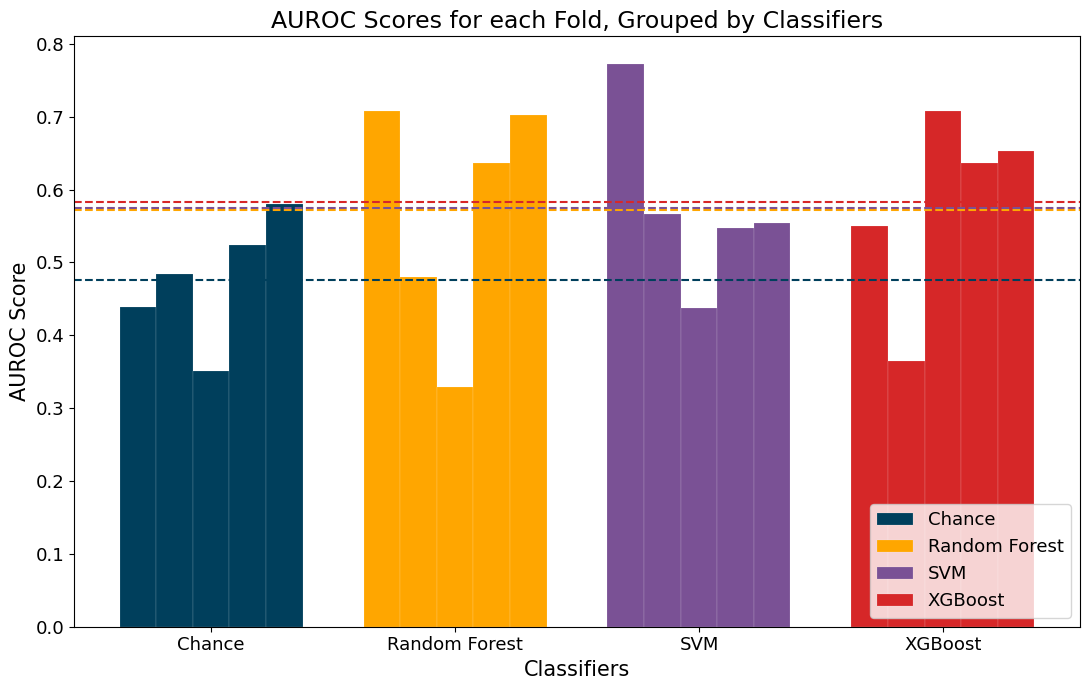

In [41]:
df = df_d5_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d5_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

Chance Results:
Avg Accuracy: 0.75
Avg Weighted F1 Score: 0.75
Avg Precision_1: 0.85
Avg Recall_1: 0.85
Avg AUROC: 0.48
Avg Confusion Matrix:
[[ 1.6  6.4]
 [ 5.8 35.6]]
Avg Prediction Rate: 0.84

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.78
Avg Weighted F1 Score: 0.79
Avg Precision_1: 0.90
Avg Recall_1: 0.83
Avg AUROC: 0.81
Avg Confusion Matrix:
[[ 4.2  3.8]
 [ 7.  34.4]]
Avg Prediction Rate: 0.77

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

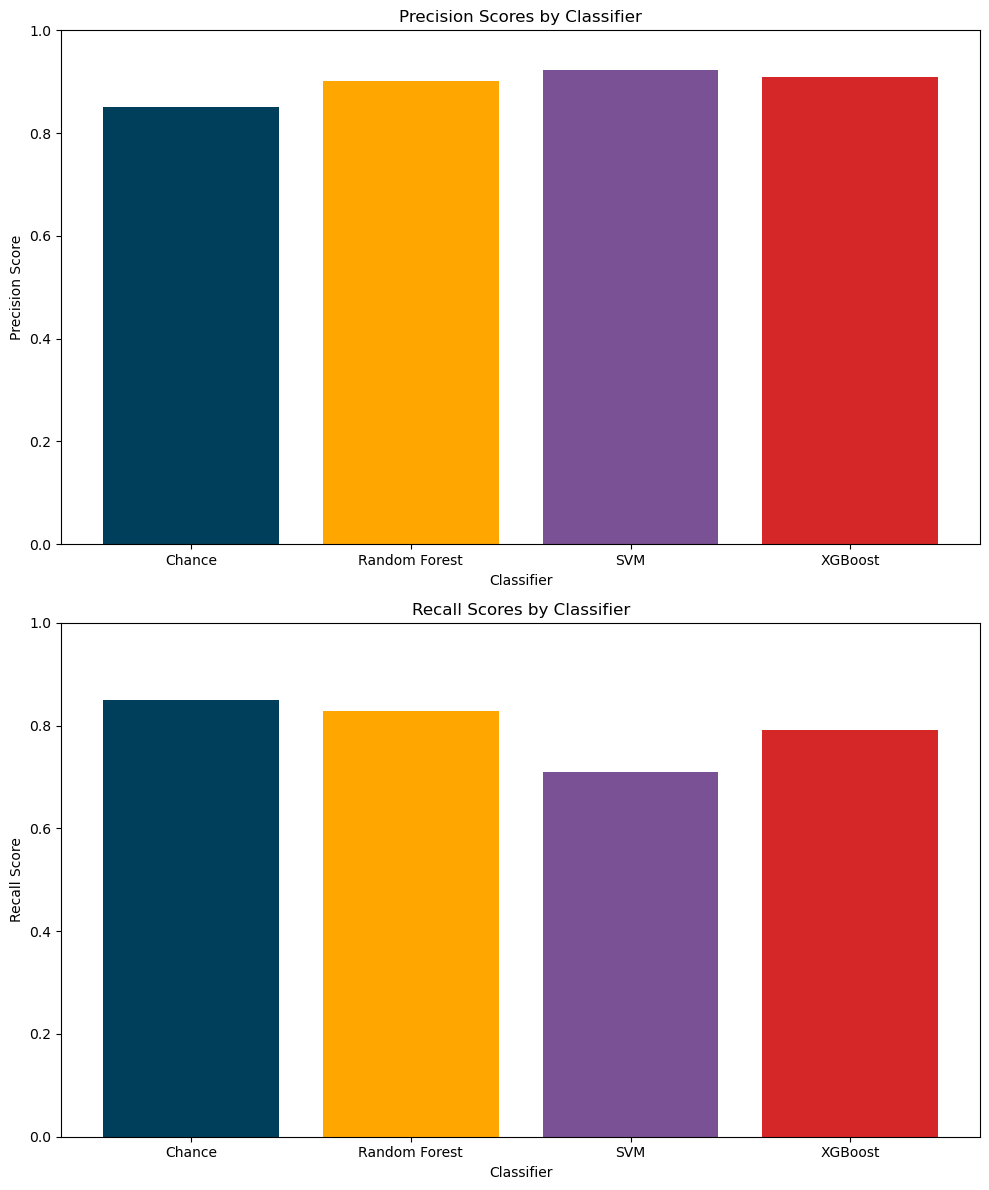

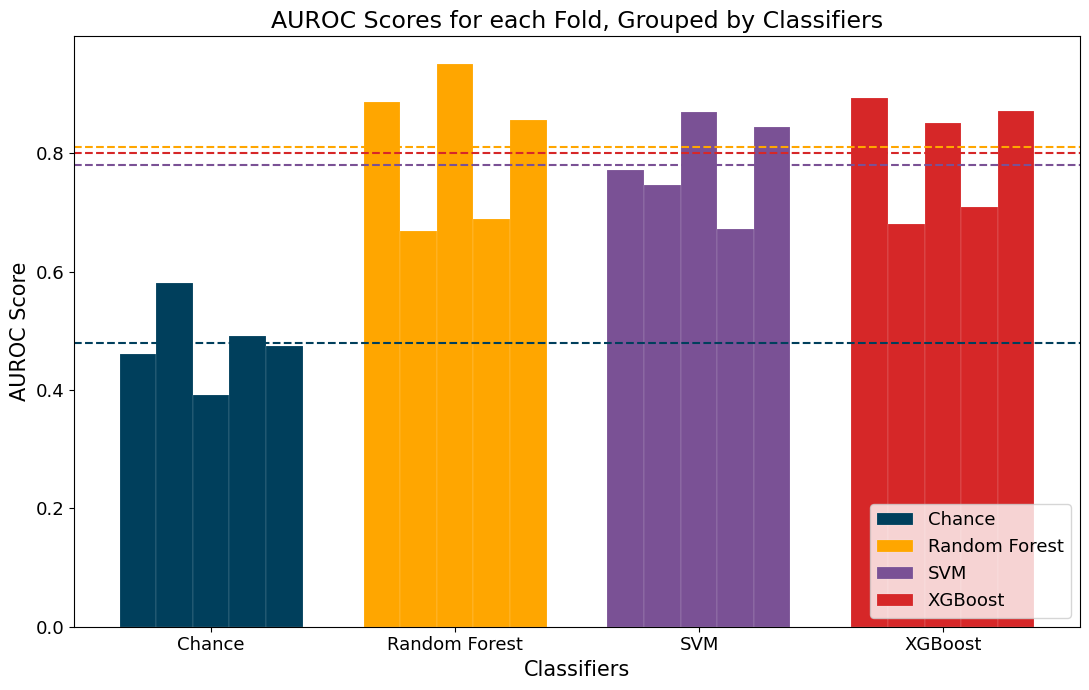

In [42]:
df = df_d5_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d5_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME

Chance Results:
Avg Accuracy: 0.73
Avg Weighted F1 Score: 0.73
Avg Precision_1: 0.84
Avg Recall_1: 0.83
Avg AUROC: 0.47
Avg Confusion Matrix:
[[ 1.4  6.6]
 [ 7.  34.4]]
Avg Prediction Rate: 0.83

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.76
Avg Weighted F1 Score: 0.75
Avg Precision_1: 0.86
Avg Recall_1: 0.87
Avg AUROC: 0.63
Avg Confusion Matrix:
[[ 1.8  6.2]
 [ 5.  36.4]]
Avg Prediction Rate: 0.85

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

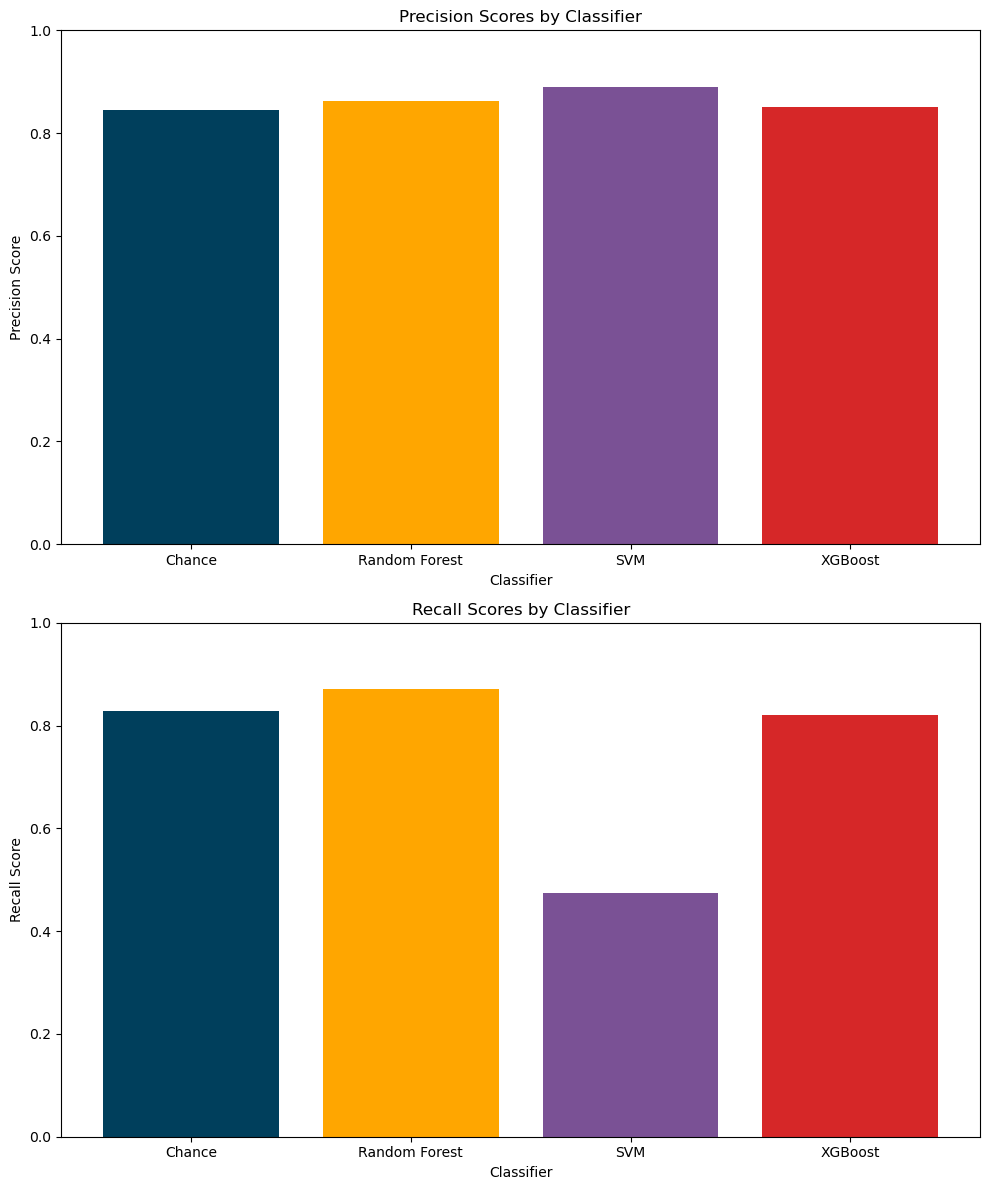

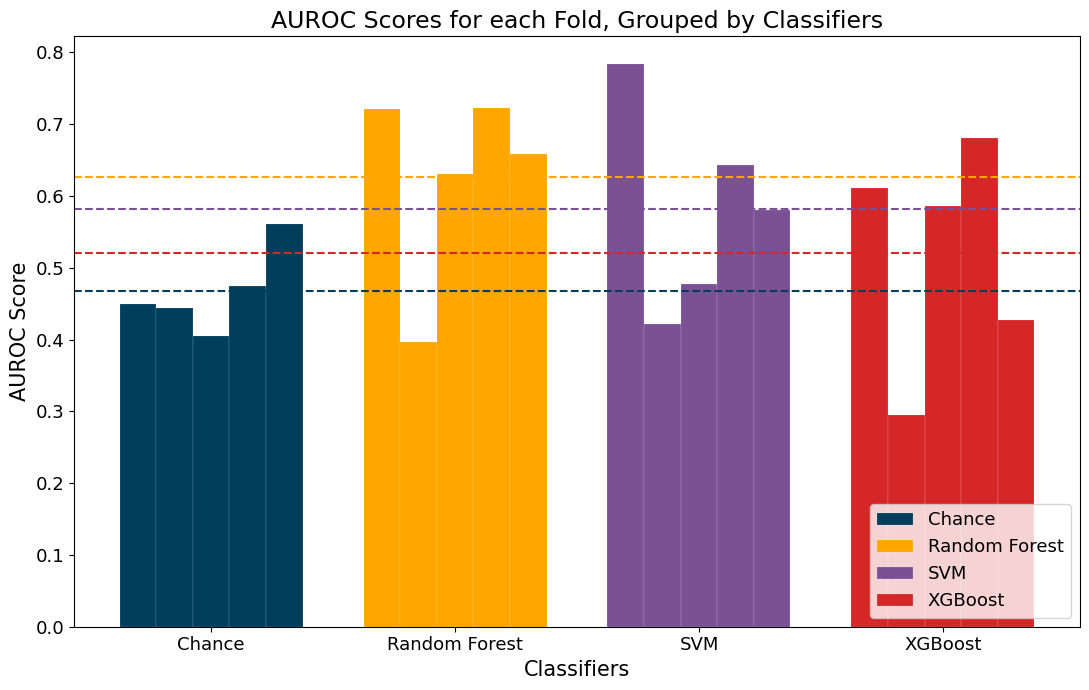

In [43]:
df = df_d5_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d5_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME + NLP

Chance Results:
Avg Accuracy: 0.73
Avg Weighted F1 Score: 0.73
Avg Precision_1: 0.84
Avg Recall_1: 0.85
Avg AUROC: 0.45
Avg Confusion Matrix:
[[ 1.   7. ]
 [ 6.4 35. ]]
Avg Prediction Rate: 0.85

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.75
Avg Weighted F1 Score: 0.76
Avg Precision_1: 0.88
Avg Recall_1: 0.83
Avg AUROC: 0.79
Avg Confusion Matrix:
[[ 2.8  5.2]
 [ 7.  34.4]]
Avg Prediction Rate: 0.80

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

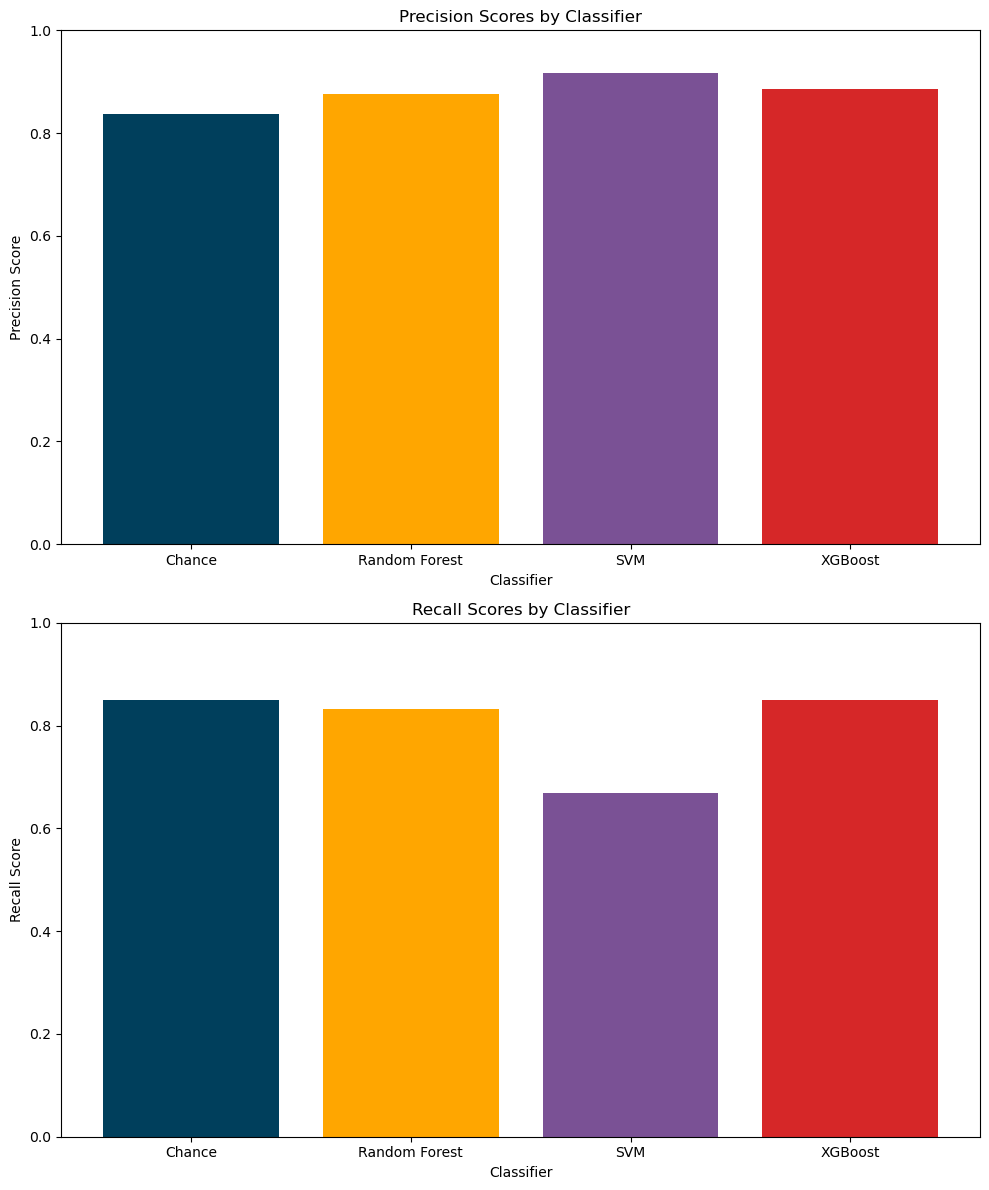

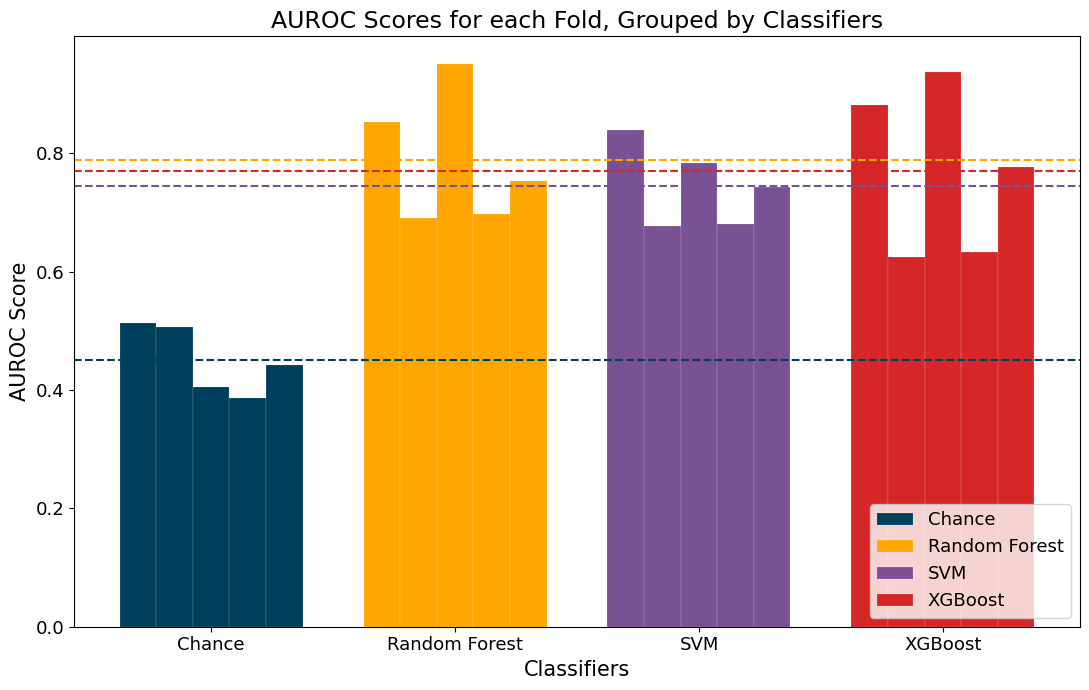

In [44]:
df = df_d5_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d5_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

## Other

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.75
Avg Weighted F1 Score: 0.74
Avg Precision_1: 0.84
Avg Recall_1: 0.87
Avg AUROC: 0.59
Avg Confusion Matrix:
[[ 1.   7. ]
 [ 5.4 36. ]]
Avg Prediction Rate: 0.87

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.75
Avg Weighted F1 Score: 0.78
Avg Precision_1: 0.92
Avg Recall_1: 0.78
Avg AUROC: 0.82
Avg Confusion Matrix:
[[ 5.   3. ]
 [ 8.8 32.6]]
Avg Prediction Rate: 0.72

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

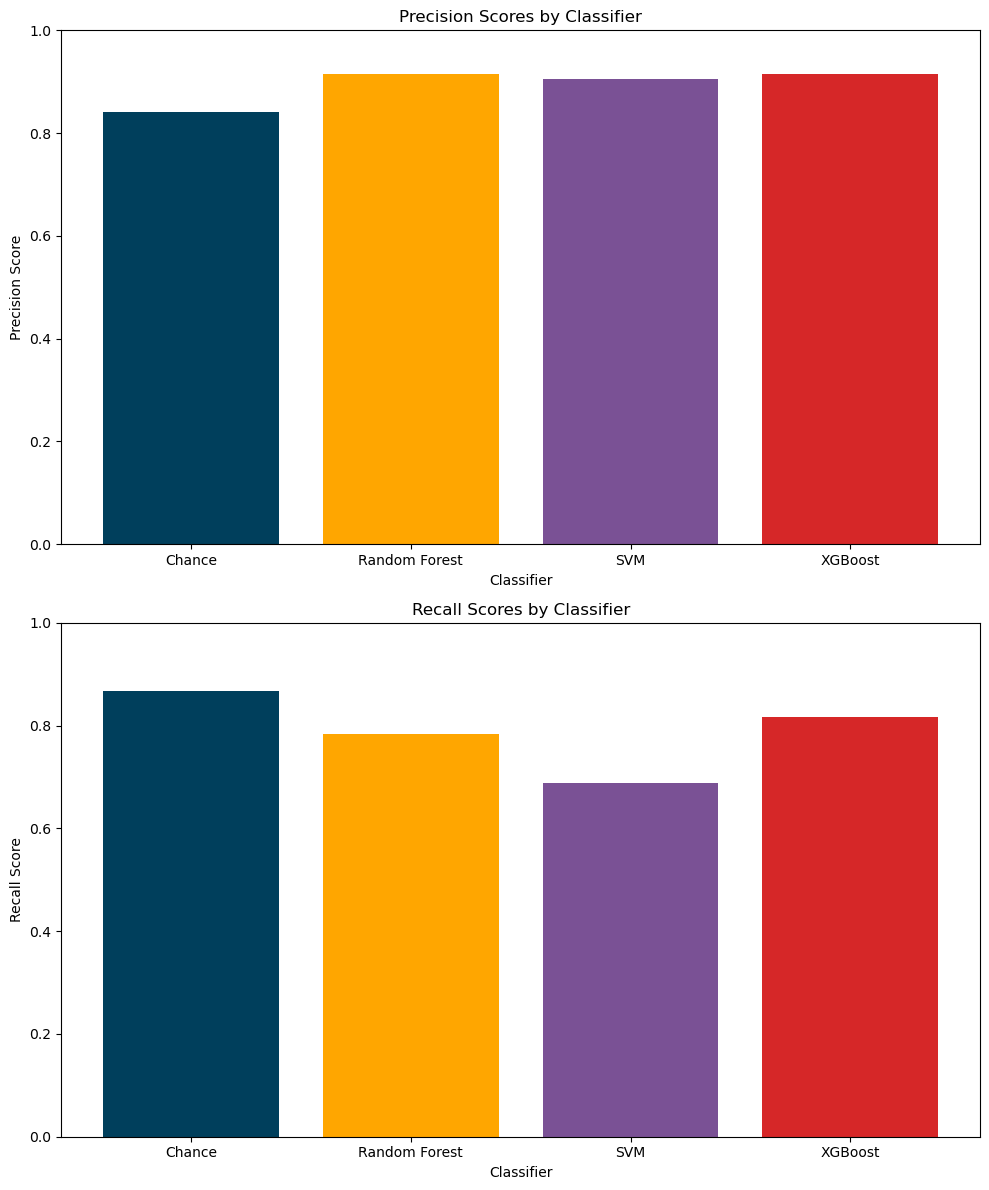

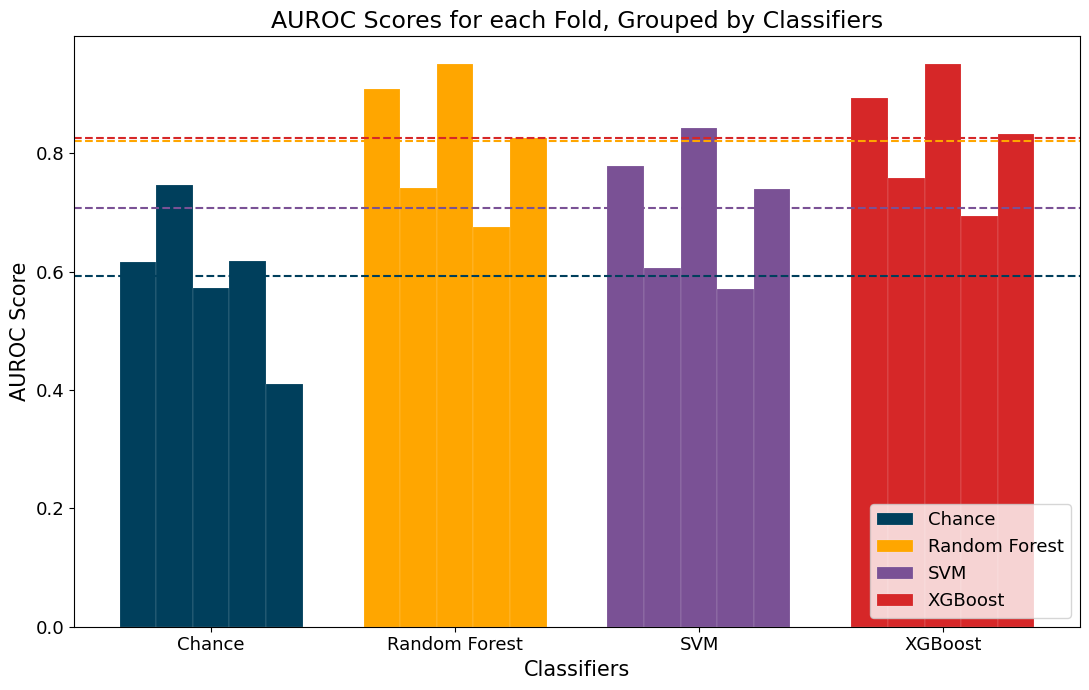

In [13]:
df = df_d6_clean
features = ["sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
            "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
            "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
            "WRB", "RBR"]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d6_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

In [ ]:
df = df_d6_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d6_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

In [ ]:
df = df_d6_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d6_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME

In [ ]:
df = df_d6_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d6_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME + NLP

In [ ]:
df = df_d6_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d6_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

## MODELING "Prefer not to respond" and "I have never been diagnosed with any listed diagnosis"

### NLP FEATURES

Chance Results:
Avg Accuracy: 0.75
Avg Weighted F1 Score: 0.74
Avg Precision_1: 0.84
Avg Recall_1: 0.87
Avg AUROC: 0.59
Avg Confusion Matrix:
[[ 1.   7. ]
 [ 5.4 36. ]]
Avg Prediction Rate: 0.87

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.75
Avg Weighted F1 Score: 0.78
Avg Precision_1: 0.92
Avg Recall_1: 0.78
Avg AUROC: 0.82
Avg Confusion Matrix:
[[ 5.   3. ]
 [ 8.8 32.6]]
Avg Prediction Rate: 0.72

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

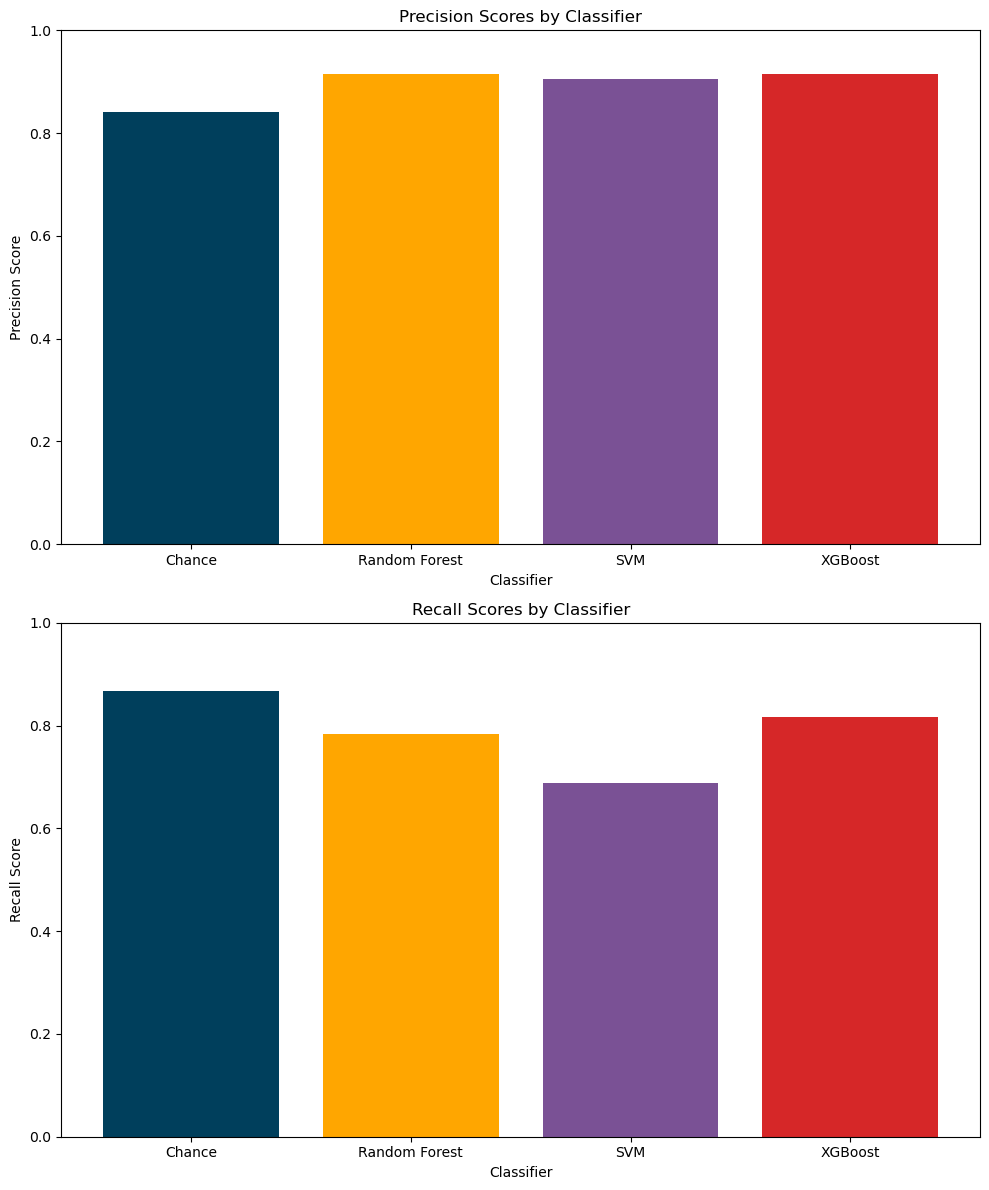

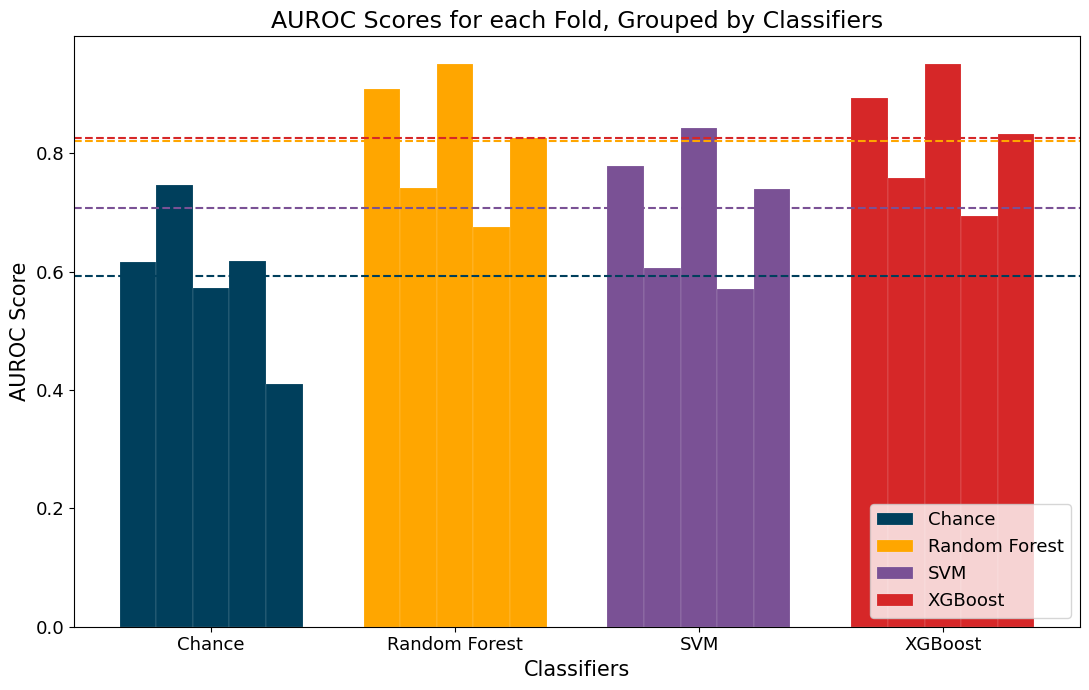

In [13]:
df = df_d7_d8_clean
features = ["sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
            "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
            "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
            "WRB", "RBR"]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d7_d8_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION FEATURES

In [ ]:
df = df_d7_d8_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d7_d8_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + NLP

In [ ]:
df = df_d7_d8_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d7_d8_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME

In [ ]:
df = df_d7_d8_clean
features = [
    "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d7_d8_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

### GAZE + FIXATION + QUESTION RESPONSE TIME + NLP

In [ ]:
df = df_d7_d8_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion", "Question_RT"
]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d7_d8_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)

## SHAP EXPLAINER

In [31]:
import shap
from collections import defaultdict

def train_and_evaluate(df, features, param_grid, classifier_name):
    X = df[features]
    y = df['Correct']
    
#     # Define classifier and parameter grid
#     classifier_name = "XGB"
#     clf = XGBClassifier()
    
#     param_grid_RF = {
#         'criterion': ['entropy', 'gini'],
#         'max_depth': [10, 20],
#         'max_features': ['sqrt', 'log2'],
#         'min_samples_split': [2, 5, 10],
#         'n_estimators': [50, 100, 200],
#     }
    
#     param_grid_XGB = {
#         'colsample_bytree': [0.8, 1.0],
#         'learning_rate': [0.01, 0.1, 0.2],
#         'max_depth': [10, 20],
#         'min_child_weight': [1, 3, 5],
#         'n_estimators': [50, 100, 200],
#         'subsample': [0.8, 1.0],
#     }


    precision_dict = {}
    recall_dict = {}
    auroc_score_barplot = {classifier_name: []}
    
#     # Fit PCA to determine the number of components that explain 95% of the variance
#     pca = PCA().fit(X)
#     cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
#     n_components = np.argmax(cumulative_variance >= 0.95) + 1

    # Define the number of folds for cross-validation
    n_splits = 5
    gkf = GroupKFold(n_splits=n_splits)

    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    conf_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=df['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#         # Apply PCA on the training data
#         pca = PCA(n_components=n_components)
#         X_train_pca = pca.fit_transform(X_train)
#         X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#         # Apply the transformation to the test data
#         X_test_pca = pca.transform(X_test)
#         X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        grid = GridSearchCV(clf, param_grid_XGB, refit=True, verbose=3, scoring='roc_auc', n_jobs=-1)
        grid.fit(X_train_resampled, y_train_resampled)
        best_clf = grid.best_estimator_
        best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
        y_pred = best_clf.predict(X_test)
        y_pred_proba = best_clf.predict_proba(X_test)[:, 1]
        
        # SHAP Explainer 
        explainer = shap.Explainer(best_clf)
        shap_values = explainer(X_test)
        
#         # Visualize the SHAP values for the first prediction (USE FOR RANDOM FOREST)
#         shap.plots.waterfall(shap_values[0][:,1])
        
#         # Beeswarm plot for all observations
#         shap.plots.beeswarm(shap_values[:, :, 1])
        
#         # Summary plot for all observations
#         shap.summary_plot(shap_values[:, :, 1], X_test)


        # Visualize the SHAP values for the first prediction (USE FOR XGB)
        shap.plots.waterfall(shap_values[0])
        
        # Beeswarm plot for all observations
        shap.plots.beeswarm(shap_values)
        
        # Summary plot for all observations
        shap.summary_plot(shap_values, X_test)

        
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba)
        conf_matrix = confusion_matrix(y_test, y_pred)
        prediction_rate = (conf_matrix[1, 1] + conf_matrix[0, 1]) / (conf_matrix[1, 1] + conf_matrix[1, 0] + conf_matrix[0, 1] + conf_matrix[0, 0])

        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        conf_matrices.append(conf_matrix)
        prediction_rates.append(prediction_rate)

        auroc_score_barplot[classifier_name].append(auroc) 
        
    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_conf_matrix = np.mean(conf_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    print(f"{classifier_name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_conf_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

    precision_dict[classifier_name] = avg_precision
    recall_dict[classifier_name] = avg_recall

    return precision_dict, recall_dict, auroc_score_barplot, {classifier_name: clf}



### DYSLEXIA - NLP - XGB

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


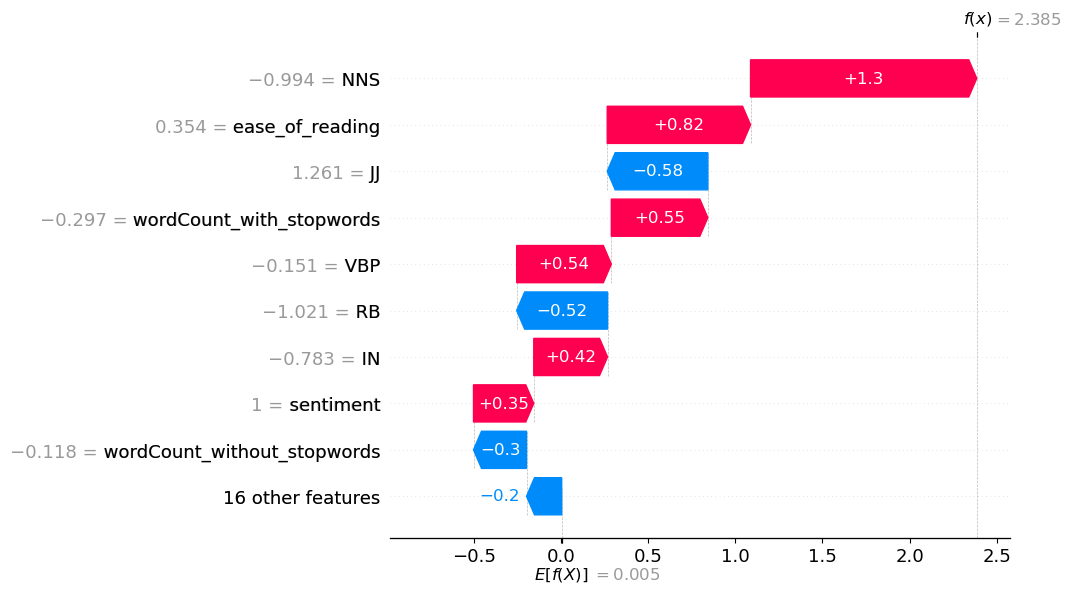

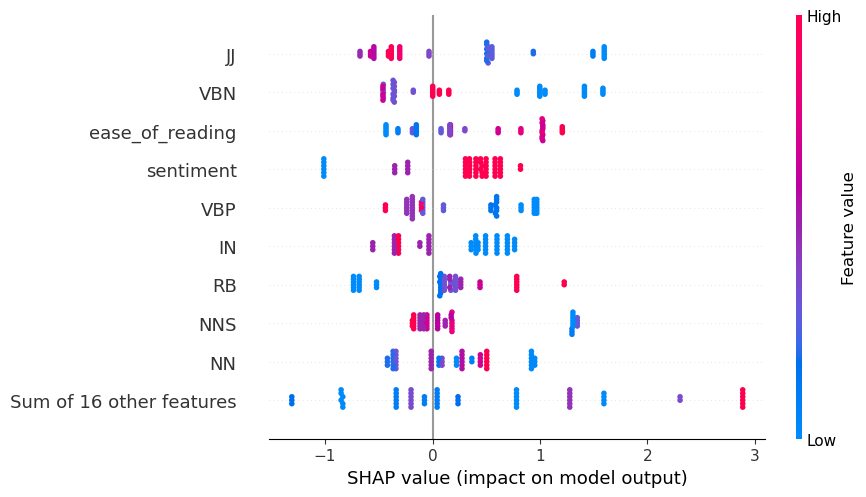

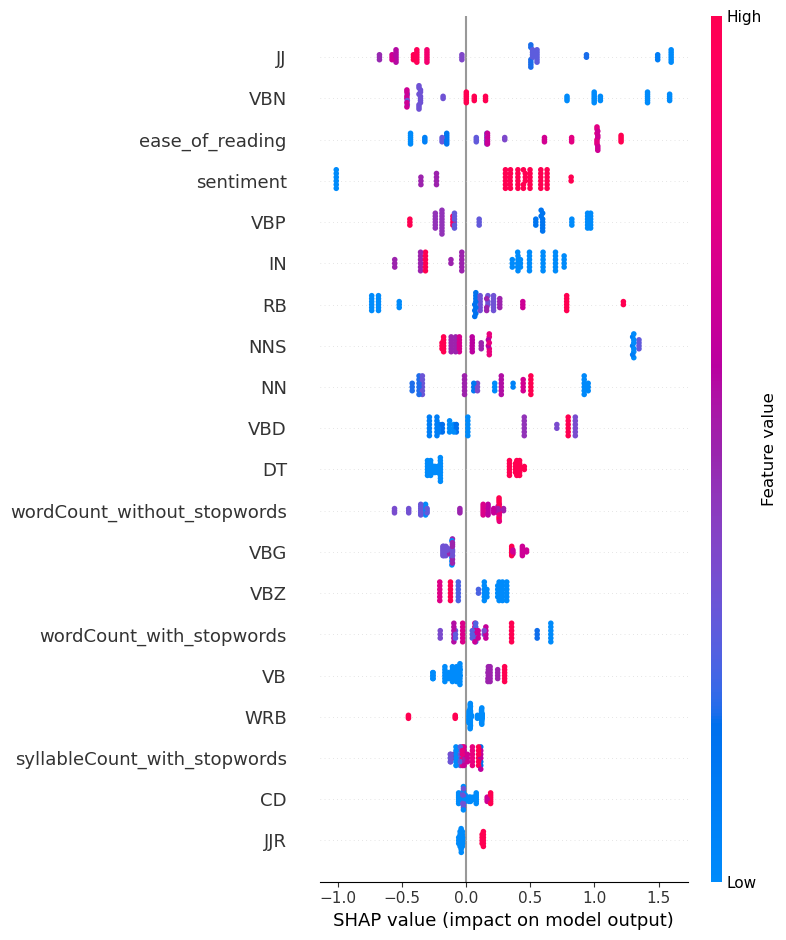

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


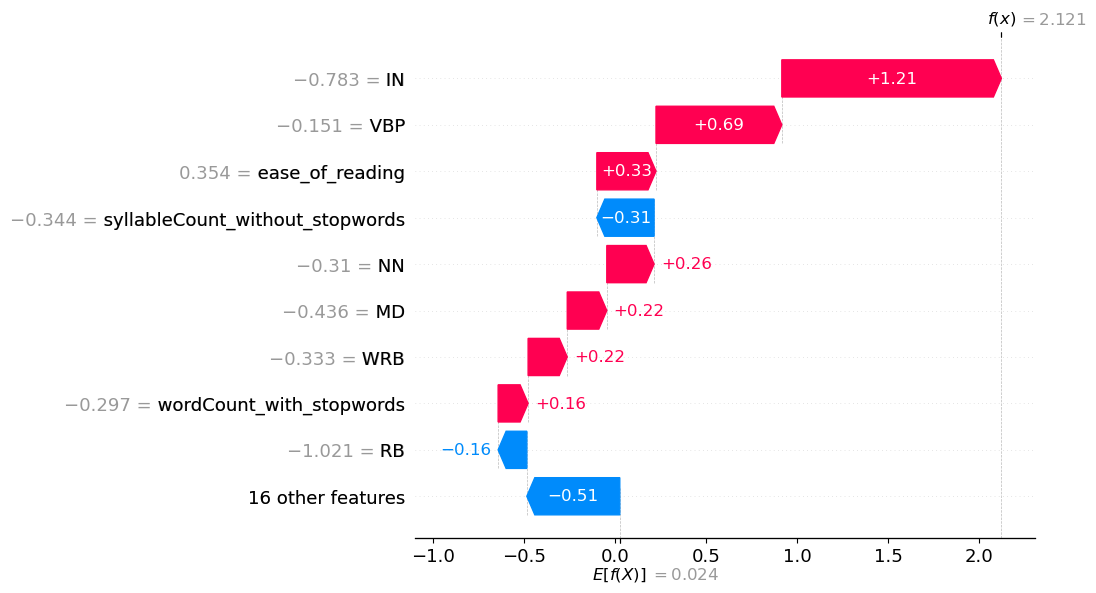

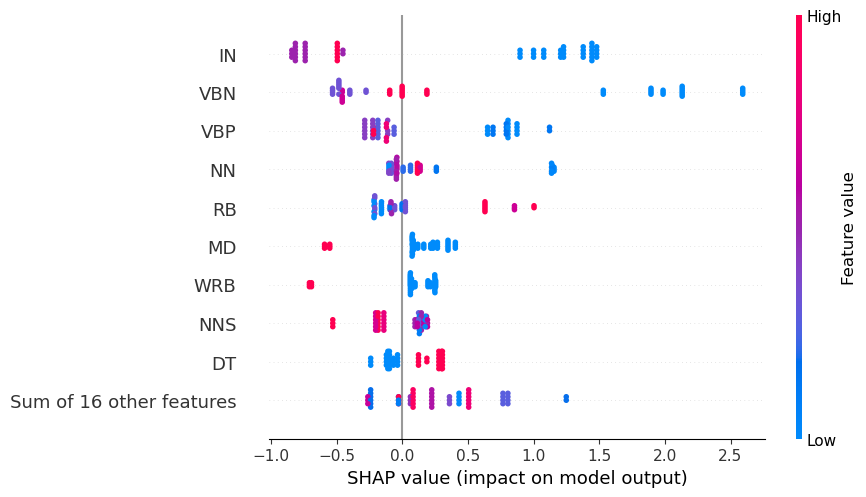

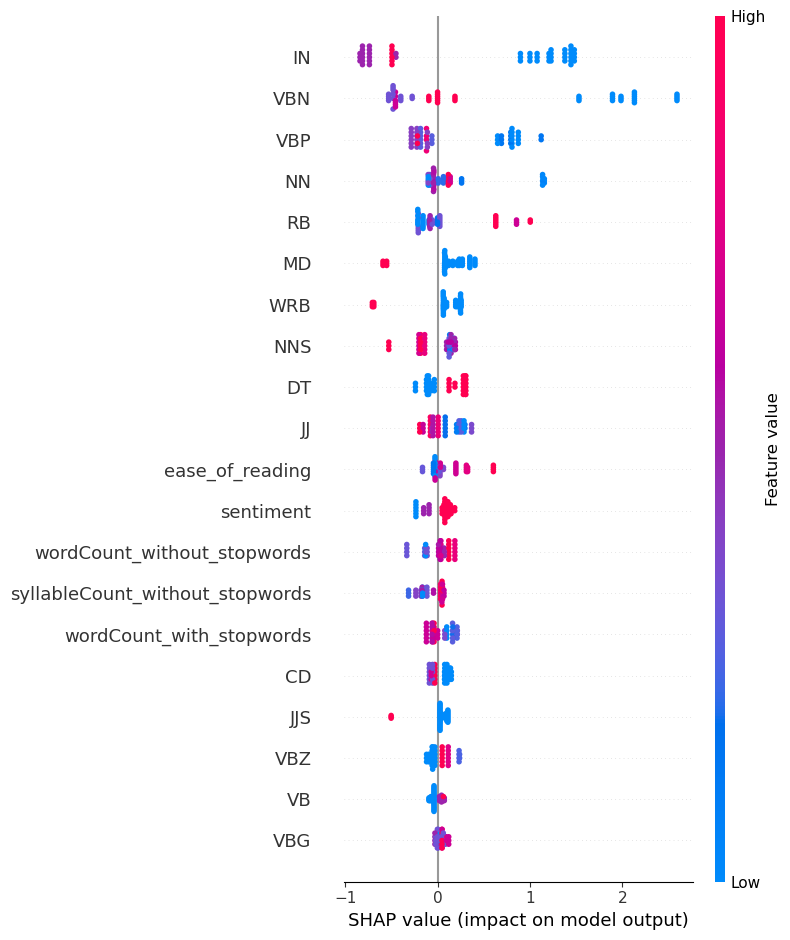

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


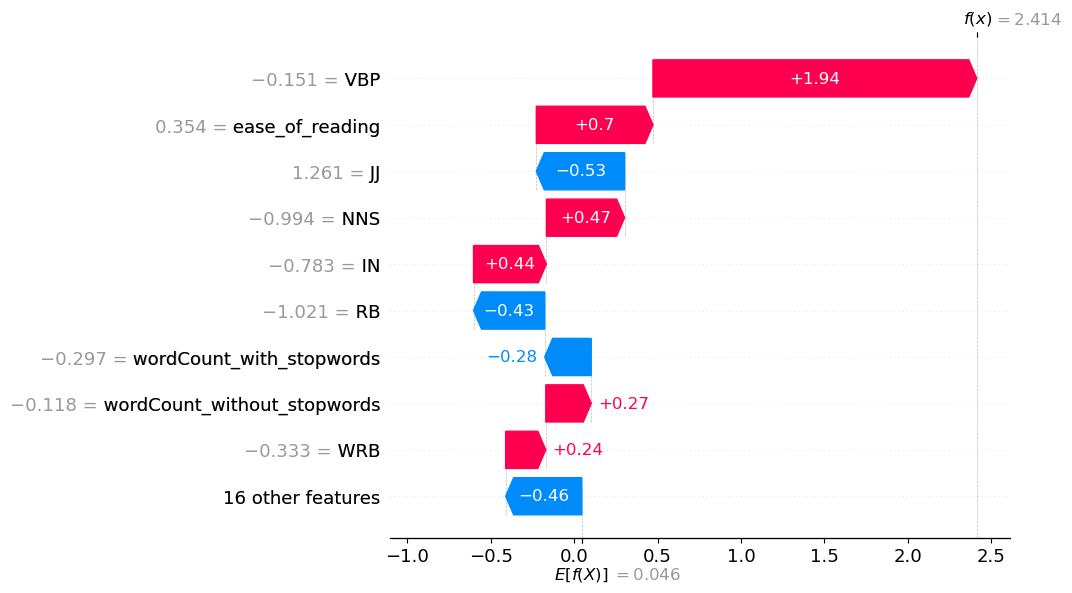

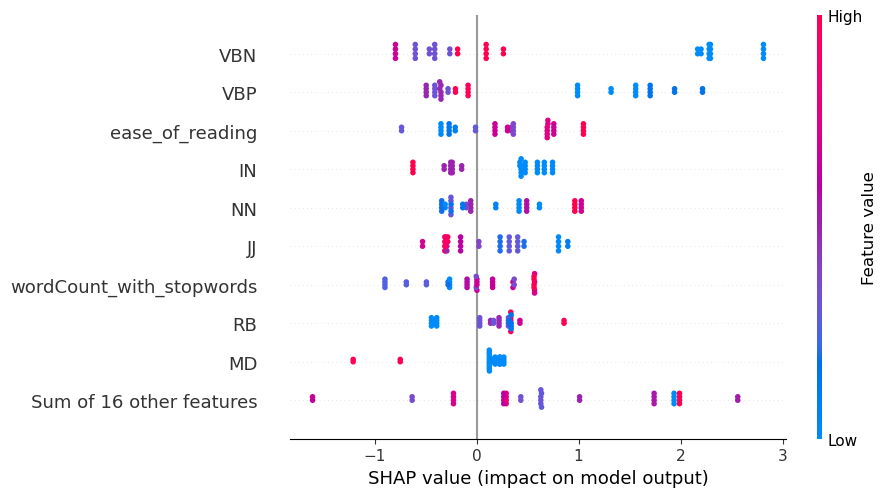

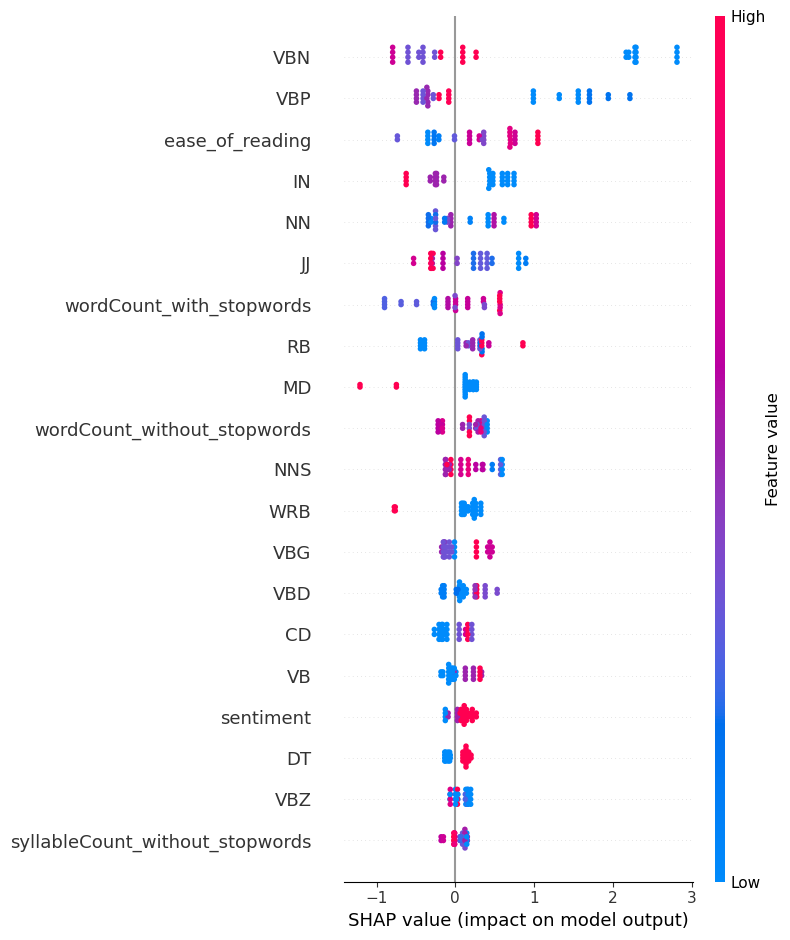

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


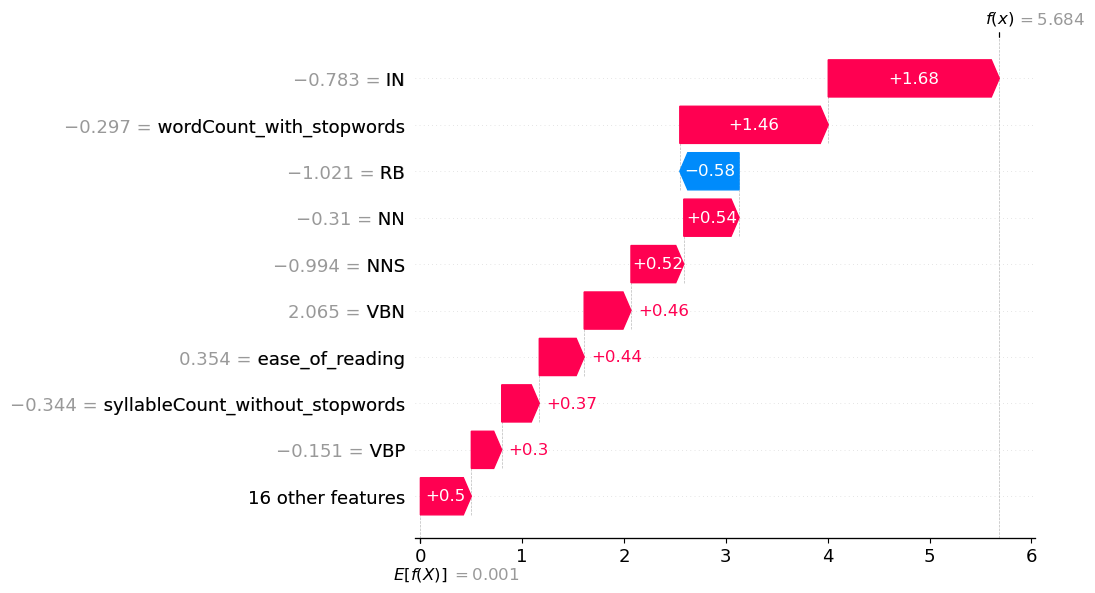

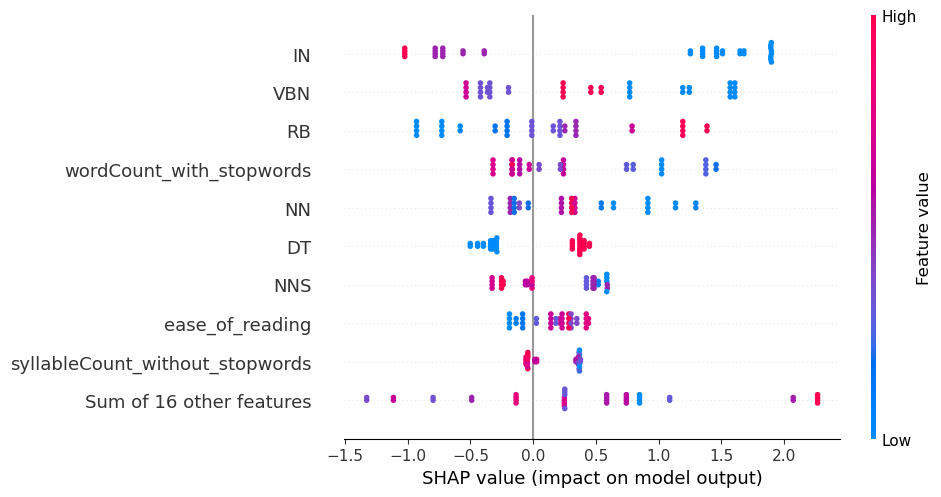

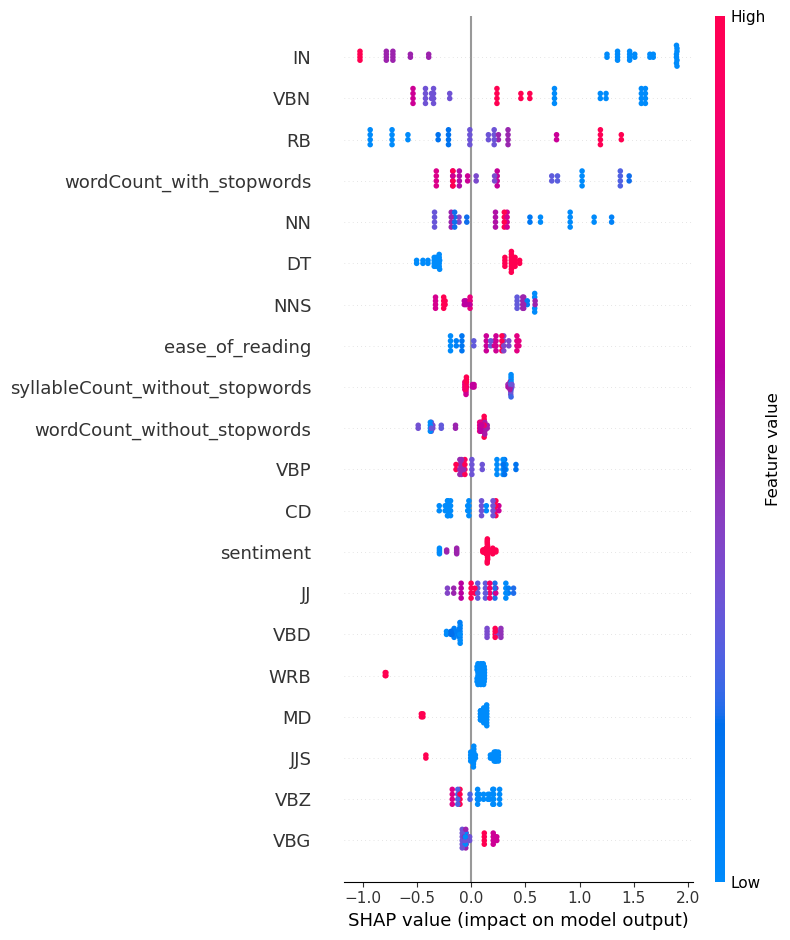

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


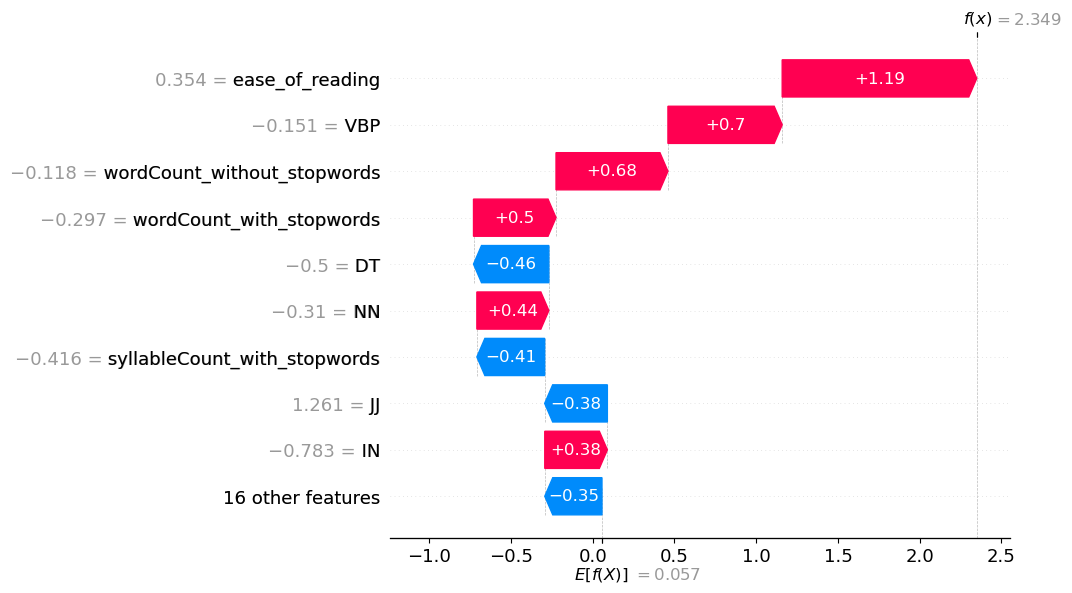

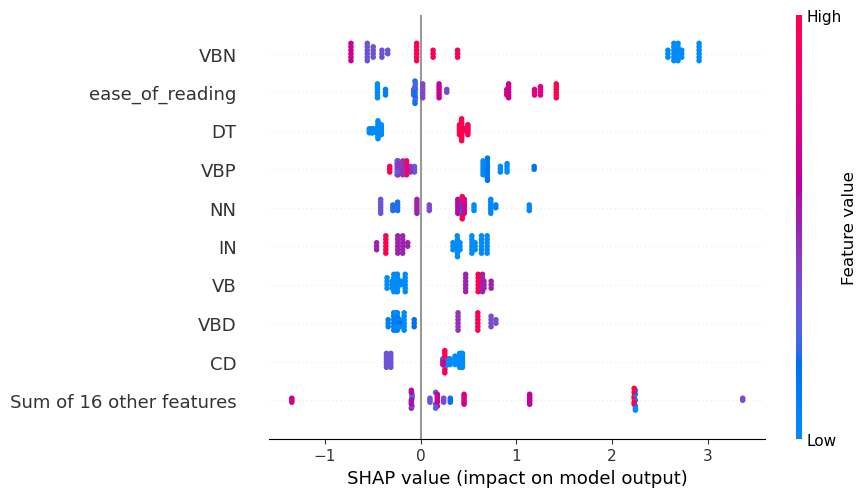

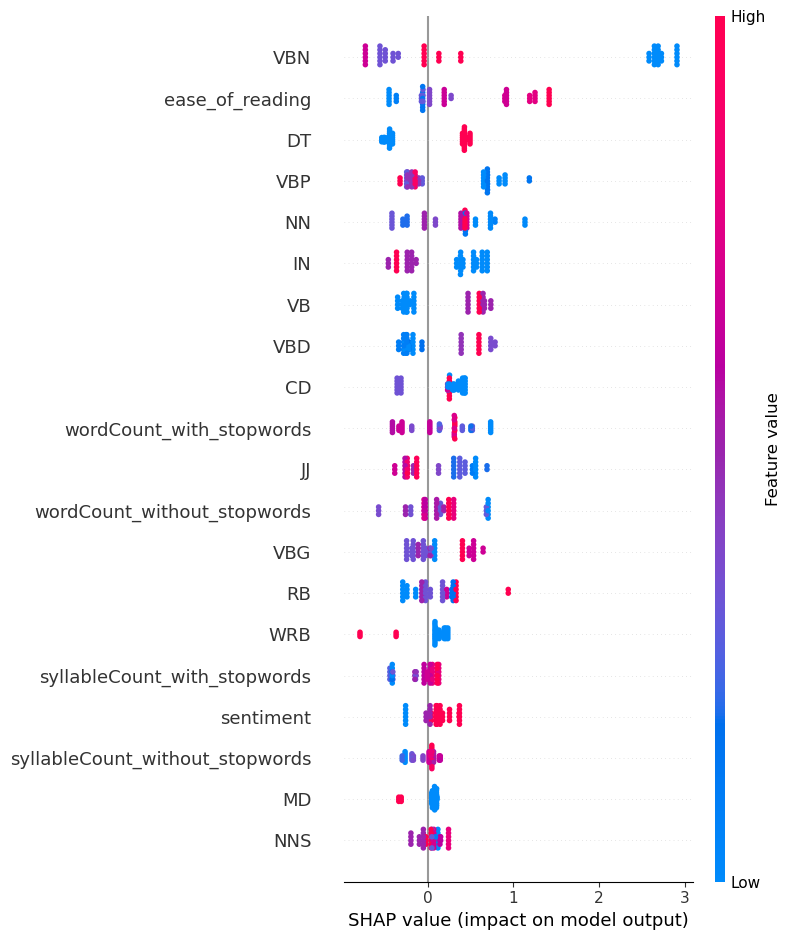

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) Results:
Avg Accuracy: 0.78
Avg Weighted F1 Score: 0.80
Avg Precision_1: 0.91
Avg Recall_1: 0.82
Avg AUROC: 0.83
Avg Confusion Matrix:
[[ 4.6  3.4]
 [ 7.  34.4]]
Avg Prediction Rate: 0.76



In [33]:

# df = df_d3_clean
features = ["sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
            "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
            "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
            "WRB", "RBR"]

clf = XGBClassifier()
param_grid_XGB = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d3_clean, features, param_grid_XGB, clf)


### ADD/ADHD - NLP - XGB

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


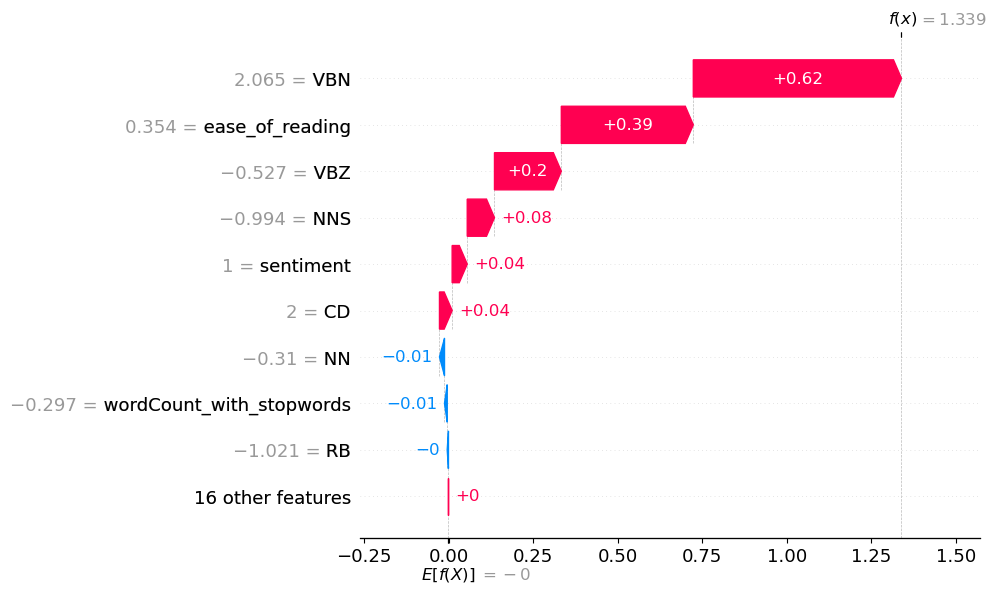

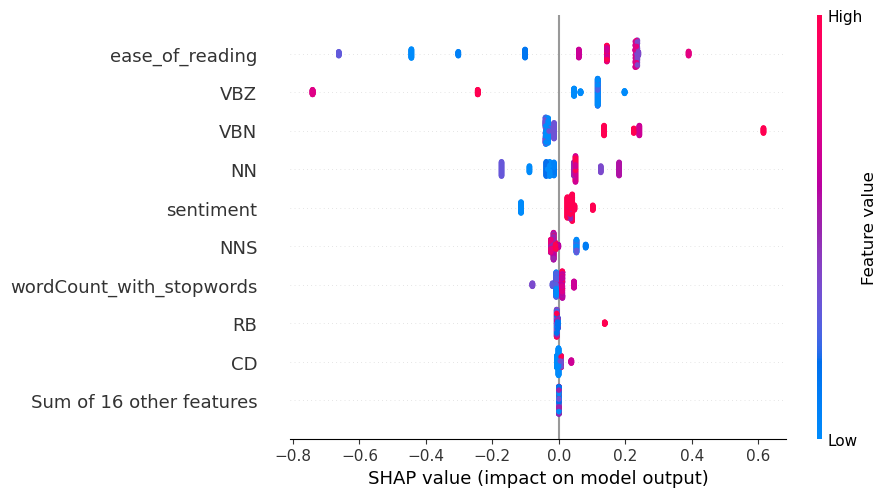

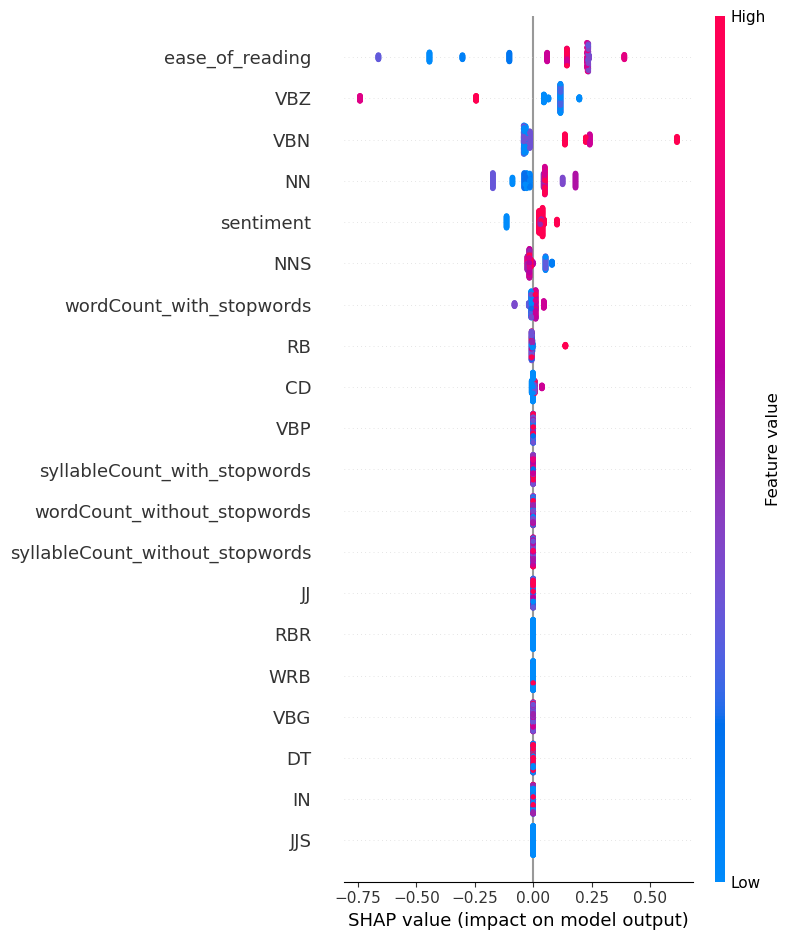

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


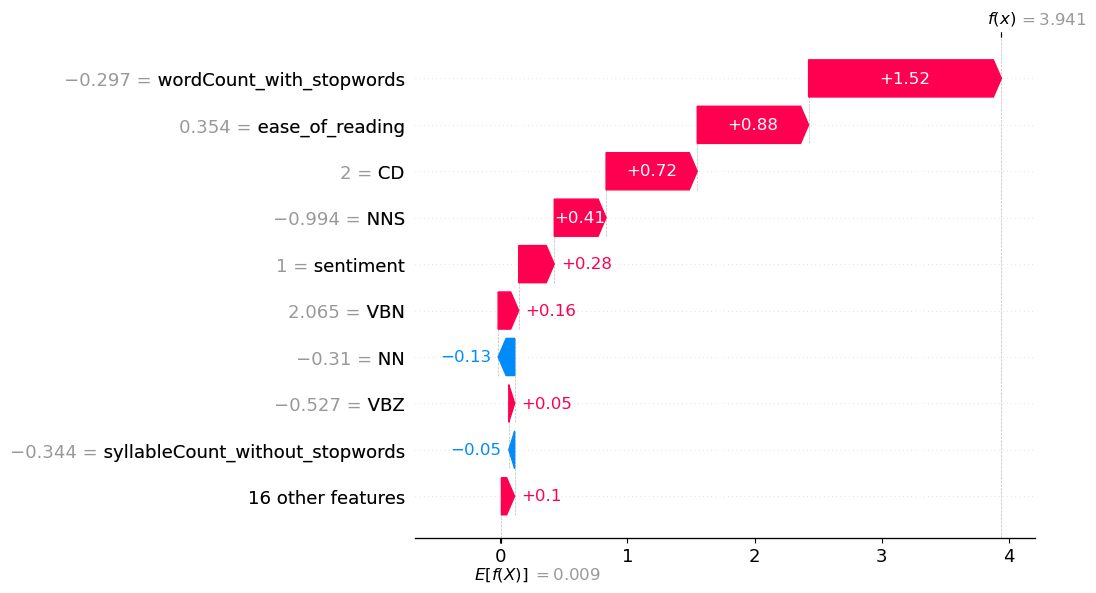

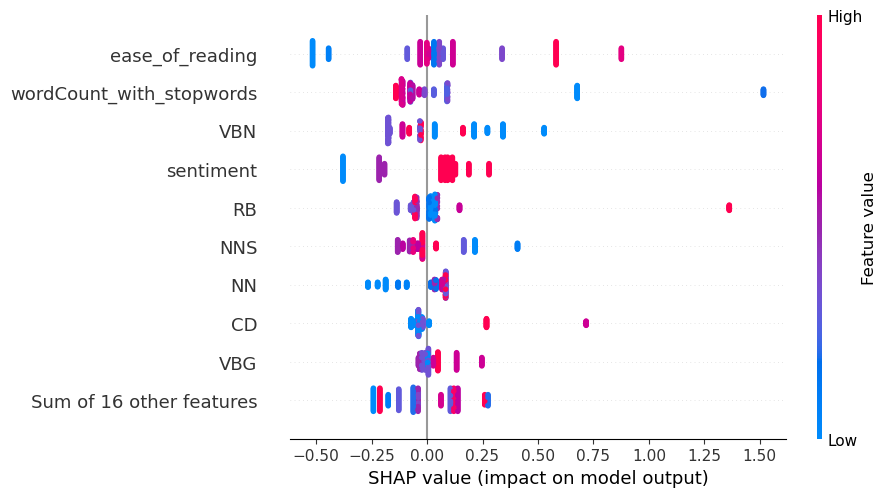

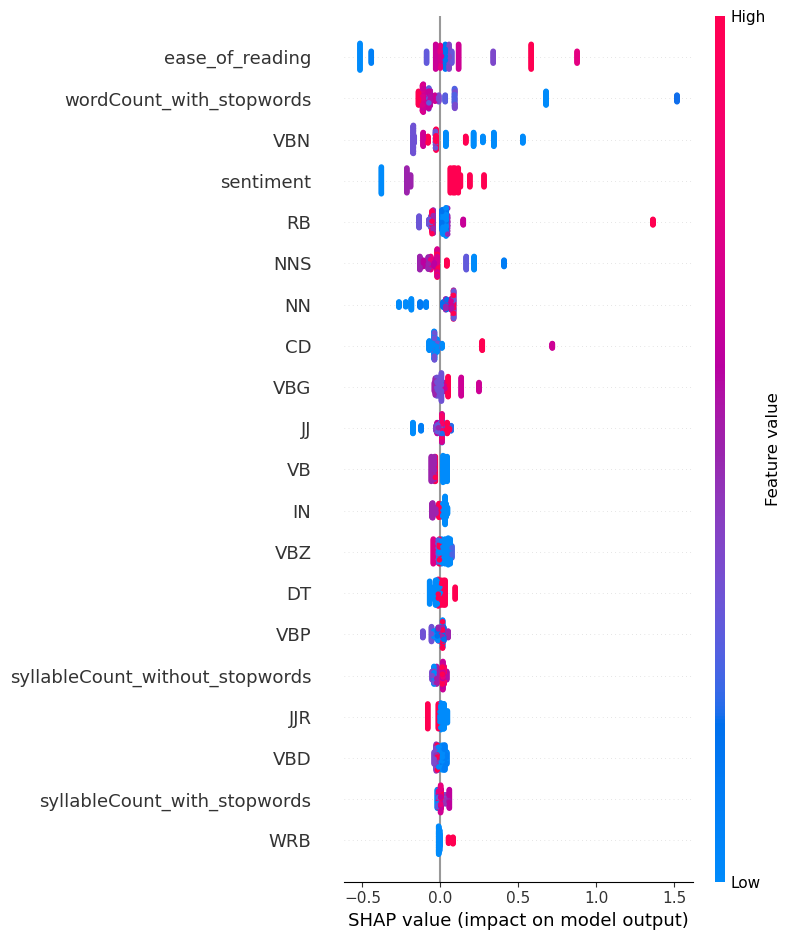

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


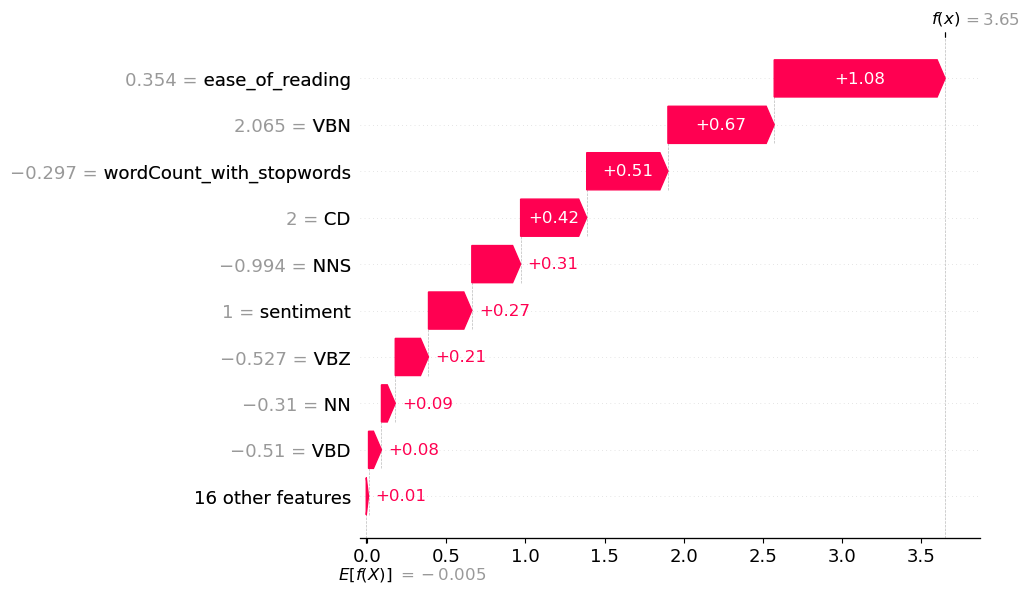

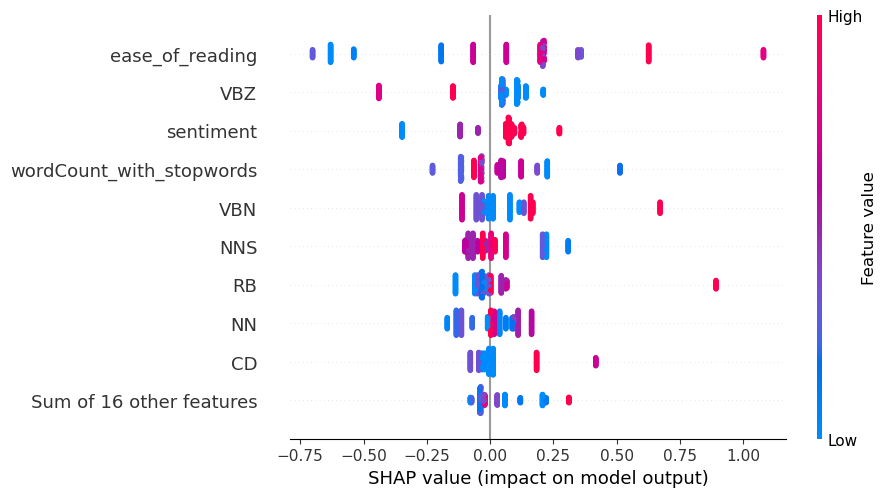

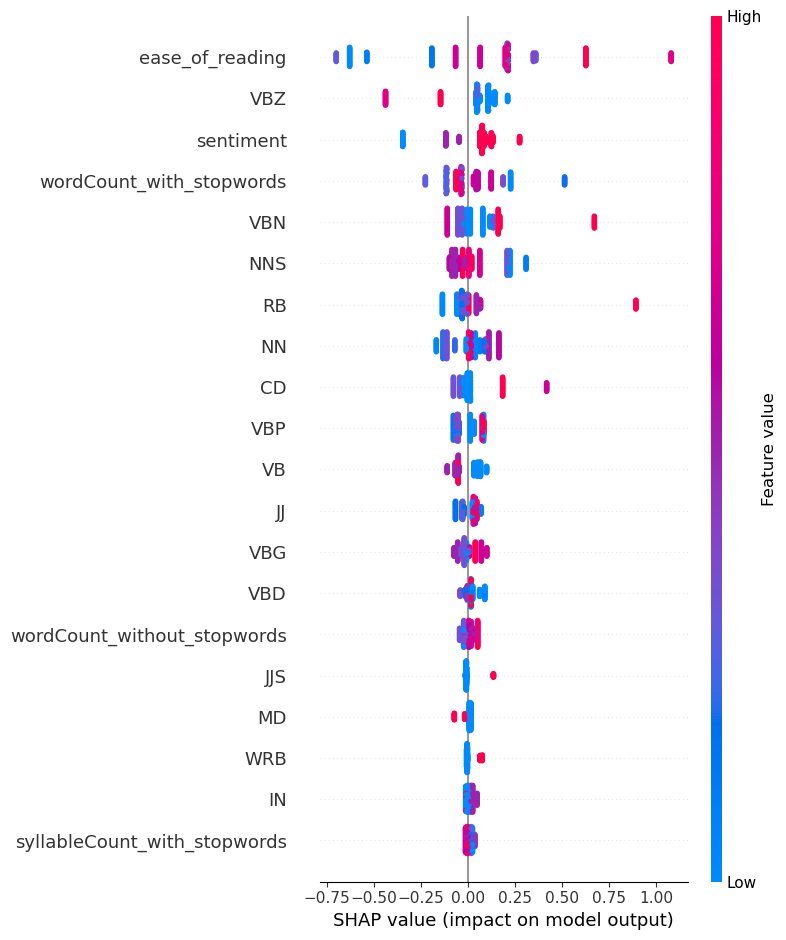

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


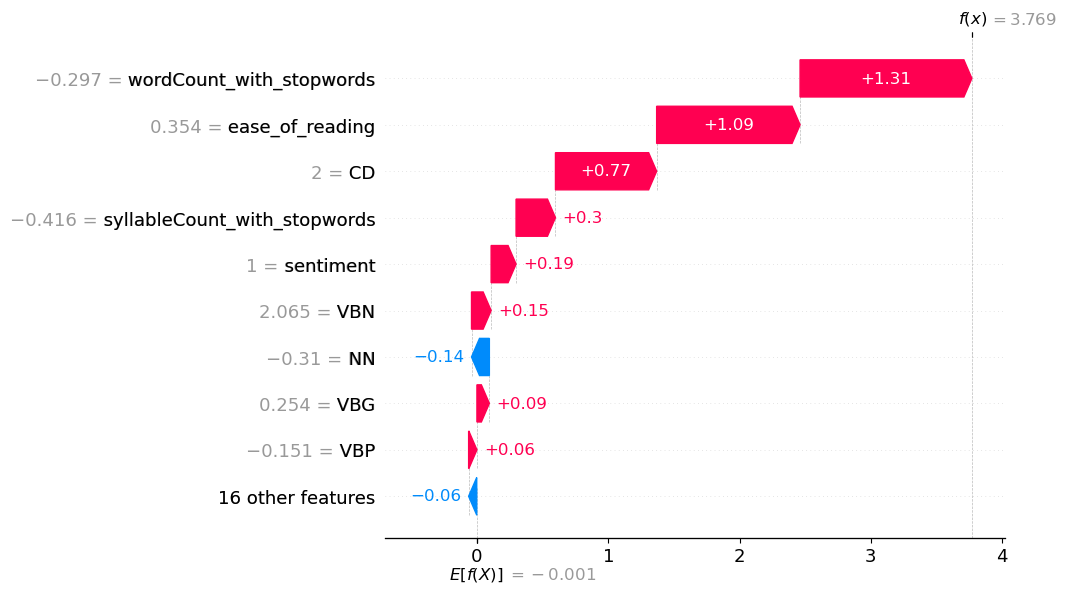

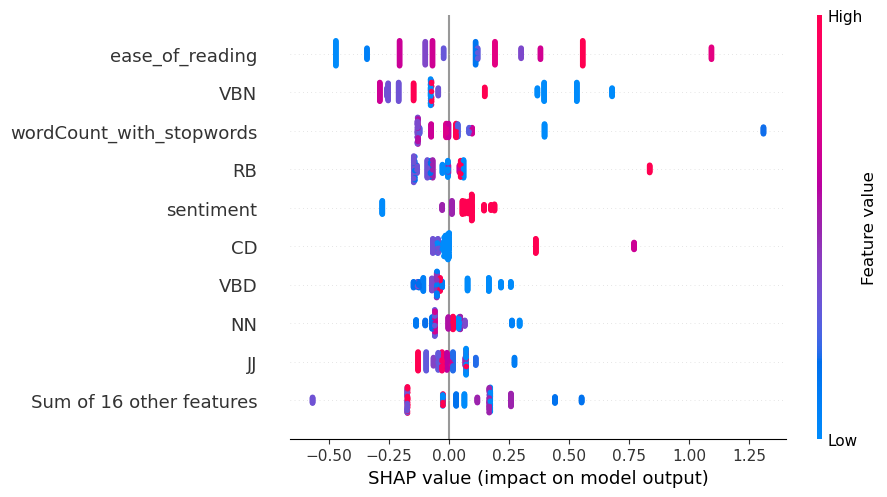

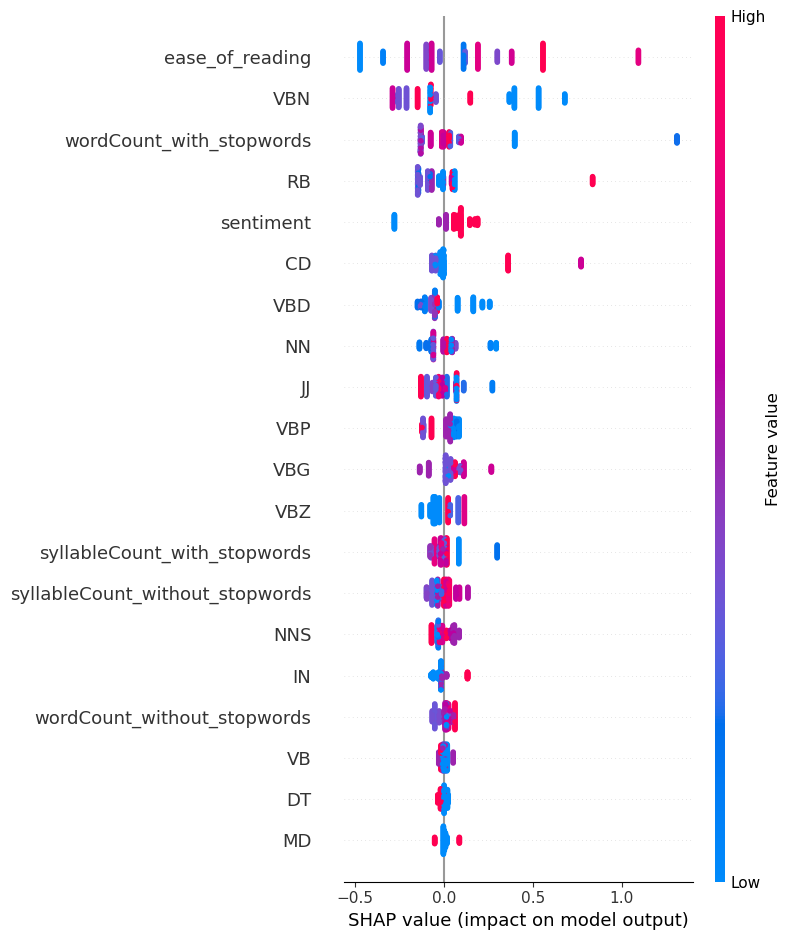

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


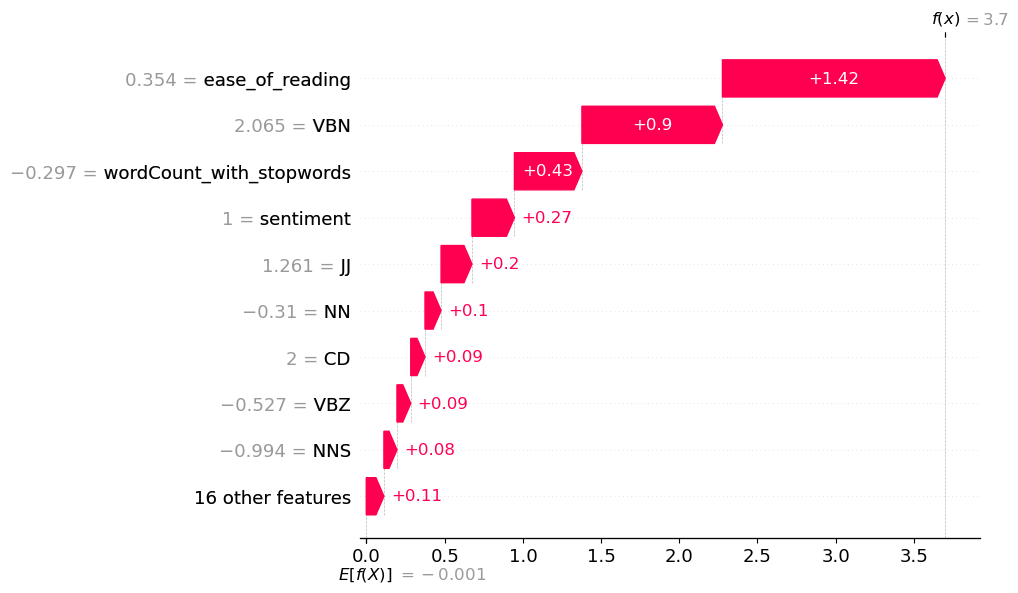

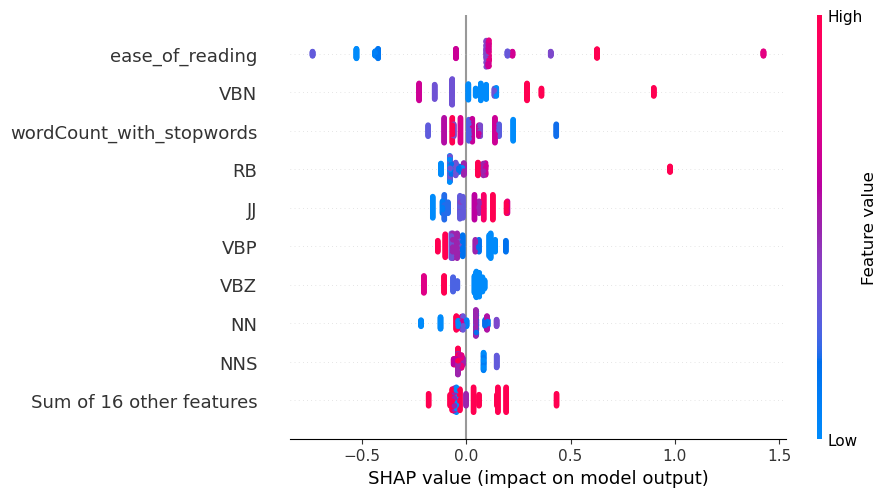

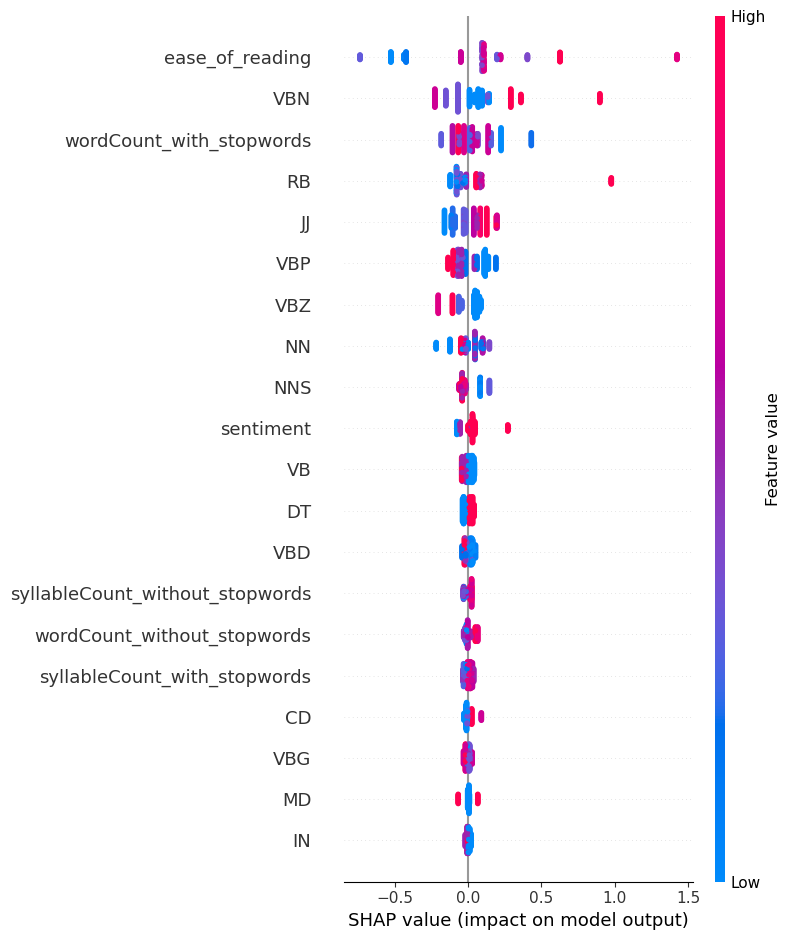

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) Results:
Avg Accuracy: 0.67
Avg Weighted F1 Score: 0.70
Avg Precision_1: 0.88
Avg Recall_1: 0.68
Avg AUROC: 0.71
Avg Confusion Matrix:
[[ 35.6  20.2]
 [ 66.4 143.2]]
Avg Prediction Rate: 0.62



In [34]:

# df = df_d1_clean
features = ["sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
            "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
            "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
            "WRB", "RBR"]

clf = XGBClassifier()
param_grid_XGB = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d1_clean, features, param_grid_XGB, clf)


### OTHER - GAZE+FIX+NLP - RF

Fitting 5 folds for each of 72 candidates, totalling 360 fits


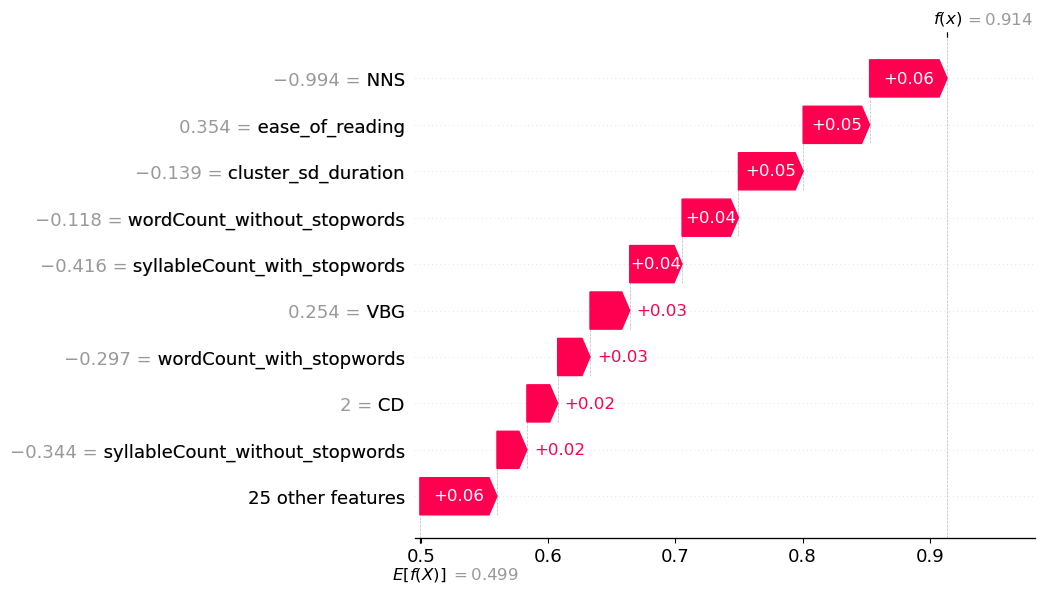

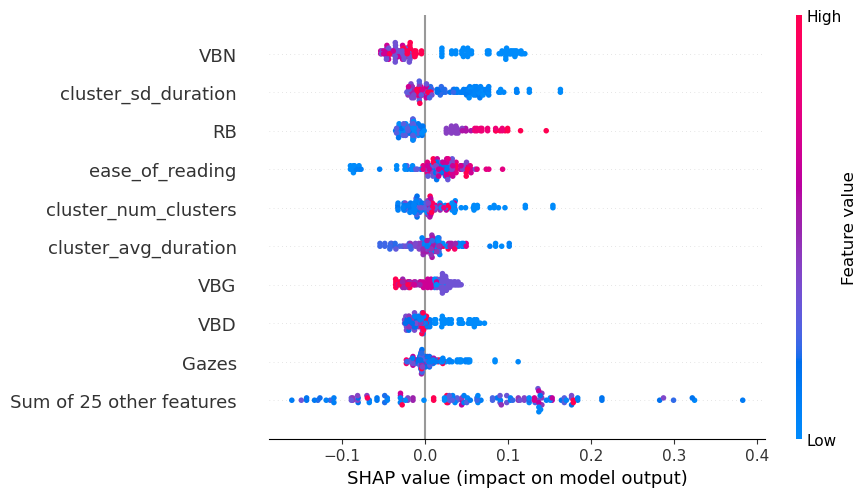

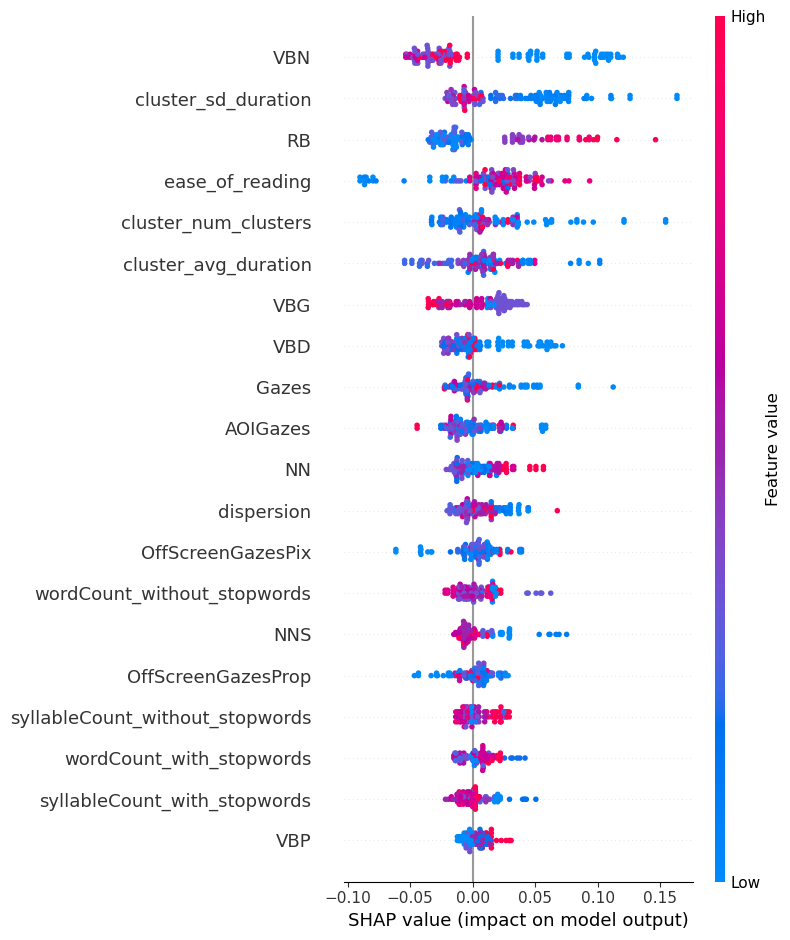

Fitting 5 folds for each of 72 candidates, totalling 360 fits


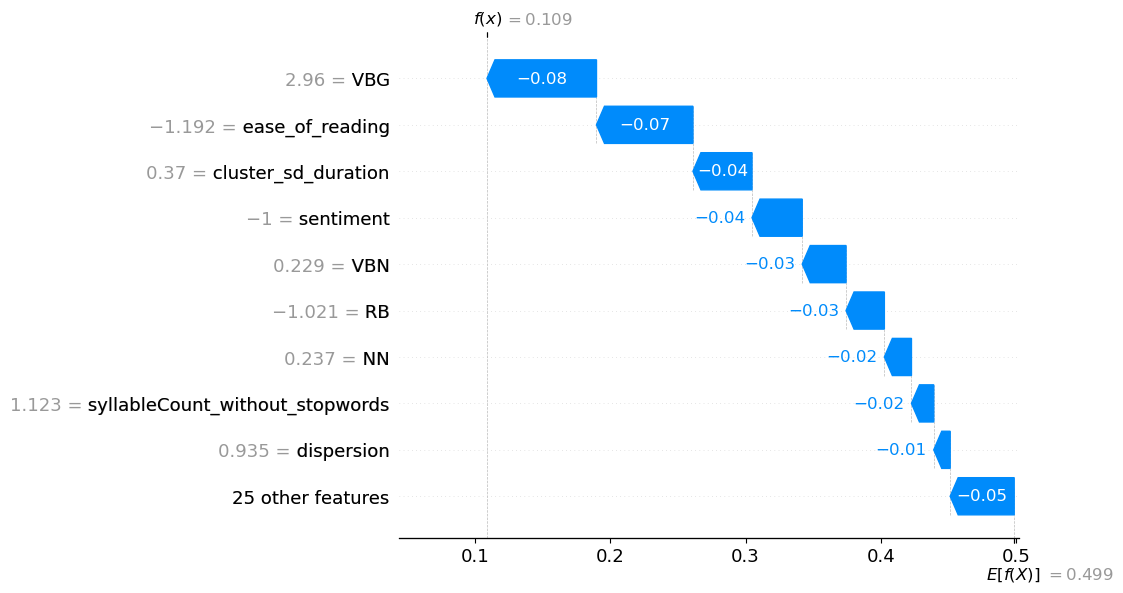

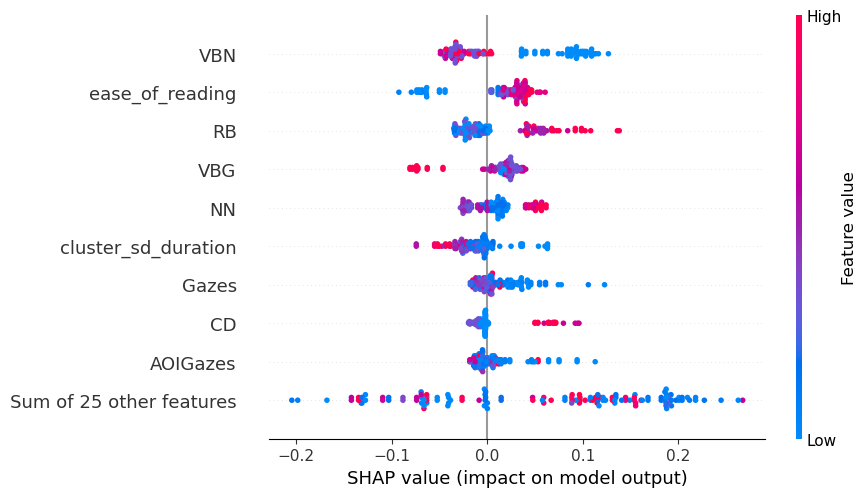

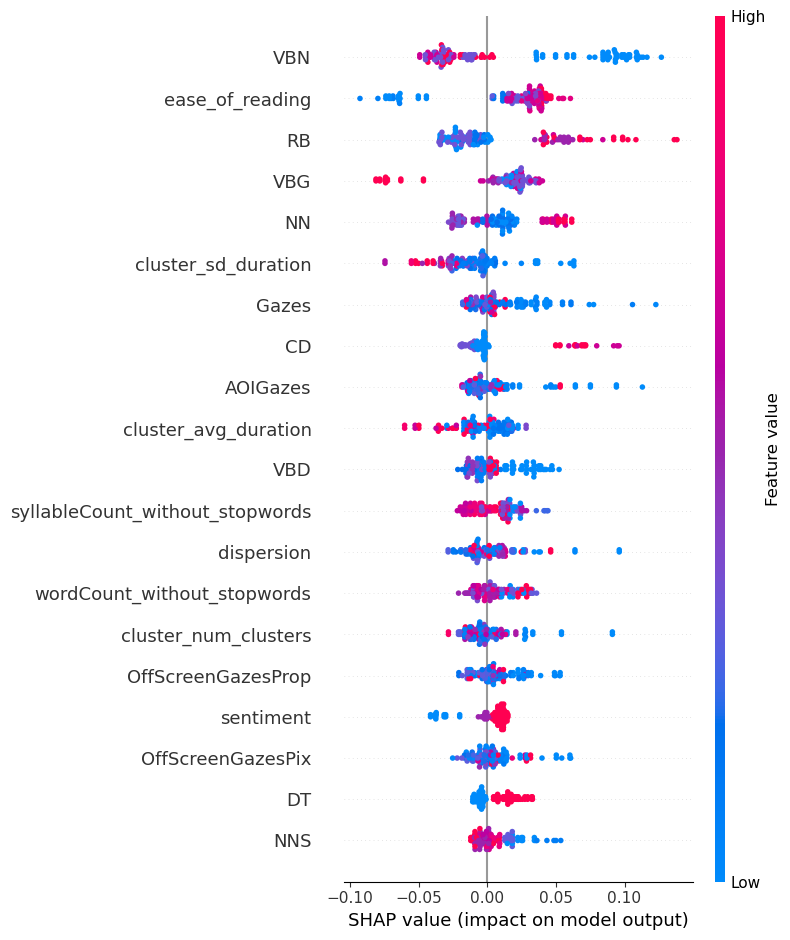

Fitting 5 folds for each of 72 candidates, totalling 360 fits


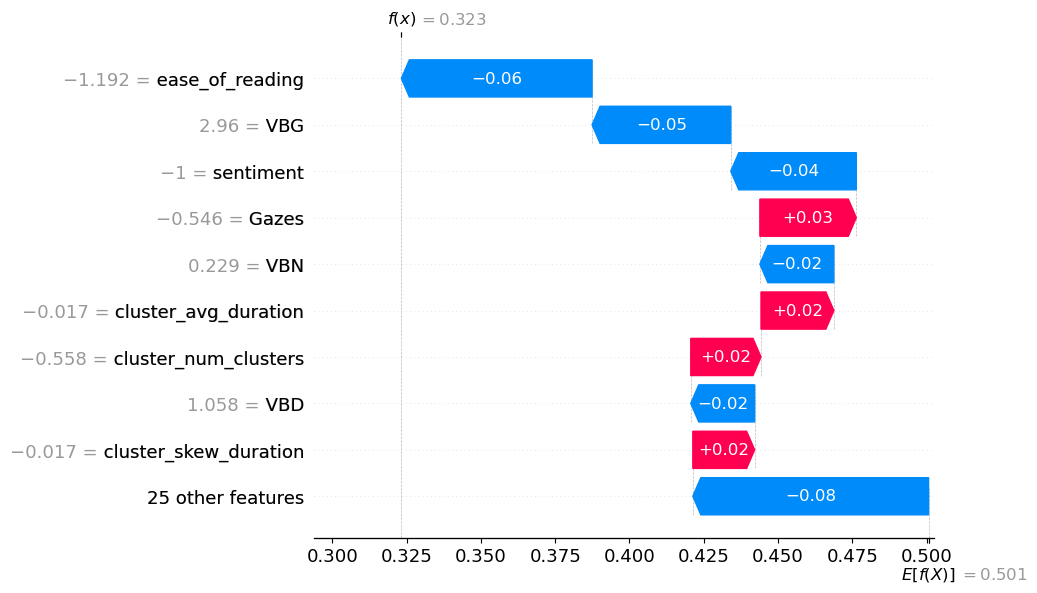

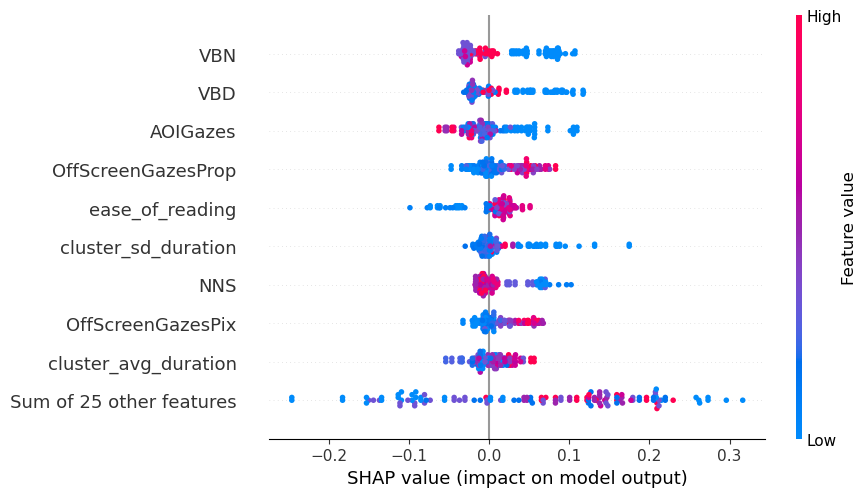

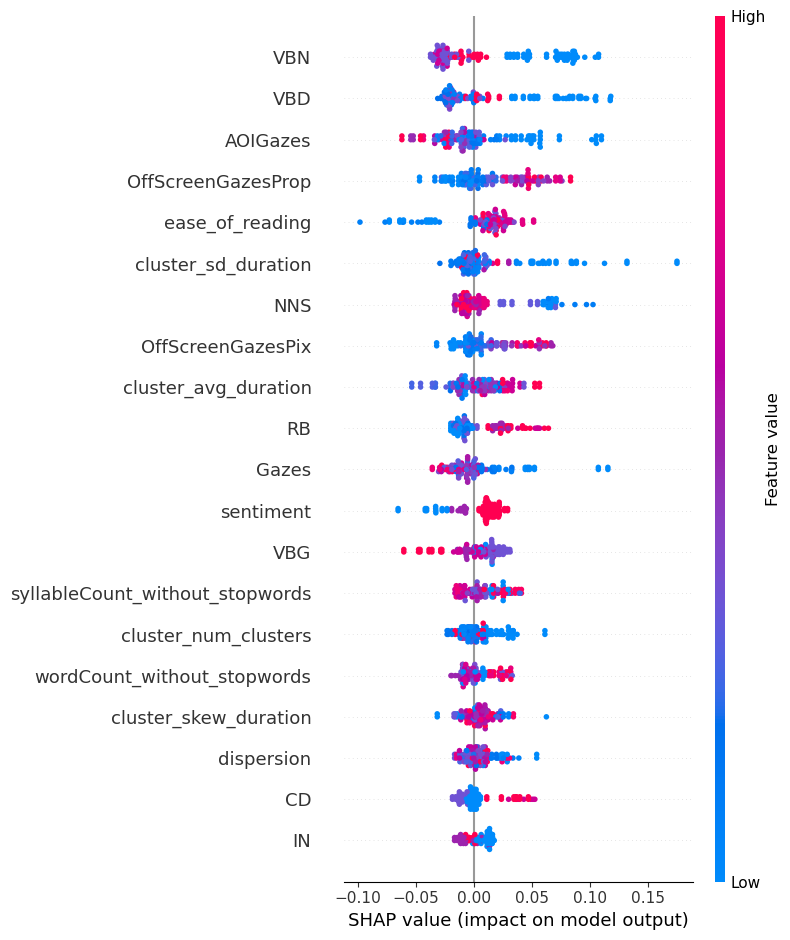

Fitting 5 folds for each of 72 candidates, totalling 360 fits


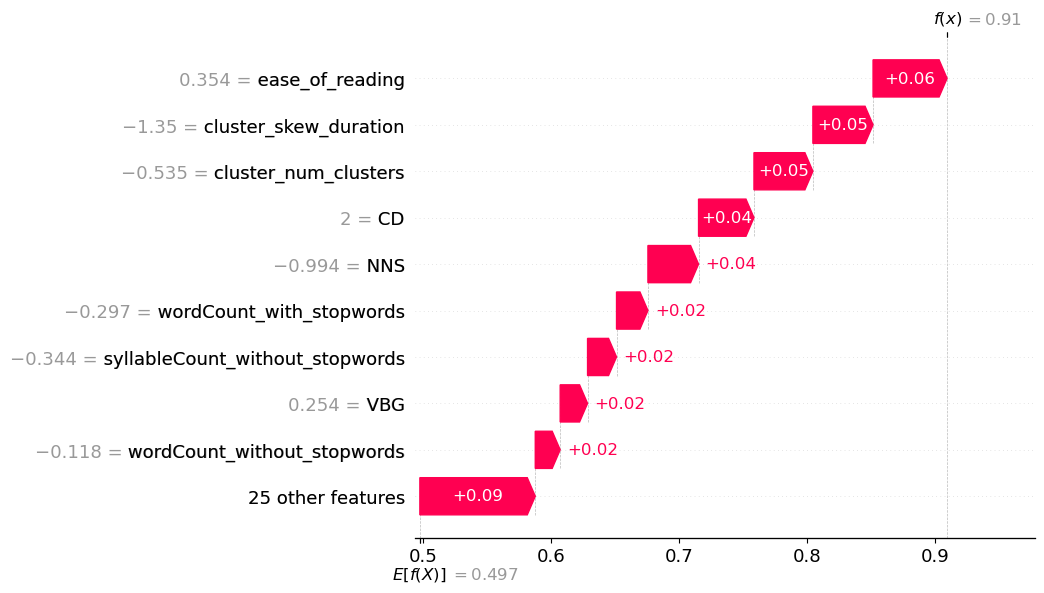

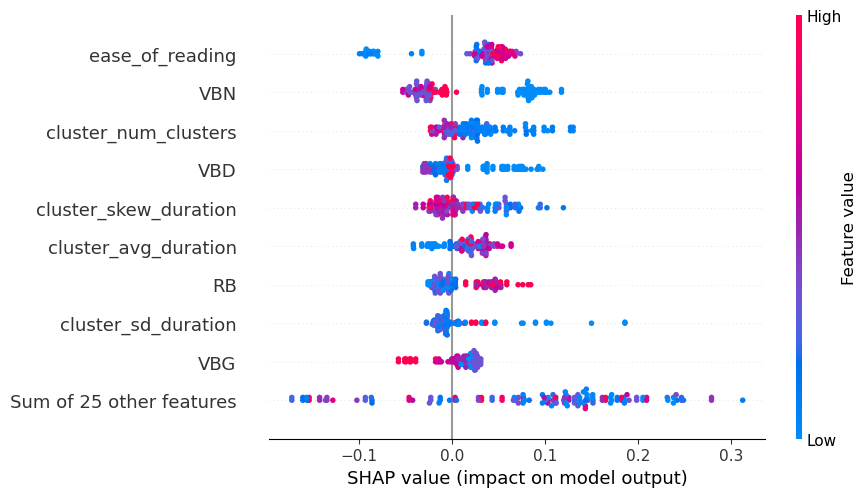

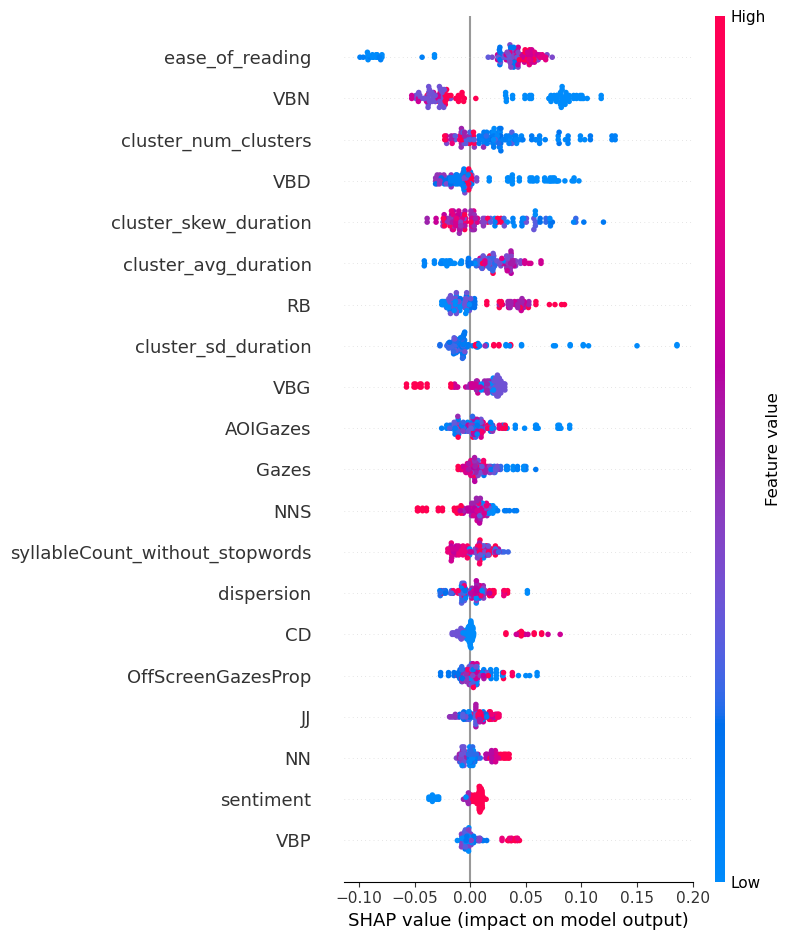

Fitting 5 folds for each of 72 candidates, totalling 360 fits


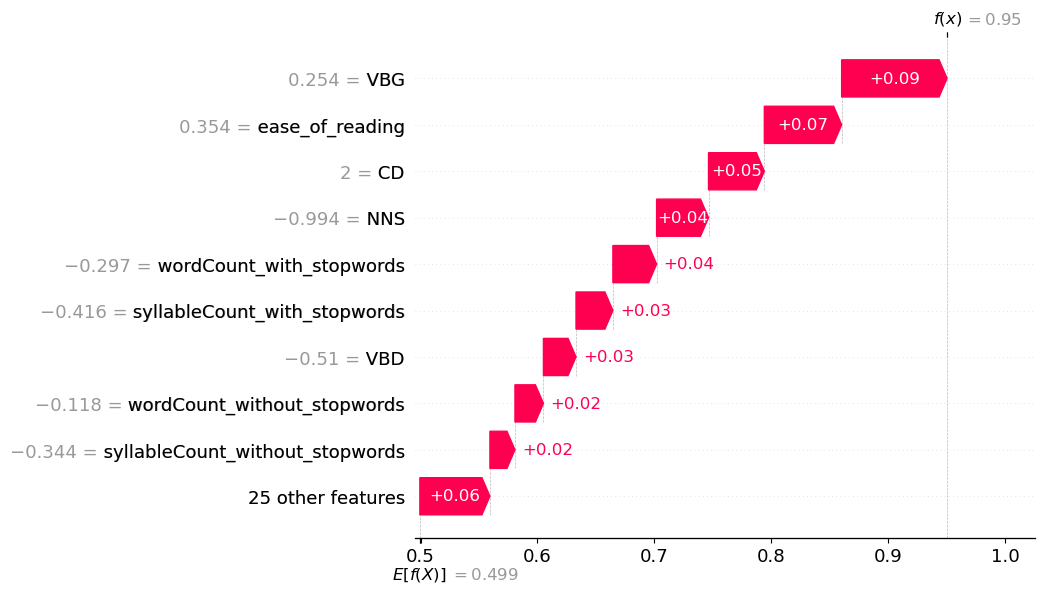

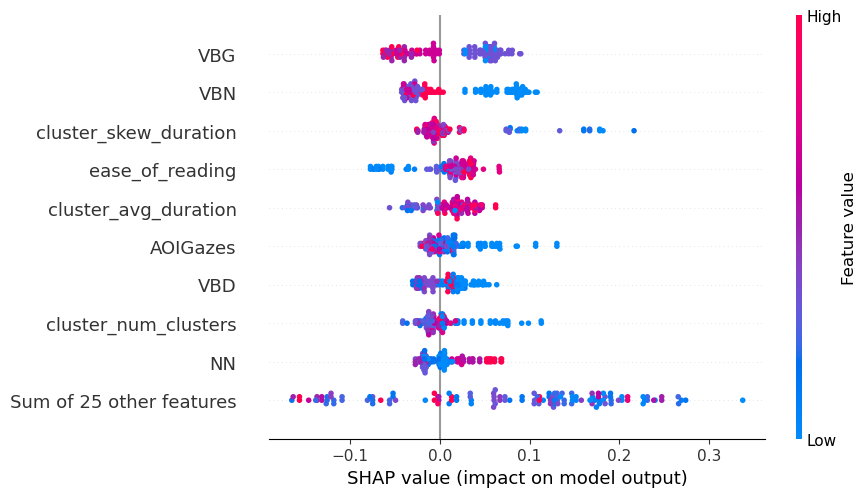

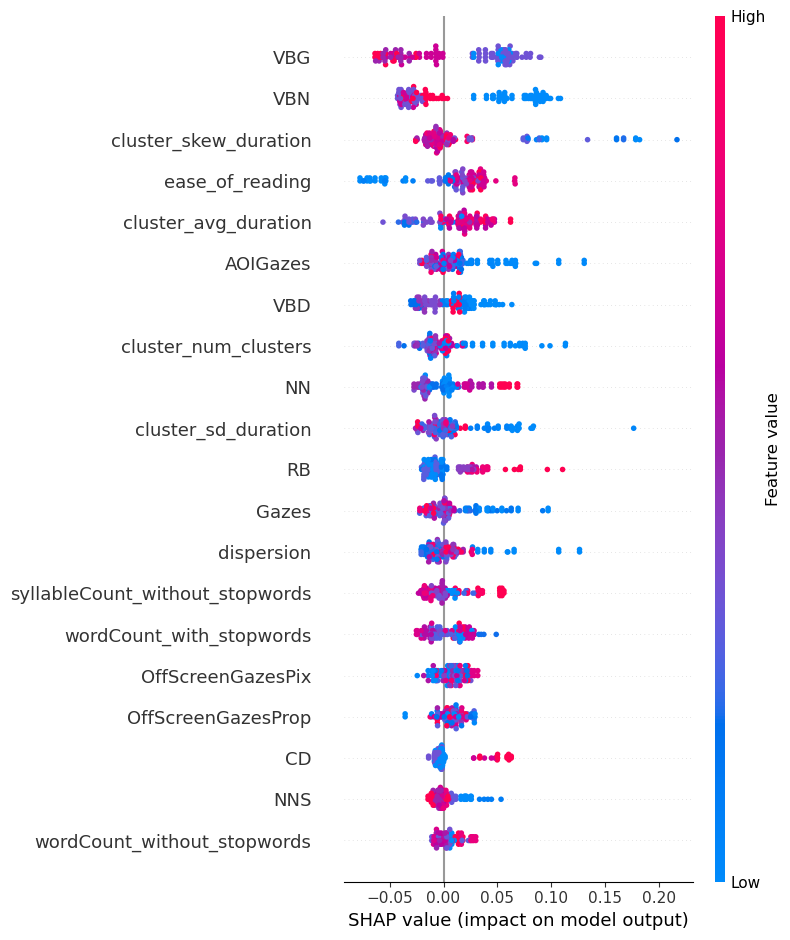

RandomForestClassifier() Results:
Avg Accuracy: 0.73
Avg Weighted F1 Score: 0.75
Avg Precision_1: 0.87
Avg Recall_1: 0.79
Avg AUROC: 0.73
Avg Confusion Matrix:
[[13.6 12.8]
 [21.6 81.4]]
Avg Prediction Rate: 0.73



In [44]:
import shap
from collections import defaultdict
from sklearn.model_selection import GroupKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

def train_and_evaluate(df, features, param_grid, classifier_name):
    X = df[features]
    y = df['Correct']
    
    precision_dict = {}
    recall_dict = {}
    auroc_score_barplot = {classifier_name: []}

    # Define the number of folds for cross-validation
    n_splits = 5
    gkf = GroupKFold(n_splits=n_splits)

    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    conf_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=df['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        grid = GridSearchCV(clf, param_grid, refit=True, verbose=3, scoring='roc_auc', n_jobs=-1)
        grid.fit(X_train_resampled, y_train_resampled)
        best_clf = grid.best_estimator_
        best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
        y_pred = best_clf.predict(X_test)
        y_pred_proba = best_clf.predict_proba(X_test)[:, 1]
        
        # SHAP Explainer
        explainer = shap.Explainer(best_clf)
        shap_values = explainer(X_test)
        
        # Visualize the SHAP values for the first prediction (USE FOR RANDOM FOREST)
        shap.plots.waterfall(shap_values[0][:,1])
        
        # Beeswarm plot for all observations
        shap.plots.beeswarm(shap_values[:, :, 1])
        
        # Summary plot for all observations
        shap.summary_plot(shap_values[:, :, 1], X_test)

        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba)
        conf_matrix = confusion_matrix(y_test, y_pred)
        prediction_rate = (conf_matrix[1, 1] + conf_matrix[0, 1]) / (conf_matrix[1, 1] + conf_matrix[1, 0] + conf_matrix[0, 1] + conf_matrix[0, 0])

        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        conf_matrices.append(conf_matrix)
        prediction_rates.append(prediction_rate)

        auroc_score_barplot[classifier_name].append(auroc)

    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_conf_matrix = np.mean(conf_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    print(f"{classifier_name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_conf_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

    precision_dict[classifier_name] = avg_precision
    recall_dict[classifier_name] = avg_recall

    return precision_dict, recall_dict, auroc_score_barplot, {classifier_name: clf}

# Example usage
from sklearn.ensemble import RandomForestClassifier

# df = df_d6_clean
features = [
    "sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
    "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
    "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
    "WRB", "RBR", "Gazes", "AOIGazes", "OffScreenGazesPix", "OffScreenGazesProp",
    "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", 
    "cluster_skew_duration", "dispersion"
]

clf = RandomForestClassifier()
param_grid_RF = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200],
}

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d6_clean, features, param_grid_RF, clf)


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GroupKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import xgboost as xgb
from collections import defaultdict

def train_and_evaluate(df, features):
    X = df[features]
    y = df['Correct']
    
    # Define classifiers and parameter grids
    classifiers = {
        'Chance': DummyClassifier(strategy="stratified"),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "SVM": SVC(random_state=42, probability=True), 
        "XGBoost": xgb.XGBClassifier(random_state=42)
    }

    param_grid_RF = {
        'criterion': ['entropy', 'gini'],
        'max_depth': [10, 20],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [50, 100, 200],
    }

    param_grid_SVM = {
        'C': [0.1, 1, 10],
        'kernel': ['linear']
    }

    param_grid_XGB = {
        'colsample_bytree': [0.8, 1.0],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [10, 20],
        'min_child_weight': [1, 3, 5],
        'n_estimators': [50, 100, 200],
        'subsample': [0.8, 1.0],
    }

    param_grids = {
        'Random Forest': param_grid_RF,
        'SVM': param_grid_SVM,
        'XGBoost': param_grid_XGB
    }

    precision_dict = {}
    recall_dict = {}
    auroc_score_barplot = {name: [] for name in classifiers}
    
    # Fit PCA to determine the number of components that explain 95% of the variance
    pca = PCA().fit(X)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumulative_variance >= 0.95) + 1

    # Define the number of folds for cross-validation
    n_splits = 5
    gkf = GroupKFold(n_splits=n_splits)

    # Loop through the classifiers
    for name, clf in classifiers.items():
        accuracy_scores = []
        weighted_f1_scores = []
        precision_scores = []
        recall_scores = []
        auroc_scores = []
        confusion_matrices = []
        prediction_rates = []

        # Perform cross-validation
        for train_index, test_index in gkf.split(X, y, groups=df['Participant']):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Apply PCA on the training data
            pca = PCA(n_components=n_components)
            X_train_pca = pca.fit_transform(X_train)
            X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

            # Perform oversampling on minority class
            smote = SMOTE()
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

            # Apply the transformation to the test data
            X_test_pca = pca.transform(X_test)
            X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

            if name != "Chance":
                grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring='roc_auc', n_jobs=-1)
                grid.fit(X_train_resampled, y_train_resampled)
                best_clf = grid.best_estimator_
                best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
                y_pred = best_clf.predict(X_test_pca_df)
                y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1]
            else:
                best_clf = clf.fit(X_train, y_train)
                y_pred = best_clf.predict(X_test)
                y_pred_proba = best_clf.predict_proba(X_test)[:, 1]
                
            plt.hist(y_pred_proba, bins=20)
            plt.xlabel('Predicted Probability')
            plt.ylabel('Frequency')
            plt.title('Distribution of Predicted Probabilities')
            plt.show()

            accuracy = accuracy_score(y_test, y_pred)
            weighted_f1 = f1_score(y_test, y_pred, average='weighted')
            precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
            recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
            auroc = roc_auc_score(y_test, y_pred_proba)
            confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
            prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

            accuracy_scores.append(accuracy)
            weighted_f1_scores.append(weighted_f1)
            precision_scores.append(precision)
            recall_scores.append(recall)
            auroc_scores.append(auroc)
            confusion_matrices.append(confusion_matrix)
            prediction_rates.append(prediction_rate)

            auroc_score_barplot[name].append(auroc)

        avg_accuracy = np.mean(accuracy_scores)
        avg_weighted_f1 = np.mean(weighted_f1_scores)
        avg_precision = np.mean(precision_scores)
        avg_recall = np.mean(recall_scores)
        avg_auroc = np.mean(auroc_scores)
        avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
        avg_prediction_rate = np.mean(prediction_rates)

        print(f"{name} Results:")
        print(f"Avg Accuracy: {avg_accuracy:.2f}")
        print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
        print(f"Avg Precision_1: {avg_precision:.2f}")
        print(f"Avg Recall_1: {avg_recall:.2f}")
        print(f"Avg AUROC: {avg_auroc:.2f}")
        print("Avg Confusion Matrix:")
        print(avg_confusion_matrix)
        print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

        precision_dict[name] = avg_precision
        recall_dict[name] = avg_recall

    return precision_dict, recall_dict, auroc_score_barplot, classifiers

def plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers, n_splits=5):
    colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

    fig, ax = plt.subplots(2, 1, figsize=(10, 12))

    ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
    ax[0].set_title('Precision Scores by Classifier')
    ax[0].set_xlabel('Classifier')
    ax[0].set_ylabel('Precision Score')
    ax[0].set_ylim([0, 1])

    ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
    ax[1].set_title('Recall Scores by Classifier')
    ax[1].set_xlabel('Classifier')
    ax[1].set_ylabel('Recall Score')
    ax[1].set_ylim([0, 1])

    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(figsize=(11, 7))
    bar_width = 0.15  
    gap_width = 0.05 

    bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

    for idx, name in enumerate(classifiers):
        scores = auroc_score_barplot[name]
        avg_score = np.mean(scores)
        for fold_idx, score in enumerate(scores):
            bar_pos = bar_positions[idx] + (fold_idx * bar_width)
            ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
                   color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
        ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
    ax.set_xlabel('Classifiers', fontsize=15)
    ax.set_ylabel('AUROC Score', fontsize=15)
    ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers', fontsize=17)

    ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
    ax.set_xticklabels(classifiers.keys())

    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.legend(loc='lower right', fontsize=13)

    plt.tight_layout()
    plt.show()

# Example usage:
# df_d3_clean should be your dataframe
# features should be the list of columns you want to use for training
  # Replace with actual feature names



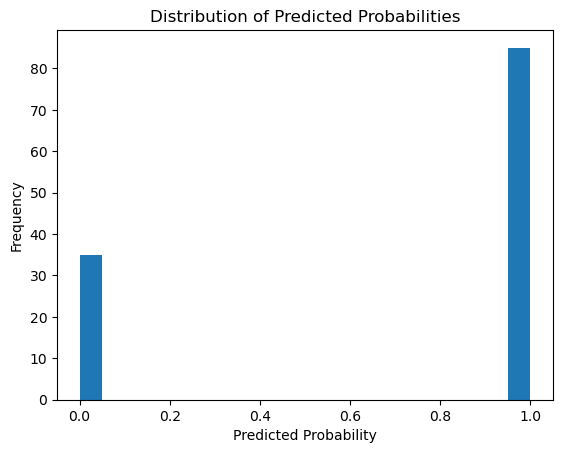

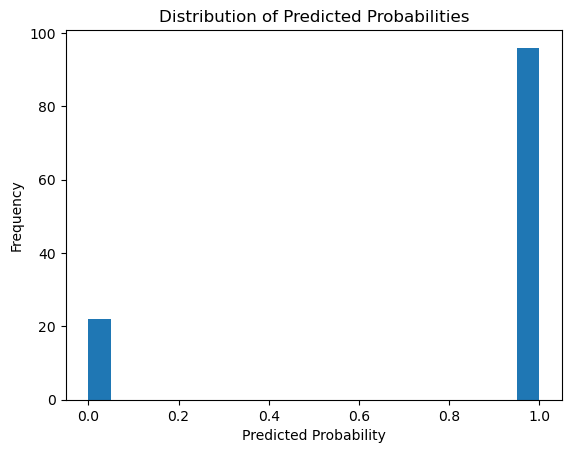

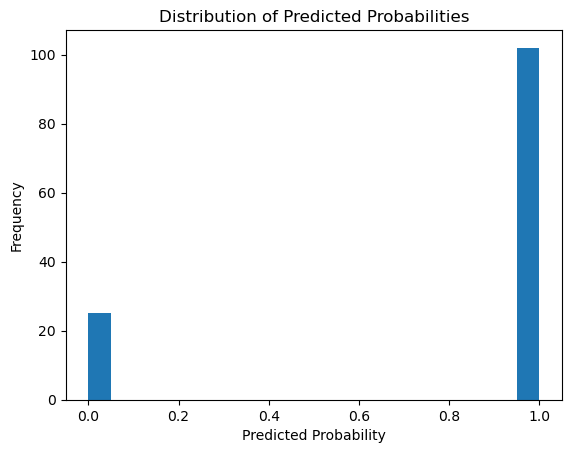

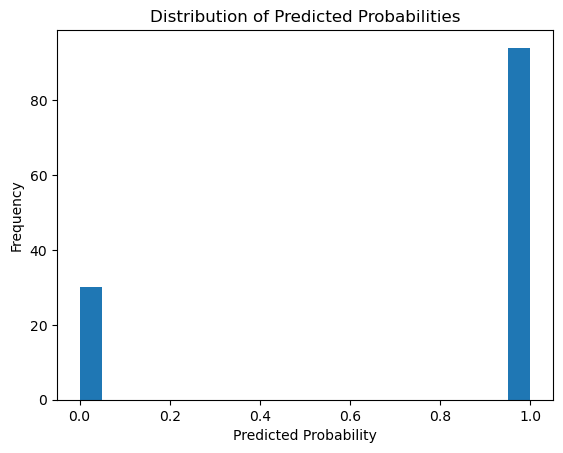

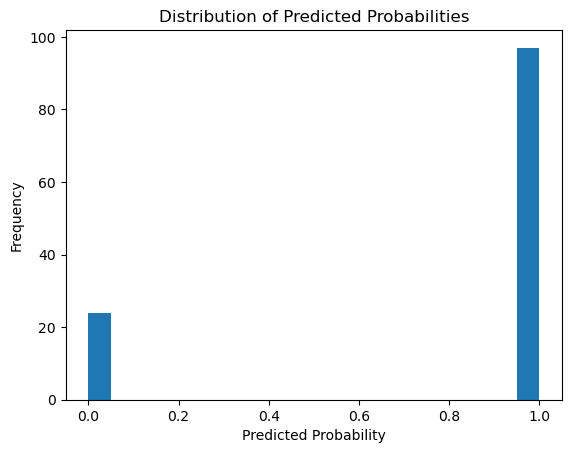

Chance Results:
Avg Accuracy: 0.63
Avg Weighted F1 Score: 0.63
Avg Precision_1: 0.76
Avg Recall_1: 0.76
Avg AUROC: 0.47
Avg Confusion Matrix:
[[ 6.2 23. ]
 [22.6 70.2]]
Avg Prediction Rate: 0.76

Fitting 5 folds for each of 72 candidates, totalling 360 fits


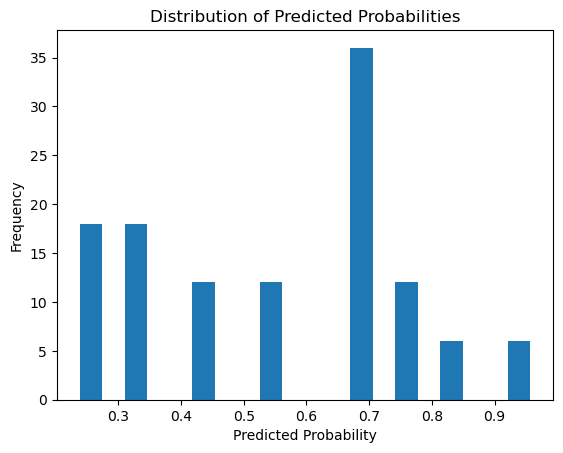

Fitting 5 folds for each of 72 candidates, totalling 360 fits


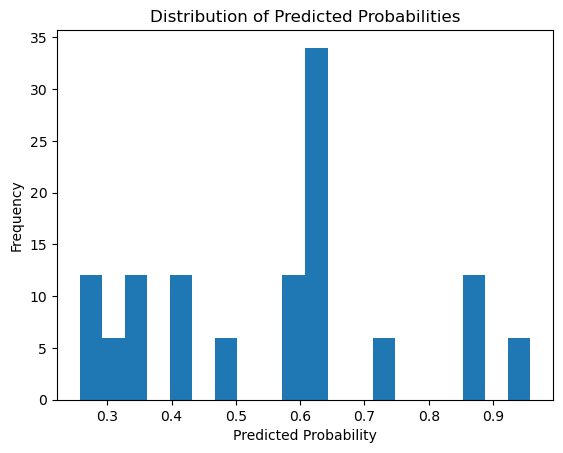

Fitting 5 folds for each of 72 candidates, totalling 360 fits


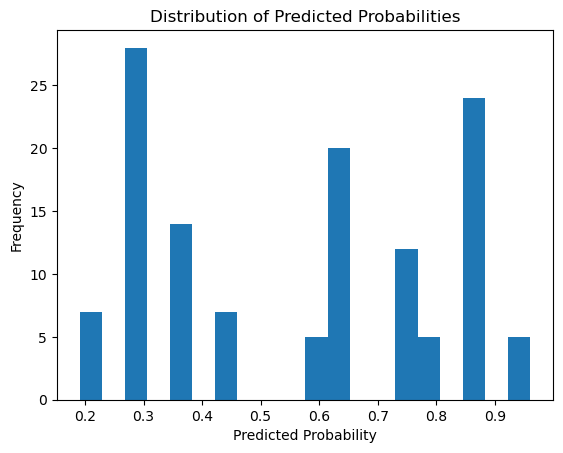

Fitting 5 folds for each of 72 candidates, totalling 360 fits


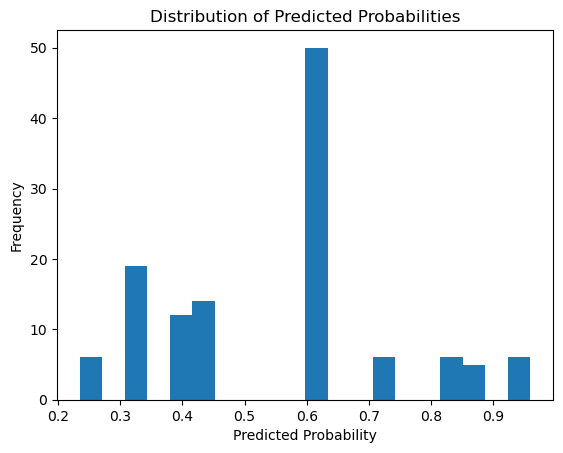

Fitting 5 folds for each of 72 candidates, totalling 360 fits


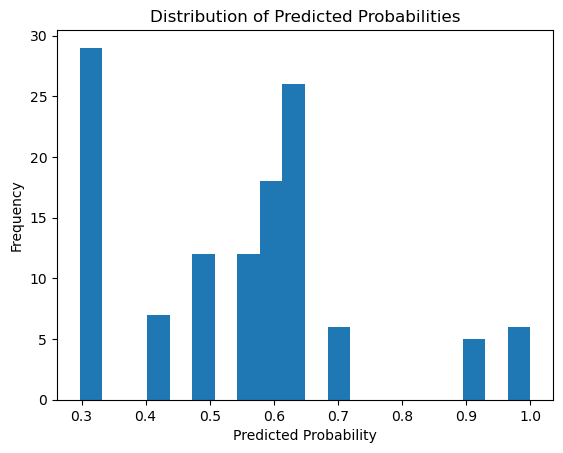

Random Forest Results:
Avg Accuracy: 0.66
Avg Weighted F1 Score: 0.69
Avg Precision_1: 0.86
Avg Recall_1: 0.66
Avg AUROC: 0.67
Avg Confusion Matrix:
[[19.  10.2]
 [31.2 61.6]]
Avg Prediction Rate: 0.59

Fitting 5 folds for each of 3 candidates, totalling 15 fits


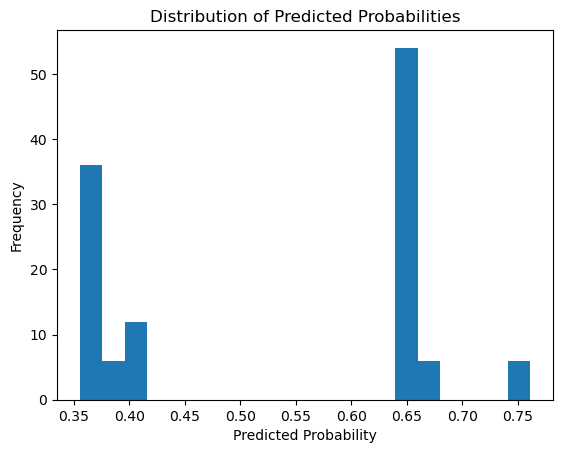

Fitting 5 folds for each of 3 candidates, totalling 15 fits


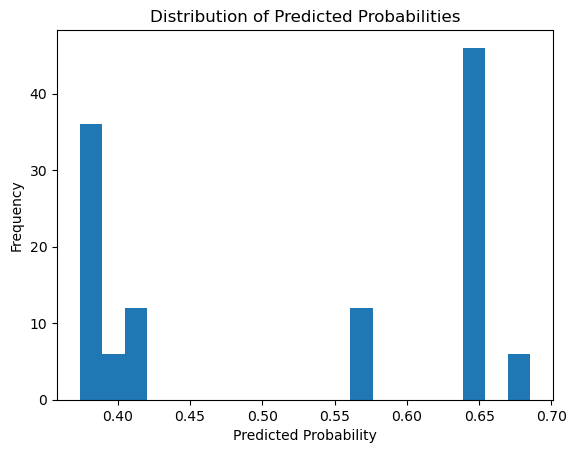

Fitting 5 folds for each of 3 candidates, totalling 15 fits


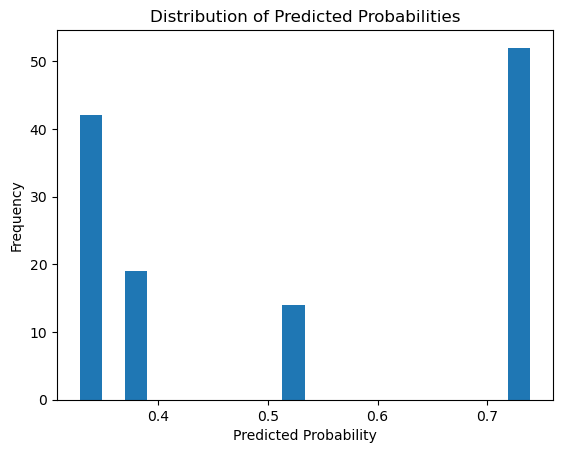

Fitting 5 folds for each of 3 candidates, totalling 15 fits


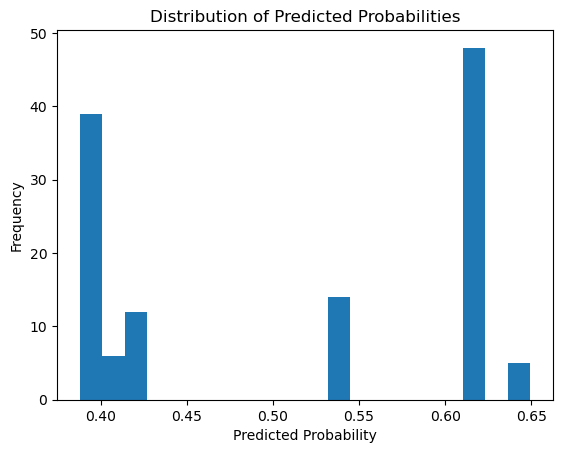

Fitting 5 folds for each of 3 candidates, totalling 15 fits


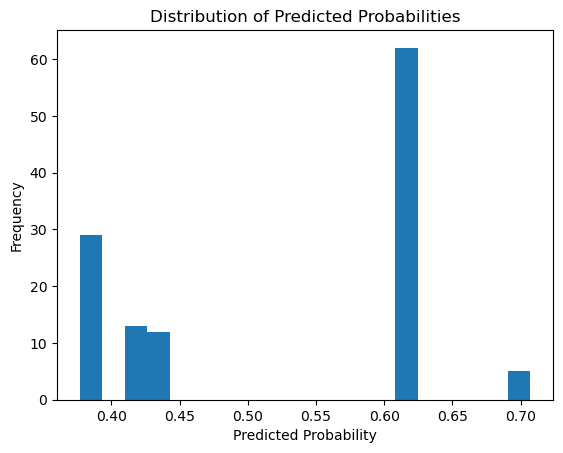

SVM Results:
Avg Accuracy: 0.61
Avg Weighted F1 Score: 0.64
Avg Precision_1: 0.85
Avg Recall_1: 0.58
Avg AUROC: 0.66
Avg Confusion Matrix:
[[20.   9.2]
 [38.8 54. ]]
Avg Prediction Rate: 0.52

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


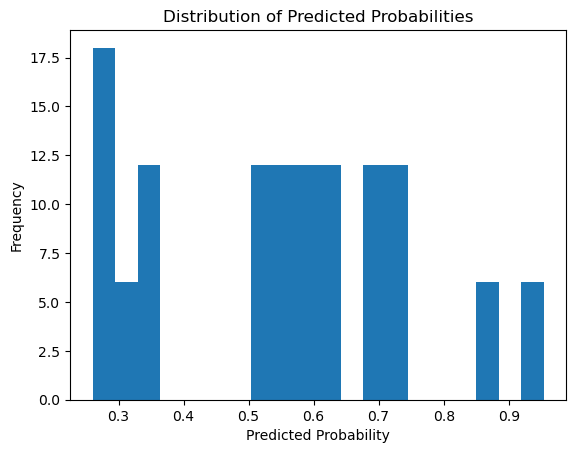

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


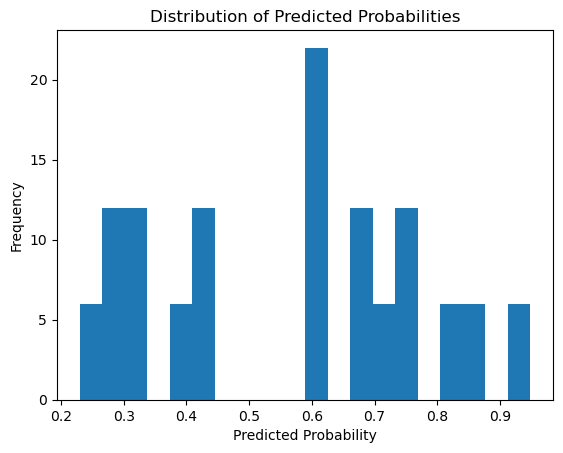

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


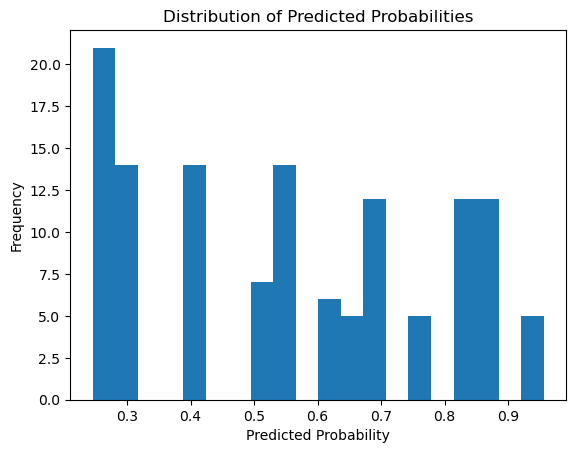

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


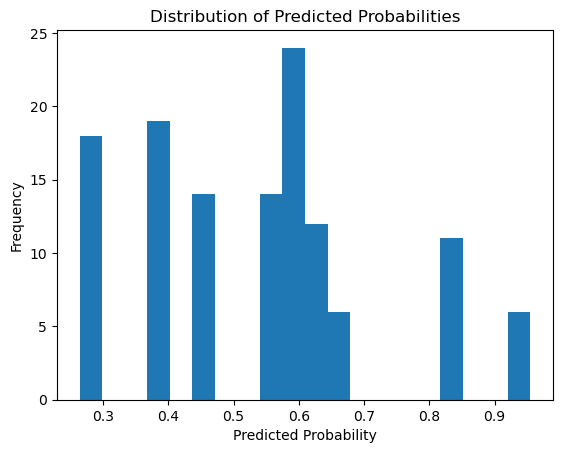

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


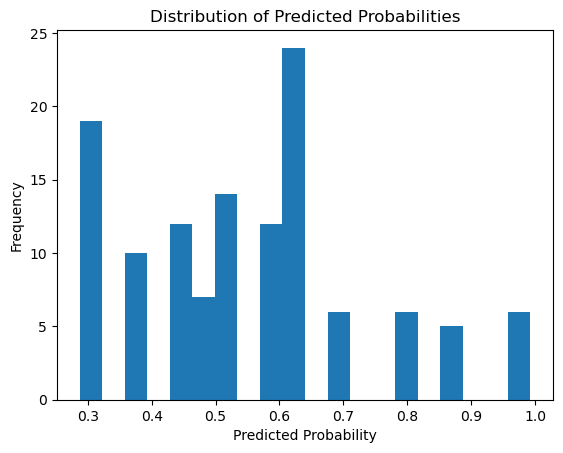

XGBoost Results:
Avg Accuracy: 0.67
Avg Weighted F1 Score: 0.69
Avg Precision_1: 0.84
Avg Recall_1: 0.69
Avg AUROC: 0.66
Avg Confusion Matrix:
[[17.4 11.8]
 [29.  63.8]]
Avg Prediction Rate: 0.62



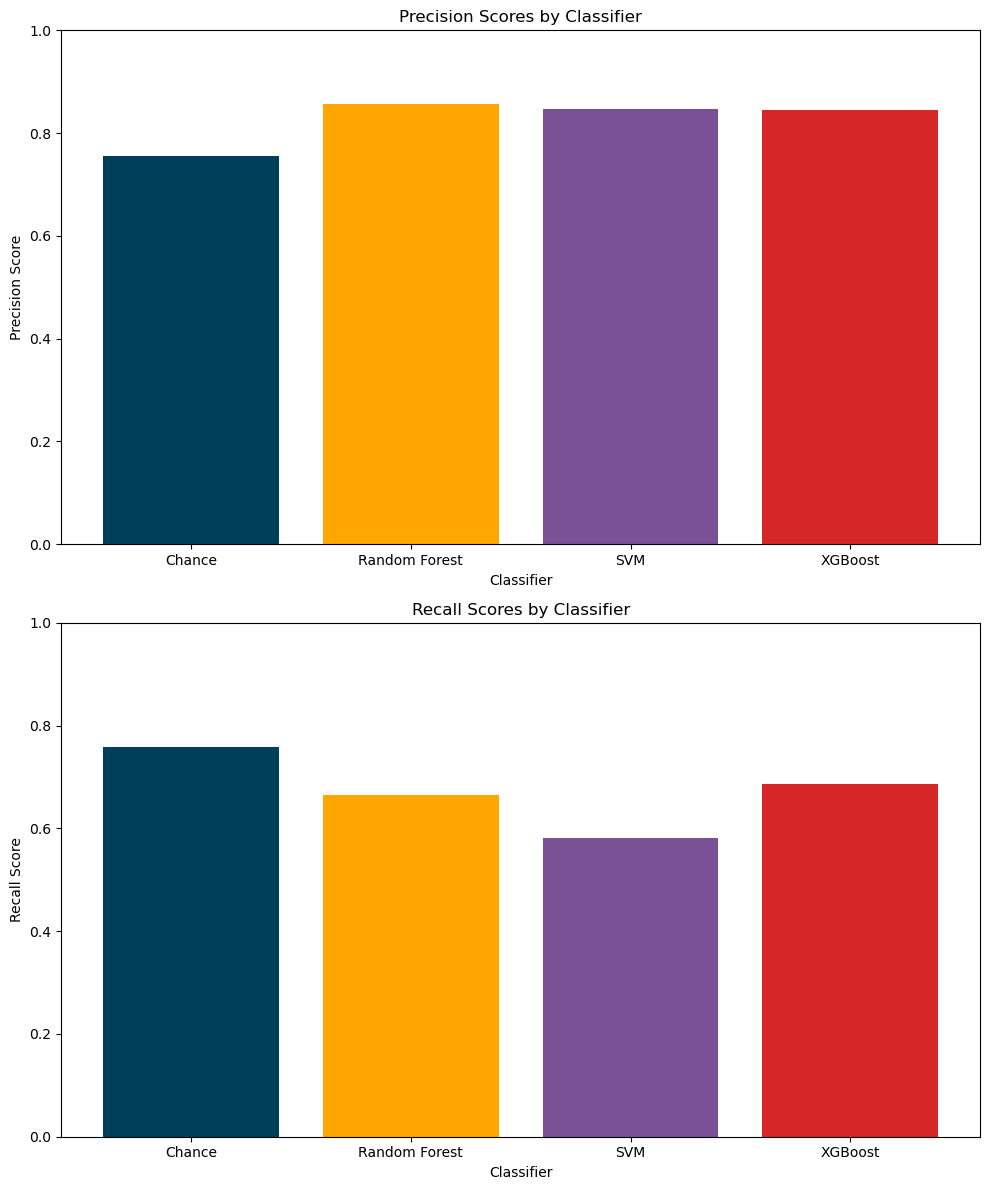

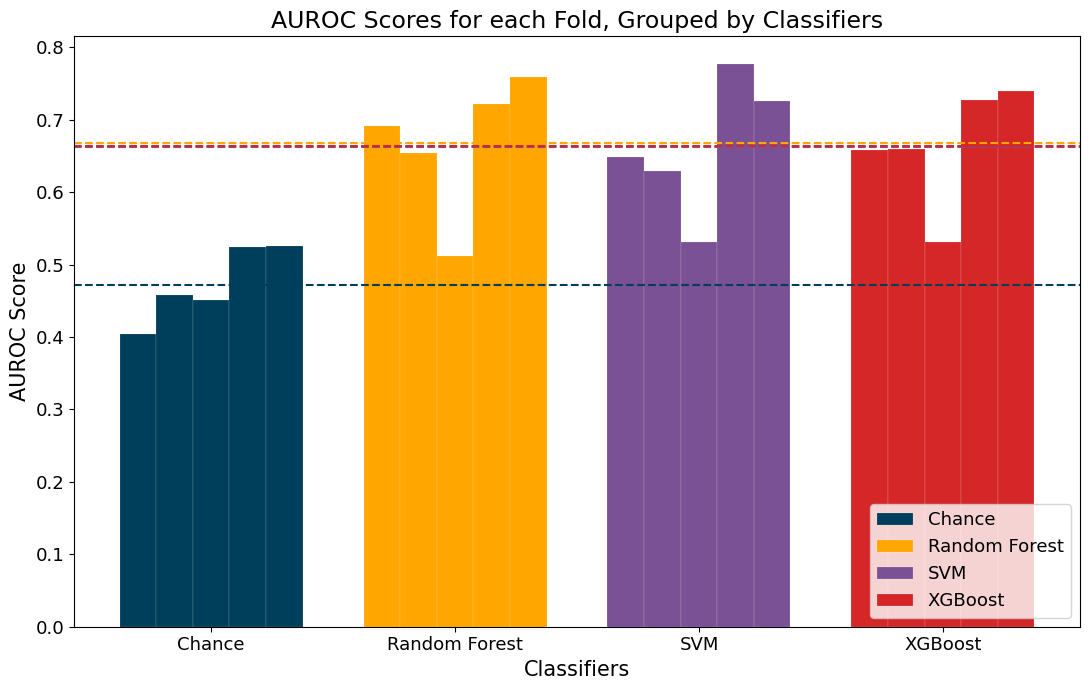

In [46]:
df = df_d7_d8_clean
features = ["sentiment", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", 
            "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", 
            "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", 
            "WRB", "RBR"]

precision_dict, recall_dict, auroc_score_barplot, classifiers = train_and_evaluate(df_d7_d8_clean, features)
plot_metrics(precision_dict, recall_dict, auroc_score_barplot, classifiers)